# Comparative Study of Different Machine Learning Algorithms on P2P Loan Lending Organization’s Dataset to Predict the Loan Defaulters

## Importing the required libraries

In [1]:
import gc 
gc.collect() 

290

In [2]:
import pandas as pd
import numpy as np


import catboost 
import xgboost
import optuna

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
import matplotlib.pyplot as plt 

# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.metrics import plot_confusion_matrix

import sklearn
#tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC

pd.set_option('display.max_columns', None)

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")

#plotting
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import re
from sortedcollections import SortedDict

In [3]:
print("Pandas Version = " + pd.__version__) 
print("Numpy Version = " + np.__version__) 
print("Catboost Version = " + catboost.__version__) 
print("LightGBM Version = " + lgb.__version__) 
print("Scikit-learn Version = " + sklearn.__version__) 
print("Tensorflow Version = " + tf.__version__) 
print("Matplotlib Version = " + matplotlib.__version__) 
print("seaborn Version = " + sns.__version__) 
print("Regular Expressions Version = " + re.__version__) 
print("XGboost Version = " + xgboost.__version__) 


Pandas Version = 1.1.5
Numpy Version = 1.20.3
Catboost Version = 0.25.1
LightGBM Version = 3.2.0
Scikit-learn Version = 0.23.2
Tensorflow Version = 2.2.0
Matplotlib Version = 3.3.2
seaborn Version = 0.11.0
Regular Expressions Version = 2.2.1
XGboost Version = 1.3.3


In [4]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100

sns.set(rc={"figure.dpi":100, 'savefig.dpi':100})
sns.set_context('notebook')
sns.set_style("ticks")

In [5]:
data = pd.read_csv('LoanData/LoanData.csv', low_memory=False)
pd.set_option('display.max_columns', None)

## Reading the data

## Data Pre-Processing

### Checking the null values

In [6]:
sorted(data.columns.tolist())

['ActiveLateCategory',
 'ActiveLateLastPaymentCategory',
 'ActiveScheduleFirstPaymentReached',
 'Age',
 'Amount',
 'AmountOfPreviousLoansBeforeLoan',
 'ApplicationSignedHour',
 'ApplicationSignedWeekday',
 'AppliedAmount',
 'BiddingStartedOn',
 'BidsApi',
 'BidsManual',
 'BidsPortfolioManager',
 'City',
 'ContractEndDate',
 'Country',
 'County',
 'CreditScoreEeMini',
 'CreditScoreEsEquifaxRisk',
 'CreditScoreEsMicroL',
 'CreditScoreFiAsiakasTietoRiskGrade',
 'CurrentDebtDaysPrimary',
 'CurrentDebtDaysSecondary',
 'DateOfBirth',
 'DebtOccuredOn',
 'DebtOccuredOnForSecondary',
 'DebtToIncome',
 'DefaultDate',
 'EAD1',
 'EAD2',
 'EL_V0',
 'EL_V1',
 'Education',
 'EmploymentDurationCurrentEmployer',
 'EmploymentPosition',
 'EmploymentStatus',
 'ExistingLiabilities',
 'ExpectedLoss',
 'ExpectedReturn',
 'FirstPaymentDate',
 'FreeCash',
 'Gender',
 'GracePeriodEnd',
 'GracePeriodStart',
 'HomeOwnershipType',
 'IncomeFromChildSupport',
 'IncomeFromFamilyAllowance',
 'IncomeFromLeavePay',
 'In

In [7]:
cols_in_metadata = ["ActiveLateCategory", "ActiveLateLastPaymentCategory", "ActiveScheduleFirstPaymentReached", "Age", "Amount", 
                    "AmountOfPreviousLoansBeforeLoan", "AppliedAmount", "AuctionBidNumber", "AuctionId", "AuctionName", 
                    "AuctionNumber", "BidPrincipal", "BidsApi", "BidsManual", "BidsPortfolioManager", "BoughtFromResale_Date", 
                    "City", "ContractEndDate", "Country", "County", "CreditScoreEeMini", "CreditScoreEsEquifaxRisk", "CreditScoreEsMicroL", 
                    "CreditScoreFiAsiakasTietoRiskGrade", "CurrentDebtDaysPrimary", "CurrentDebtDaysSecondary", "DateOfBirth", 
                    "DebtOccuredOn", "DebtOccuredOnForSecondary", "DebtToIncome", "DefaultDate", "DesiredDiscountRate", "EAD1", "EAD2", 
                    "Education", "EL_V0", "EL_V1", "EL_V2", "EmploymentDurationCurrentEmployer", "EmploymentPosition", "EmploymentStatus", 
                    "ExistingLiabilities", "ExpectedLoss", "ExpectedReturn", "FirstPaymentDate", "FreeCash", "Gender", "GracePeriodEnd", 
                    "GracePeriodStart", "HomeOwnershipType", "IncomeFromChildSupport", "IncomeFromFamilyAllowance", "IncomeFromLeavePay", 
                    "IncomeFromPension", "IncomeFromPrincipalEmployer", "IncomeFromSocialWelfare", "IncomeOther", "IncomeTotal", "Interest", 
                    "InterestAndPenaltyBalance", "InterestAndPenaltyDebtServicingCost", "InterestAndPenaltyPaymentsMade", 
                    "InterestAndPenaltyWriteOffs", "InterestLateAmount", "InterestRecovery", "LanguageCode", "LastPaymentOn", 
                    "LiabilitiesTotal", "ListedOnUTC", "LoanDate", "LoanDuration", "LoanId", "LoanNumber", "LoanStatusActiveFrom",
                    "LossGivenDefault", "MaritalStatus", "MaturityDate_Last", "MaturityDate_Original", "ModelVersion", "MonthlyPayment", 
                    "MonthlyPaymentDay", "NewCreditCustomer", "NextPaymentDate", "NextPaymentNr", "NextPaymentSum", "NoOfPreviousLoansBeforeLoan",
                    "note_id", "NoteLoanLateChargesPaid", "NoteLoanTransfersInterestAmount", "NoteLoanTransfersMainAmount", "NrOfDependants", 
                    "NrOfScheduledPayments", "OccupationArea", "OnSaleSince", "PenaltyLateAmount", "PlannedInterestPostDefault", 
                    "PlannedInterestTillDate", "PlannedPrincipalPostDefault", "PlannedPrincipalTillDate", "PreviousEarlyRepaymentsBeforeLoan", 
                    "PreviousEarlyRepaymentsCountBeforeLoan", "PreviousRepaymentsBeforeLoan", "PrincipalBalance", "PrincipalDebtServicingCost", 
                    "PrincipalLateAmount", "PrincipalOverdueBySchedule", "PrincipalPaymentsMade", "PrincipalRecovery", "PrincipalWriteOffs", 
                    "ProbabilityOfDefault", "PurchasePrice", "Rating", "Rating_V0", "Rating_V1", "Rating_V2", "RecoveryStage", "RefinanceLiabilities", 
                    "ReScheduledOn", "Restructured", "SoldInResale_Date", "SoldInResale_Price", "SoldInResale_Principal", "StageActiveSince", "Status", 
                    "UseOfLoan", "UserName", "VerificationType", "WorkExperience", "WorseLateCategory", "XIRR"]


In [8]:
for ids, col in enumerate(cols_in_metadata):
    if col not in data.columns.tolist():
        print( col) #These are the columns which are in metadata but not in train_test data

AuctionBidNumber
AuctionId
AuctionName
AuctionNumber
BidPrincipal
BoughtFromResale_Date
DesiredDiscountRate
EL_V2
InterestLateAmount
LoanStatusActiveFrom
NextPaymentSum
note_id
NoteLoanLateChargesPaid
NoteLoanTransfersInterestAmount
NoteLoanTransfersMainAmount
OnSaleSince
PenaltyLateAmount
PreviousEarlyRepaymentsBeforeLoan
PrincipalLateAmount
PurchasePrice
SoldInResale_Date
SoldInResale_Price
SoldInResale_Principal
XIRR


In [9]:
for col in data.columns.tolist():
    if col not in cols_in_metadata:
        print(col)

ReportAsOfEOD
BiddingStartedOn
LoanApplicationStartedDate
ApplicationSignedHour
ApplicationSignedWeekday
PreviousEarlyRepaymentsBefoleLoan


In [10]:
list1 = []
for item in data.columns:
    if data[item].isnull().sum() >= 168345:
        list1.append(item)
        print(item, data[item].isnull().sum())

DateOfBirth 168345
County 168345
City 168345
EmploymentPosition 168345


In [11]:
list1

['DateOfBirth', 'County', 'City', 'EmploymentPosition']

In [12]:
data = data.drop(columns = list1, axis = 1)

In [13]:
data.shape

(168345, 108)

In [14]:
#dropping ReportAsOfEOD, LoanId, LoanNumber

In [15]:
data = data.drop(columns = ['ReportAsOfEOD', 'LoanId', 'LoanNumber'], axis = 1)

In [16]:
list_a = []
for item in data.columns:
    list_a.append((item, data[item].isna().sum()))
    #print(str(item)  + str("--"*20) + str(data[item].isna().sum()))

In [17]:
list_a.sort(key = lambda x:x[1])

In [18]:
list_a

[('ListedOnUTC', 0),
 ('BiddingStartedOn', 0),
 ('BidsPortfolioManager', 0),
 ('BidsApi', 0),
 ('BidsManual', 0),
 ('UserName', 0),
 ('NewCreditCustomer', 0),
 ('LoanApplicationStartedDate', 0),
 ('LoanDate', 0),
 ('FirstPaymentDate', 0),
 ('MaturityDate_Original', 0),
 ('MaturityDate_Last', 0),
 ('ApplicationSignedHour', 0),
 ('ApplicationSignedWeekday', 0),
 ('LanguageCode', 0),
 ('Age', 0),
 ('Country', 0),
 ('AppliedAmount', 0),
 ('Amount', 0),
 ('Interest', 0),
 ('LoanDuration', 0),
 ('UseOfLoan', 0),
 ('IncomeFromPrincipalEmployer', 0),
 ('IncomeFromPension', 0),
 ('IncomeFromFamilyAllowance', 0),
 ('IncomeFromSocialWelfare', 0),
 ('IncomeFromLeavePay', 0),
 ('IncomeFromChildSupport', 0),
 ('IncomeOther', 0),
 ('IncomeTotal', 0),
 ('ExistingLiabilities', 0),
 ('LiabilitiesTotal', 0),
 ('RefinanceLiabilities', 0),
 ('MonthlyPaymentDay', 0),
 ('ActiveScheduleFirstPaymentReached', 0),
 ('Status', 0),
 ('Restructured', 0),
 ('PrincipalPaymentsMade', 0),
 ('InterestAndPenaltyPaymentsM

In [19]:
sorted_cols = sorted(data.columns.tolist())

In [20]:
percent = 0
lenn = 0
for col in sorted_cols:
    percent = 0
    #print(col, "-"*10 + str(data[col].isnull().sum()))
    lenn = (data[col].isnull().sum())
    percent = (data[col].isnull().sum()/168345) * 100
    print(col, "-"*10 + str(data[col].isnull().sum()) + "-"*10 + str(percent))

ActiveLateCategory ----------94923----------56.38599304998664
ActiveLateLastPaymentCategory ----------89530----------53.18245270129793
ActiveScheduleFirstPaymentReached ----------0----------0.0
Age ----------0----------0.0
Amount ----------0----------0.0
AmountOfPreviousLoansBeforeLoan ----------0----------0.0
ApplicationSignedHour ----------0----------0.0
ApplicationSignedWeekday ----------0----------0.0
AppliedAmount ----------0----------0.0
BiddingStartedOn ----------0----------0.0
BidsApi ----------0----------0.0
BidsManual ----------0----------0.0
BidsPortfolioManager ----------0----------0.0
ContractEndDate ----------68724----------40.82330927559476
Country ----------0----------0.0
CreditScoreEeMini ----------70272----------41.74284950547982
CreditScoreEsEquifaxRisk ----------156126----------92.74169116991892
CreditScoreEsMicroL ----------29725----------17.657192075796726
CreditScoreFiAsiakasTietoRiskGrade ----------130380----------77.44809765659807
CurrentDebtDaysPrimary -------

In [21]:
#data['PurchasePrice'].unique()

In [22]:
for cols in sorted_cols:
    print(cols, data[cols].nunique())

ActiveLateCategory 9
ActiveLateLastPaymentCategory 9
ActiveScheduleFirstPaymentReached 2
Age 62
Amount 5859
AmountOfPreviousLoansBeforeLoan 14700
ApplicationSignedHour 24
ApplicationSignedWeekday 7
AppliedAmount 730
BiddingStartedOn 167790
BidsApi 1286
BidsManual 4461
BidsPortfolioManager 5801
ContractEndDate 4447
Country 4
CreditScoreEeMini 7
CreditScoreEsEquifaxRisk 6
CreditScoreEsMicroL 11
CreditScoreFiAsiakasTietoRiskGrade 14
CurrentDebtDaysPrimary 1827
CurrentDebtDaysSecondary 1850
DebtOccuredOn 1827
DebtOccuredOnForSecondary 1850
DebtToIncome 6789
DefaultDate 1895
EAD1 48812
EAD2 55178
EL_V0 1203
EL_V1 1913
Education 7
EmploymentDurationCurrentEmployer 9
EmploymentStatus 7
ExistingLiabilities 39
ExpectedLoss 48545
ExpectedReturn 55834
FirstPaymentDate 2425
FreeCash 23658
Gender 3
GracePeriodEnd 1594
GracePeriodStart 1284
HomeOwnershipType 12
IncomeFromChildSupport 193
IncomeFromFamilyAllowance 339
IncomeFromLeavePay 367
IncomeFromPension 1113
IncomeFromPrincipalEmployer 2922
Inco

In [23]:
data['Country'].unique()

array(['EE', 'ES', 'FI', 'SK'], dtype=object)

In [24]:
data['CreditScoreEeMini'].unique()

array([1000.,   nan,  800.,  900.,  700.,  600.,    0.,  500.])

In [25]:
data['InterestRecovery'].unique()

array([0.0000e+00,        nan, 2.0320e-01, ..., 8.6749e+02, 1.5597e+02,
       5.4350e+01])

In [26]:
data['LanguageCode'].unique()


array([ 1,  6,  4,  3,  2,  5,  9, 22,  7, 21, 10, 13, 15], dtype=int64)

In [27]:
data['ProbabilityOfDefault'].head(30)

0     0.041344
1     0.188726
2     0.103423
3     0.077251
4     0.406101
5     0.153306
6     0.283719
7     0.092901
8     0.271618
9     0.376612
10    0.365576
11    0.312118
12    0.139718
13    0.113388
14    0.107243
15    0.188726
16    0.028873
17    0.133944
18    0.324072
19    0.087825
20    0.122216
21    0.036449
22    0.749511
23    0.453182
24    0.408036
25    0.453182
26    0.125412
27    0.095664
28    0.036351
29    0.077184
Name: ProbabilityOfDefault, dtype: float64

In [28]:
max(data['ProbabilityOfDefault'])

0.9944291215915928

In [29]:
min(data['ProbabilityOfDefault'])

0.0

In [30]:
data['ProbabilityOfDefault'].value_counts()

0.399250    4985
0.354750    2949
0.342000    2457
0.124240    2048
0.453182     934
            ... 
0.194027       1
0.348725       1
0.454019       1
0.400721       1
0.533581       1
Name: ProbabilityOfDefault, Length: 28801, dtype: int64

In [31]:
data['ProbabilityOfDefault'].describe([0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8,0.9, 0.95, 0.99])

count    165709.000000
mean          0.238527
std           0.141667
min           0.000000
10%           0.079976
20%           0.115287
25%           0.128466
30%           0.144832
35%           0.162559
40%           0.177415
50%           0.219032
60%           0.259041
70%           0.303842
75%           0.328177
80%           0.354750
90%           0.399251
95%           0.485259
99%           0.699600
max           0.994429
Name: ProbabilityOfDefault, dtype: float64

In [32]:
data['ProbabilityOfDefault'].describe()

count    165709.000000
mean          0.238527
std           0.141667
min           0.000000
25%           0.128466
50%           0.219032
75%           0.328177
max           0.994429
Name: ProbabilityOfDefault, dtype: float64

In [33]:
data.shape

(168345, 105)

In [34]:
MV_g_100000 = []
for col in sorted_cols:
    print(data[col].isnull().sum() > 100000)
    if data[col].isnull().sum() > 100000:
        MV_g_100000.append(col)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
True
False
False
False
False
False
False
False
False
True
True
False
False
False
False
False
False
False
False
False
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
True
False
False
False
False
False
True
True
False
False
False
False
False
False
False
False
False
False
True
True
True
True
False
False
False
False
False
False
False
False
True
False


In [35]:
MV_g_100000

['CreditScoreEsEquifaxRisk',
 'CreditScoreFiAsiakasTietoRiskGrade',
 'EL_V0',
 'EL_V1',
 'GracePeriodEnd',
 'GracePeriodStart',
 'NextPaymentDate',
 'NrOfDependants',
 'PlannedPrincipalTillDate',
 'PreviousEarlyRepaymentsBefoleLoan',
 'Rating_V0',
 'Rating_V1',
 'Rating_V2',
 'ReScheduledOn',
 'WorkExperience']

In [36]:
for col in MV_g_100000:
    print(col + "----------------------------" + str(data[col].isnull().sum()))

CreditScoreEsEquifaxRisk----------------------------156126
CreditScoreFiAsiakasTietoRiskGrade----------------------------130380
EL_V0----------------------------163776
EL_V1----------------------------155423
GracePeriodEnd----------------------------130502
GracePeriodStart----------------------------130502
NextPaymentDate----------------------------108568
NrOfDependants----------------------------132745
PlannedPrincipalTillDate----------------------------113886
PreviousEarlyRepaymentsBefoleLoan----------------------------109653
Rating_V0----------------------------163776
Rating_V1----------------------------155423
Rating_V2----------------------------143202
ReScheduledOn----------------------------107854
WorkExperience----------------------------131823


In [37]:
data = data.drop(columns = MV_g_100000, axis = 1)

In [38]:
tup1_list = []
for cols in data.columns:
    x = (cols, round((data[cols].isnull().sum()/168345)*100, 2) )
    tup1_list.append(x)

In [39]:
data['DefaultDate']

0         2017-12-06
1         2016-02-19
2                NaN
3                NaN
4         2017-06-20
             ...    
168340    2017-10-10
168341    2015-06-16
168342           NaN
168343           NaN
168344           NaN
Name: DefaultDate, Length: 168345, dtype: object

In [40]:
data['Status'].unique()

array(['Repaid', 'Late', 'Current'], dtype=object)

In [41]:
#data.to_csv('data_cleaned.csv')

In [42]:
data['DefaultDate'].value_counts()

2019-12-23    569
2020-06-08    533
2020-07-06    432
2020-03-30    397
2021-03-01    391
             ... 
2012-01-04      1
2012-07-09      1
2013-11-04      1
2018-11-14      1
2018-08-15      1
Name: DefaultDate, Length: 1895, dtype: int64

In [43]:
data.shape[0] - data['DefaultDate'].isnull().sum()

68978

In [44]:
data['LossGivenDefault'].describe()

count    165709.000000
mean          0.377785
std           0.312409
min           0.000000
25%           0.000000
50%           0.474940
75%           0.643646
max           0.950165
Name: LossGivenDefault, dtype: float64

In [45]:
data['LossGivenDefault'].value_counts()

0.000000    62056
0.580000    10484
0.650000     9554
0.900000     7937
0.681751     4842
            ...  
0.552831        1
0.543473        1
0.555994        1
0.452661        1
0.506604        1
Name: LossGivenDefault, Length: 2604, dtype: int64

In [46]:
data['LossGivenDefault'].isna().sum()

2636

In [47]:
(data[data['Status'] == 'Late'])

ListedOnUTC     BiddingStartedOn  BidsPortfolioManager  \
1       2015-03-24 15:55:44  2015-03-24 15:55:44                  1115   
5       2015-07-27 10:16:47  2015-07-27 10:16:47                   760   
6       2015-09-14 10:14:26  2015-09-14 10:14:26                  1780   
8       2015-09-14 10:51:42  2015-09-14 10:51:42                  1905   
11      2015-03-16 17:08:03  2015-03-16 17:08:03                   735   
...                     ...                  ...                   ...   
168329  2015-11-02 17:08:31  2015-11-02 17:08:31                   525   
168333  2016-01-12 13:23:02  2016-01-12 13:23:02                   680   
168338  2015-10-20 14:04:34  2015-10-20 14:04:34                   270   
168339  2015-08-31 17:02:49  2015-08-31 17:02:49                  3025   
168341  2015-03-02 07:07:05  2015-03-02 07:07:05                  2000   

        BidsApi  BidsManual   UserName  NewCreditCustomer  \
1             0       385.0  BO76151K3               True   
5             0      1740.0   BO9K1K59              False   
6             0      1720.0   BO39K739               True   
8             0       595.0  BO3K4K9A3               True   
11            0       265.0  BOA71KKK3               True   
...         ...         ...        ...                ...   
168329        0         5.0  BO439621A               True   
168333        0       915.0  BO2K66A63               True   
168338        0      2920.0  BOA41213A              False   
168339        0       285.0  BOKA59K2A              False   
168341        0         0.0  BO6492A4A               True   

       LoanApplicationStartedDate    LoanDate ContractEndDate  \
1             2015-03-20 15:20:48  2015-03-27             NaN   
5             2015-07-26 08:22:01  2015-07-27             NaN   
6             2015-09-12 12:00:04  2015-09-16             NaN   
8             2015-09-14 09:48:07  2015-09-17      2022-09-27   
11            2015-03-10 10:09:53  2015-03-18             NaN   
...                           ...         ...             ...   
168329        2015-11-02 14:01:29  2015-11-02      2021-04-12   
168333        2016-01-07 10:39:11  2016-01-14             NaN   
168338        2015-10-19 16:21:33  2015-10-21      2021-05-17   
168339        2015-08-31 16:42:51  2015-09-03             NaN   
168341        2015-02-19 13:36:36  2015-03-02             NaN   

       FirstPaymentDate MaturityDate_Original MaturityDate_Last  \
1            2015-05-04            2020-04-01        2020-04-01   
5            2015-09-10            2020-08-10        2020-08-10   
6            2015-11-16            2020-10-15        2021-01-27   
8            2015-10-26            2016-04-01        2022-09-27   
11           2015-05-04            2016-04-01        2019-04-01   
...                 ...                   ...               ...   
168329       2015-12-14            2020-11-12        2021-04-12   
168333       2016-03-07            2021-02-05        2021-02-05   
168338       2015-12-14            2020-11-12        2021-05-17   
168339       2015-10-05            2020-09-07        2020-11-24   
168341       2015-04-15            2020-03-16        2020-03-16   

        ApplicationSignedHour  ApplicationSignedWeekday  VerificationType  \
1                          15                         3               3.0   
5                          10                         2               4.0   
6                           9                         4               3.0   
8                          12                         5               3.0   
11                         17                         2               3.0   
...                       ...                       ...               ...   
168329                     19                         2               4.0   
168333                      5                         5               1.0   
168338                      8                         4               4.0   
168339                     22         

In [48]:
tup2_list = []
for cols in data.columns:
    x = (cols, data[cols].isnull().sum(), round((data[cols].isnull().sum()/168345)*100, 2) )
    tup2_list.append(x)

In [49]:
tup2_list.sort(key = lambda x : x[1])

In [50]:
d1 = data[['DefaultDate', 'PlannedPrincipalPostDefault', 'PlannedInterestPostDefault', 'PrincipalRecovery', 'InterestRecovery']]

In [51]:
d1.isnull().sum()

DefaultDate                    99367
PlannedPrincipalPostDefault    99367
PlannedInterestPostDefault     99367
PrincipalRecovery              99367
InterestRecovery               99367
dtype: int64

In [52]:
data['Status'].value_counts()

Late       66460
Current    52293
Repaid     49592
Name: Status, dtype: int64

In [53]:
data['ExpectedLoss'].sum()

23124.346722512666

In [54]:
data['LossGivenDefault'].sum()

62602.31759122576

In [55]:
max(data['Interest'])

264.31

In [56]:
max(data['InterestAndPenaltyBalance'])



77691.12

In [57]:
data['VerificationType'].value_counts()

4.0    105117
1.0     51919
3.0      9428
2.0      1828
0.0         8
Name: VerificationType, dtype: int64

In [58]:
data['UseOfLoan'].value_counts()

-1      131762
 7        9698
 2        9191
 0        6914
 6        3150
 3        1950
 5        1787
 8        1519
 4        1366
 1         955
 102        21
 110        17
 104         6
 101         5
 107         2
 106         1
 108         1
Name: UseOfLoan, dtype: int64

In [59]:
data['WorseLateCategory'].value_counts()


180+       63154
1-7        24852
31-60       9403
16-30       7733
8-15        7286
61-90       3752
91-120      2156
151-180     1627
121-150     1561
Name: WorseLateCategory, dtype: int64

In [60]:
data['Restructured'].value_counts()


False    116161
True      52184
Name: Restructured, dtype: int64

In [61]:
list_a = [1,2,3,4,5,6,6,6,6,4,4,3,3,2,2,3,3,4,4,5,5,6,6,7,8]
for item in set(list_a):
    print(list_a.count(item))

1
3
5
5
3
6
1
1


In [62]:
data['PrincipalOverdueBySchedule'].value_counts()




0.00       87653
530.00       777
529.00       109
210.07       108
26.64        102
           ...  
909.99         1
1297.22        1
755.52         1
1206.57        1
369.15         1
Name: PrincipalOverdueBySchedule, Length: 45567, dtype: int64

In [63]:
d2 = pd.isnull(data['PrincipalOverdueBySchedule'])

In [64]:
d2.shape

(168345,)

In [65]:
tup3_list = []
for cols in data.columns:
    if data[cols].isnull().sum() > 0:
        x1 = (cols, data[cols].isnull().sum(), round((data[cols].isnull().sum()/168345)*100, 2) )
        tup3_list.append(x1)

In [66]:
tup3_list.sort(key = lambda x:x[1])
tup3_list

[('VerificationType', 45, 0.03),
 ('Gender', 45, 0.03),
 ('Education', 45, 0.03),
 ('MaritalStatus', 45, 0.03),
 ('DebtToIncome', 45, 0.03),
 ('FreeCash', 45, 0.03),
 ('OccupationArea', 86, 0.05),
 ('EmploymentStatus', 197, 0.12),
 ('EmploymentDurationCurrentEmployer', 1027, 0.61),
 ('HomeOwnershipType', 1652, 0.98),
 ('ExpectedLoss', 2636, 1.57),
 ('LossGivenDefault', 2636, 1.57),
 ('ExpectedReturn', 2636, 1.57),
 ('ProbabilityOfDefault', 2636, 1.57),
 ('ModelVersion', 2636, 1.57),
 ('Rating', 2730, 1.62),
 ('PlannedInterestTillDate', 2875, 1.71),
 ('MonthlyPayment', 6685, 3.97),
 ('LastPaymentOn', 7442, 4.42),
 ('PrincipalOverdueBySchedule', 14837, 8.81),
 ('CreditScoreEsMicroL', 29725, 17.66),
 ('WorseLateCategory', 46821, 27.81),
 ('StageActiveSince', 54917, 32.62),
 ('PreviousRepaymentsBeforeLoan', 57122, 33.93),
 ('RecoveryStage', 61291, 36.41),
 ('NextPaymentNr', 62478, 37.11),
 ('NrOfScheduledPayments', 62478, 37.11),
 ('ContractEndDate', 68724, 40.82),
 ('CreditScoreEeMini', 7

In [67]:
l1 = []
for item in tup3_list:
    l1.append(item[0])
    
l1
    

['VerificationType',
 'Gender',
 'Education',
 'MaritalStatus',
 'DebtToIncome',
 'FreeCash',
 'OccupationArea',
 'EmploymentStatus',
 'EmploymentDurationCurrentEmployer',
 'HomeOwnershipType',
 'ExpectedLoss',
 'LossGivenDefault',
 'ExpectedReturn',
 'ProbabilityOfDefault',
 'ModelVersion',
 'Rating',
 'PlannedInterestTillDate',
 'MonthlyPayment',
 'LastPaymentOn',
 'PrincipalOverdueBySchedule',
 'CreditScoreEsMicroL',
 'WorseLateCategory',
 'StageActiveSince',
 'PreviousRepaymentsBeforeLoan',
 'RecoveryStage',
 'NextPaymentNr',
 'NrOfScheduledPayments',
 'ContractEndDate',
 'CreditScoreEeMini',
 'CurrentDebtDaysSecondary',
 'DebtOccuredOnForSecondary',
 'ActiveLateLastPaymentCategory',
 'PrincipalWriteOffs',
 'InterestAndPenaltyWriteOffs',
 'PrincipalDebtServicingCost',
 'InterestAndPenaltyDebtServicingCost',
 'CurrentDebtDaysPrimary',
 'DebtOccuredOn',
 'ActiveLateCategory',
 'DefaultDate',
 'PlannedPrincipalPostDefault',
 'PlannedInterestPostDefault',
 'PrincipalRecovery',
 'Intere

In [68]:
data[l1]

VerificationType  Gender  Education  MaritalStatus  DebtToIncome  \
0                    4.0     0.0        4.0            4.0         26.71   
1                    3.0     0.0        2.0            1.0          7.36   
2                    4.0     1.0        4.0            1.0         30.32   
3                    4.0     0.0        2.0            3.0         45.75   
4                    1.0     1.0        5.0            3.0         58.90   
...                  ...     ...        ...            ...           ...   
168340               3.0     1.0        4.0            3.0         63.52   
168341               1.0     1.0        3.0            1.0          9.40   
168342               4.0     0.0        4.0            3.0         69.77   
168343               1.0     0.0        3.0            3.0         30.13   
168344               1.0     1.0        3.0            1.0         25.35   

        FreeCash  OccupationArea  EmploymentStatus  \
0         349.43             8.0               5.0   
1         449.47             1.0               3.0   
2          41.08             1.0               3.0   
3         201.87            19.0               3.0   
4          61.05             1.0               3.0   
...          ...             ...               ...   
168340     94.55             1.0               3.0   
168341   1393.89             1.0               3.0   
168342      5.51            17.0               3.0   
168343     67.92            14.0               3.0   
168344     11.29             1.0               3.0   

       EmploymentDurationCurrentEmployer  HomeOwnershipType  ExpectedLoss  \
0                             UpTo3Years                8.0      0.023177   
1                             UpTo5Years                2.0      0.220810   
2                         MoreThan5Years                9.0      0.087392   
3                         MoreThan5Years                1.0      0.065277   
4                              UpTo1Year                1.0      0.356180   
...                                  ...                ...           ...   
168340                         UpTo1Year                2.0      0.248404   
168341                        UpTo5Years                3.0      0.166973   
168342                    MoreThan5Years                4.0      0.117339   
168343                    MoreThan5Years                8.0      0.503420   
168344                        UpTo3Years                1.0      0.065220   

        LossGivenDefault  ExpectedReturn  ProbabilityOfDefault  ModelVersion  \
0                   0.58        0.113484              0.041344           2.0   
1                   0.90        0.183229              0.188726           1.0   
2                   0.65        0.169451              0.103423           1.0   
3                   0.65        0.151046              0.077251           1.0   
4                   0.75        0.152022              0.406101           2.0   
...                  ...             ...                   ...           ...   
168340              0.58        0.183899              0.418062           2.0   
168341              0.90        0.170967              0.142712           1.0   
168342              0.68        0.127843              0.170865           2.0   
168343              0.75        0.141710              0.573979           2.0   
168344              0.65        0.150993              0.077184           1.0   

       Rating  PlannedInterestTillDate  MonthlyPayment LastPaymentOn  \
0           A                  9100.00          268.57    2019-10-23   
1           F                  1500.00           63.53    2020-08-07   
2           C                   130.03           16.92    2016-10-20   
3           C                     3.74          212.13    2015-05-21   
4          HR                   530.00           25.63    2018-07-19   
...       ...                      ...             ...           ...   
168340      F                  1347.81          137.45  

In [69]:

bool_series = pd.notnull(data[l1]["EAD2"]) 
    
# filtering data 
# displayind data only with Gender = Not NaN 
d3 = data[l1][bool_series] 

In [70]:
d3

VerificationType  Gender  Education  MaritalStatus  DebtToIncome  \
0                    4.0     0.0        4.0            4.0         26.71   
1                    3.0     0.0        2.0            1.0          7.36   
4                    1.0     1.0        5.0            3.0         58.90   
5                    4.0     1.0        4.0            2.0         48.60   
6                    3.0     0.0        2.0            3.0         38.44   
...                  ...     ...        ...            ...           ...   
168336               3.0     0.0        3.0            3.0         25.34   
168338               4.0     0.0        4.0            1.0         36.72   
168339               3.0     1.0        3.0            3.0         31.22   
168340               3.0     1.0        4.0            3.0         63.52   
168341               1.0     1.0        3.0            1.0          9.40   

        FreeCash  OccupationArea  EmploymentStatus  \
0         349.43             8.0               5.0   
1         449.47             1.0               3.0   
4          61.05             1.0               3.0   
5          34.78             3.0               3.0   
6           7.32            19.0               3.0   
...          ...             ...               ...   
168336   1030.66             6.0               3.0   
168338    243.56             8.0               3.0   
168339     28.59             1.0               3.0   
168340     94.55             1.0               3.0   
168341   1393.89             1.0               3.0   

       EmploymentDurationCurrentEmployer  HomeOwnershipType  ExpectedLoss  \
0                             UpTo3Years                8.0      0.023177   
1                             UpTo5Years                2.0      0.220810   
4                              UpTo1Year                1.0      0.356180   
5                              UpTo1Year                7.0      0.129543   
6                         MoreThan5Years                2.0      0.239742   
...                                  ...                ...           ...   
168336                         UpTo1Year                2.0      0.146732   
168338                        UpTo4Years                7.0      0.151898   
168339                    MoreThan5Years                1.0      0.125474   
168340                         UpTo1Year                2.0      0.248404   
168341                        UpTo5Years                3.0      0.166973   

        LossGivenDefault  ExpectedReturn  ProbabilityOfDefault  ModelVersion  \
0                   0.58        0.113484              0.041344           2.0   
1                   0.90        0.183229              0.188726           1.0   
4                   0.75        0.152022              0.406101           2.0   
5                   0.65        0.196207              0.153306           1.0   
6                   0.65        0.233657              0.283719           1.0   
...                  ...             ...                   ...           ...   
168336              0.90        0.163387              0.125412           1.0   
168338              0.65        0.207050              0.179762           1.0   
168339              0.90        0.154373              0.107243           1.0   
168340              0.58        0.183899              0.418062           2.0   
168341              0.90        0.170967              0.142712           1.0   

       Rating  PlannedInterestTillDate  MonthlyPayment LastPaymentOn  \
0           A                  9100.00          268.57    2019-10-23   
1           F                  1500.00           63.53    2020-08-07   
4          HR                   530.00           25.63    2018-07-19   
5           D                  2500.00           93.22    2021-04-26   
6           F                  3452.70          160.68    2021-04-27   
...       ...                      ...             ...           ...   
168336      E                  3700.00          134.34  

In [71]:
len(d3.isnull().sum().to_list())

46

In [72]:
for cols in d3.columns:
    print(cols, d3[cols].isnull().sum())

VerificationType 19
Gender 19
Education 19
MaritalStatus 19
DebtToIncome 19
FreeCash 19
OccupationArea 26
EmploymentStatus 80
EmploymentDurationCurrentEmployer 339
HomeOwnershipType 612
ExpectedLoss 822
LossGivenDefault 822
ExpectedReturn 822
ProbabilityOfDefault 822
ModelVersion 822
Rating 913
PlannedInterestTillDate 0
MonthlyPayment 1655
LastPaymentOn 4466
PrincipalOverdueBySchedule 2384
CreditScoreEsMicroL 14383
WorseLateCategory 18
StageActiveSince 2409
PreviousRepaymentsBeforeLoan 22347
RecoveryStage 8636
NextPaymentNr 22887
NrOfScheduledPayments 22887
ContractEndDate 36613
CreditScoreEeMini 41228
CurrentDebtDaysSecondary 2172
DebtOccuredOnForSecondary 2172
ActiveLateLastPaymentCategory 2172
PrincipalWriteOffs 21543
InterestAndPenaltyWriteOffs 21543
PrincipalDebtServicingCost 21543
InterestAndPenaltyDebtServicingCost 21543
CurrentDebtDaysPrimary 3598
DebtOccuredOn 3598
ActiveLateCategory 3623
DefaultDate 0
PlannedPrincipalPostDefault 0
PlannedInterestPostDefault 0
PrincipalRecover

### DefaultDate -- The date when loan went into defaulted state and collection process was started.

### PlannedPrincipalPostDefault	-- The amount of principal that was planned to be received after the default occurred

### PlannedInterestPostDefault -- The amount of interest that was planned to be received after the default occurred

### PrincipalRecovery -- Principal recovered due to collection process from in debt loans

### InterestRecovery -- Interest recovered due to collection process from in debt loans

For these features, NA values can be replaced with 0.

In [73]:
# data['DefaultDate'] = data['DefaultDate'].fillna(0, inplace = True)
# data['PlannedPrincipalPostDefault'] = data['PlannedPrincipalPostDefault'].fillna(0, inplace = True)
# data['PlannedInterestPostDefault'] = data['PlannedInterestPostDefault'].fillna(0, inplace = True)
# data['PrincipalRecovery'] = data['PrincipalRecovery'].fillna(0, inplace = True)
# data['InterestRecovery'] = data['InterestRecovery'].fillna(0, inplace = True)

In [74]:
data['DefaultDate'].isnull().sum()

99367

In [75]:
data['DefaultDate']

0         2017-12-06
1         2016-02-19
2                NaN
3                NaN
4         2017-06-20
             ...    
168340    2017-10-10
168341    2015-06-16
168342           NaN
168343           NaN
168344           NaN
Name: DefaultDate, Length: 168345, dtype: object

In [76]:
data['DefaultDate'] = data['DefaultDate'].fillna(0)

In [77]:
data['PlannedPrincipalPostDefault'] = data['PlannedPrincipalPostDefault'].fillna(0)
data['PlannedInterestPostDefault'] = data['PlannedInterestPostDefault'].fillna(0)
data['PrincipalRecovery'] = data['PrincipalRecovery'].fillna(0)
data['InterestRecovery'] = data['InterestRecovery'].fillna(0)

In [78]:
for cols in d3.columns:
    print(cols, d3[cols].isnull().sum())

VerificationType 19
Gender 19
Education 19
MaritalStatus 19
DebtToIncome 19
FreeCash 19
OccupationArea 26
EmploymentStatus 80
EmploymentDurationCurrentEmployer 339
HomeOwnershipType 612
ExpectedLoss 822
LossGivenDefault 822
ExpectedReturn 822
ProbabilityOfDefault 822
ModelVersion 822
Rating 913
PlannedInterestTillDate 0
MonthlyPayment 1655
LastPaymentOn 4466
PrincipalOverdueBySchedule 2384
CreditScoreEsMicroL 14383
WorseLateCategory 18
StageActiveSince 2409
PreviousRepaymentsBeforeLoan 22347
RecoveryStage 8636
NextPaymentNr 22887
NrOfScheduledPayments 22887
ContractEndDate 36613
CreditScoreEeMini 41228
CurrentDebtDaysSecondary 2172
DebtOccuredOnForSecondary 2172
ActiveLateLastPaymentCategory 2172
PrincipalWriteOffs 21543
InterestAndPenaltyWriteOffs 21543
PrincipalDebtServicingCost 21543
InterestAndPenaltyDebtServicingCost 21543
CurrentDebtDaysPrimary 3598
DebtOccuredOn 3598
ActiveLateCategory 3623
DefaultDate 0
PlannedPrincipalPostDefault 0
PlannedInterestPostDefault 0
PrincipalRecover

In [79]:
d3.shape

(68977, 46)

In [80]:
data['CreditScoreEeMini'].value_counts()

1000.0    75334
800.0      8110
900.0      6895
600.0      3907
700.0      3750
500.0        76
0.0           1
Name: CreditScoreEeMini, dtype: int64

In [81]:
data.shape

(168345, 90)

In [82]:
x1 = []
x2 = []
for item in data.columns:
    x1.append((item, data[item].nunique()))
    x1.sort(key = lambda xx:xx[1])
for itemm in x1:
    if int(itemm[1]) < 22:
        x2.append(itemm[0])
        print(itemm)

('NewCreditCustomer', 2)
('ActiveScheduleFirstPaymentReached', 2)
('RecoveryStage', 2)
('Restructured', 2)
('Gender', 3)
('Status', 3)
('Country', 4)
('VerificationType', 5)
('ApplicationSignedWeekday', 7)
('Education', 7)
('MaritalStatus', 7)
('EmploymentStatus', 7)
('CreditScoreEeMini', 7)
('ModelVersion', 8)
('Rating', 8)
('EmploymentDurationCurrentEmployer', 9)
('ActiveLateCategory', 9)
('WorseLateCategory', 9)
('ActiveLateLastPaymentCategory', 9)
('CreditScoreEsMicroL', 11)
('PreviousEarlyRepaymentsCountBeforeLoan', 11)
('HomeOwnershipType', 12)
('LanguageCode', 13)
('UseOfLoan', 17)
('OccupationArea', 21)
('RefinanceLiabilities', 21)


In [83]:
x2.remove('RefinanceLiabilities')

In [84]:
data['Age'].describe()

count    168345.000000
mean         40.500050
std          12.358175
min           0.000000
25%          31.000000
50%          39.000000
75%          49.000000
max          77.000000
Name: Age, dtype: float64

In [85]:
data['RefinanceLiabilities'].value_counts()

0     159037
1       3557
2       2070
3       1334
4        858
5        531
6        335
7        256
8        126
9         91
10        54
12        26
11        23
13        21
14        12
15         5
19         3
16         3
17         1
18         1
23         1
Name: RefinanceLiabilities, dtype: int64

In [86]:
for item in x2:
    print(item) 
    print(data[item].value_counts())
    print("---"*30)

NewCreditCustomer
True     94448
False    73897
Name: NewCreditCustomer, dtype: int64
------------------------------------------------------------------------------------------
ActiveScheduleFirstPaymentReached
True     162855
False      5490
Name: ActiveScheduleFirstPaymentReached, dtype: int64
------------------------------------------------------------------------------------------
RecoveryStage
2.0    54699
1.0    52355
Name: RecoveryStage, dtype: int64
------------------------------------------------------------------------------------------
Restructured
False    116161
True      52184
Name: Restructured, dtype: int64
------------------------------------------------------------------------------------------
Gender
0.0    101975
1.0     54145
2.0     12180
Name: Gender, dtype: int64
------------------------------------------------------------------------------------------
Status
Late       66460
Current    52293
Repaid     49592
Name: Status, dtype: int64
--------------------------

In [87]:
categorical_vars = ['NewCreditCustomer', 'ActiveScheduleFirstPaymentReached', 'RecoveryStage', 'Restructured', 'Gender', 'Status', 'Country', 'VerificationType', 'ApplicationSignedWeekday', 'Education', 'MaritalStatus', 'EmploymentStatus', 'CreditScoreEeMini', 'ModelVersion', 'Rating', 'EmploymentDurationCurrentEmployer', 'ActiveLateCategory', 'WorseLateCategory', 'ActiveLateLastPaymentCategory', 'CreditScoreEsMicroL', 'PreviousEarlyRepaymentsCountBeforeLoan', 'HomeOwnershipType', 'LanguageCode', 'UseOfLoan', 'OccupationArea']

In [88]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

## Feature Engineering
### Plotting Correlation Heatmaps

In [89]:
import seaborn as sns

sns.set(rc={'figure.figsize':(15,10)})

In [90]:


# sns.heatmap(data.corr(), annot=True)


In [91]:
list_having_zero_nulls = []
for cols in data.columns:
    x = (cols)
    if data[cols].isnull().sum() == 0:
        list_having_zero_nulls.append(x)

In [92]:
list_having_zero_nulls

['ListedOnUTC',
 'BiddingStartedOn',
 'BidsPortfolioManager',
 'BidsApi',
 'BidsManual',
 'UserName',
 'NewCreditCustomer',
 'LoanApplicationStartedDate',
 'LoanDate',
 'FirstPaymentDate',
 'MaturityDate_Original',
 'MaturityDate_Last',
 'ApplicationSignedHour',
 'ApplicationSignedWeekday',
 'LanguageCode',
 'Age',
 'Country',
 'AppliedAmount',
 'Amount',
 'Interest',
 'LoanDuration',
 'UseOfLoan',
 'IncomeFromPrincipalEmployer',
 'IncomeFromPension',
 'IncomeFromFamilyAllowance',
 'IncomeFromSocialWelfare',
 'IncomeFromLeavePay',
 'IncomeFromChildSupport',
 'IncomeOther',
 'IncomeTotal',
 'ExistingLiabilities',
 'LiabilitiesTotal',
 'RefinanceLiabilities',
 'MonthlyPaymentDay',
 'ActiveScheduleFirstPaymentReached',
 'DefaultDate',
 'PlannedPrincipalPostDefault',
 'PlannedInterestPostDefault',
 'PrincipalRecovery',
 'InterestRecovery',
 'Status',
 'Restructured',
 'PrincipalPaymentsMade',
 'InterestAndPenaltyPaymentsMade',
 'PrincipalBalance',
 'InterestAndPenaltyBalance',
 'NoOfPrevio

In [93]:
# sns.heatmap(data[list_having_zero_nulls].corr(), annot=True)

In [94]:
data = data.drop(columns = ['UserName'])



In [95]:
x= data['Amount'] - data['AppliedAmount']

In [96]:
x.mean()

-165.72271058243487

In [97]:
x.value_counts()

 0.0000       156061
 0.0001           54
-0.0001           43
-0.0002           34
 0.0001           30
               ...  
-1469.0000         1
-3641.0000         1
 0.0185            1
-1099.0000         1
-25.5643           1
Length: 5803, dtype: int64

In [98]:
data['NoOfPreviousLoansBeforeLoan'].value_counts()

0     79932
1     34134
2     18975
3     11122
4      6956
5      4793
6      3373
7      2449
8      1815
9      1326
10      963
11      699
12      506
13      371
14      281
15      193
16      130
17       94
18       73
19       50
20       42
21       29
22       18
23       10
24        8
25        2
26        1
Name: NoOfPreviousLoansBeforeLoan, dtype: int64

In [99]:
# data['AmountOfPreviousLoansBeforeLoan'].value_counts().to_list()

In [100]:
data = data.drop(columns = ['AppliedAmount', 'NoOfPreviousLoansBeforeLoan'])

In [101]:
# sns.heatmap(data.corr(), annot=True)

In [102]:
data['DefaultDate'].value_counts()

0             99367
2019-12-23      569
2020-06-08      533
2020-07-06      432
2020-03-30      397
              ...  
2012-01-02        1
2012-04-12        1
2012-05-09        1
2013-08-07        1
2011-12-06        1
Name: DefaultDate, Length: 1896, dtype: int64

In [103]:
default_data = data[data['DefaultDate'] != 0]

In [104]:
default_data

ListedOnUTC     BiddingStartedOn  BidsPortfolioManager  \
0       2016-01-14 10:00:21  2016-01-14 10:00:21                  2700   
1       2015-03-24 15:55:44  2015-03-24 15:55:44                  1115   
4       2016-01-15 08:54:39  2016-01-15 08:54:39                   455   
5       2015-07-27 10:16:47  2015-07-27 10:16:47                   760   
6       2015-09-14 10:14:26  2015-09-14 10:14:26                  1780   
...                     ...                  ...                   ...   
168336  2015-03-23 16:59:58  2015-03-23 16:59:58                  2915   
168338  2015-10-20 14:04:34  2015-10-20 14:04:34                   270   
168339  2015-08-31 17:02:49  2015-08-31 17:02:49                  3025   
168340  2016-02-05 11:58:02  2016-02-05 11:58:02                  1080   
168341  2015-03-02 07:07:05  2015-03-02 07:07:05                  2000   

        BidsApi  BidsManual  NewCreditCustomer LoanApplicationStartedDate  \
0           565      5835.0               True        2016-01-07 15:37:16   
1             0       385.0               True        2015-03-20 15:20:48   
4             0        75.0              False        2016-01-14 12:36:17   
5             0      1740.0              False        2015-07-26 08:22:01   
6             0      1720.0               True        2015-09-12 12:00:04   
...         ...         ...                ...                        ...   
168336        0       785.0               True        2015-03-18 14:18:22   
168338        0      2920.0              False        2015-10-19 16:21:33   
168339        0       285.0              False        2015-08-31 16:42:51   
168340      710      1400.0              False        2016-02-04 19:07:05   
168341        0         0.0               True        2015-02-19 13:36:36   

          LoanDate ContractEndDate FirstPaymentDate MaturityDate_Original  \
0       2016-01-19      2019-10-24       2016-02-22            2021-01-20   
1       2015-03-27             NaN       2015-05-04            2020-04-01   
4       2016-01-16      2018-07-19       2016-03-07            2021-02-08   
5       2015-07-27             NaN       2015-09-10            2020-08-10   
6       2015-09-16             NaN       2015-11-16            2020-10-15   
...            ...             ...              ...                   ...   
168336  2015-03-25      2019-05-06       2015-05-04            2020-04-01   
168338  2015-10-21      2021-05-17       2015-12-14            2020-11-12   
168339  2015-09-03             NaN       2015-10-05            2020-09-07   
168340  2016-02-05      2018-04-03       2016-03-08            2021-02-08   
168341  2015-03-02             NaN       2015-04-15            2020-03-16   

       MaturityDate_Last  ApplicationSignedHour  ApplicationSignedWeekday  \
0             2021-01-20                     22                         3   
1             2020-04-01                     15                         3   
4             2021-02-08                     12                         7   
5             2020-08-10                     10                         2   
6             2021-01-27                      9                         4   
...                  ...                    ...                       ...   
168336        2020-04-01                     16                         2   
168338        2021-05-17                      8                         4   
168339        2020-11-24                     22                         5   
168340        2022-03-25                     16                         6   
168341        2020-03-16                      7                         2   

        VerificationType  LanguageCode  Age  Gender Country  Amount  Interest  \
0                    4.0             1   44     0.0      EE  9100.0     13.67   
1                    3.0             6   42     0.0      ES  1500.0     40.40   
4                    1.0             6   42     1.0      ES   530.0     50.82   
5                    4.0    

In [105]:
default_data[['LoanDate', 'LoanDuration', 'MaturityDate_Original', 'MaturityDate_Last', 'LastPaymentOn', 'DebtOccuredOn', 'DefaultDate']]

LoanDate  LoanDuration MaturityDate_Original MaturityDate_Last  \
0       2016-01-19            60            2021-01-20        2021-01-20   
1       2015-03-27            60            2020-04-01        2020-04-01   
4       2016-01-16            60            2021-02-08        2021-02-08   
5       2015-07-27            60            2020-08-10        2020-08-10   
6       2015-09-16            60            2020-10-15        2021-01-27   
...            ...           ...                   ...               ...   
168336  2015-03-25            60            2020-04-01        2020-04-01   
168338  2015-10-21            60            2020-11-12        2021-05-17   
168339  2015-09-03            60            2020-09-07        2020-11-24   
168340  2016-02-05            60            2021-02-08        2022-03-25   
168341  2015-03-02            60            2020-03-16        2020-03-16   

       LastPaymentOn DebtOccuredOn DefaultDate  
0         2019-10-23    2017-10-20  2017-12-06  
1         2020-08-07    2015-12-01  2016-02-19  
4         2018-07-19           NaN  2017-06-20  
5         2021-04-26    2015-12-10  2016-02-26  
6         2021-04-27    2016-04-27  2016-05-13  
...              ...           ...         ...  
168336    2019-05-06           NaN  2019-05-03  
168338    2019-08-19    2019-10-17  2019-11-05  
168339    2021-03-26    2016-09-09  2016-09-09  
168340    2018-04-03    2017-07-25  2017-10-10  
168341           NaN    2015-04-15  2015-06-16  

[68978 rows x 7 columns]

In [106]:
default_data['LoanDuration'].value_counts()

60    36266
36    22510
48     5303
24     1823
12     1272
18      807
9       264
6       240
30      220
3       153
1        29
5        17
2        14
20       11
4        10
54        7
10        7
15        4
42        4
7         4
16        3
8         3
22        2
27        1
21        1
14        1
17        1
19        1
Name: LoanDuration, dtype: int64

<AxesSubplot:xlabel='IncomeTotal', ylabel='Density'>

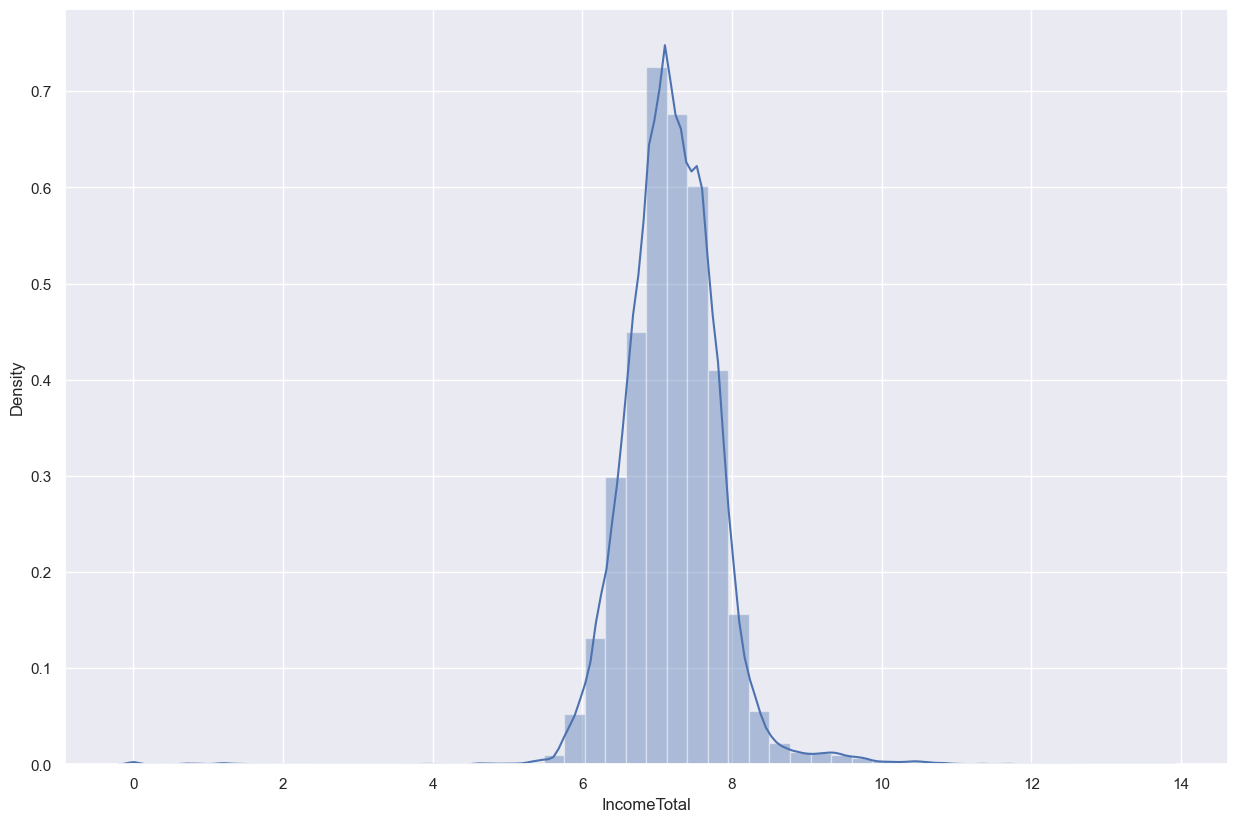

In [107]:
sns.distplot(np.log1p(default_data['IncomeTotal']))

In [108]:
max(default_data['IncomeTotal']), min(default_data['IncomeTotal'])

(900555.0, 0.0)

In [109]:
default_data['IncomeTotal'].value_counts()

1200.00    2882
1000.00    2447
1500.00    2143
1100.00    1859
2000.00    1853
           ... 
323.00        1
2528.93       1
1161.90       1
3696.00       1
3408.00       1
Name: IncomeTotal, Length: 3457, dtype: int64

In [110]:
default_data

ListedOnUTC     BiddingStartedOn  BidsPortfolioManager  \
0       2016-01-14 10:00:21  2016-01-14 10:00:21                  2700   
1       2015-03-24 15:55:44  2015-03-24 15:55:44                  1115   
4       2016-01-15 08:54:39  2016-01-15 08:54:39                   455   
5       2015-07-27 10:16:47  2015-07-27 10:16:47                   760   
6       2015-09-14 10:14:26  2015-09-14 10:14:26                  1780   
...                     ...                  ...                   ...   
168336  2015-03-23 16:59:58  2015-03-23 16:59:58                  2915   
168338  2015-10-20 14:04:34  2015-10-20 14:04:34                   270   
168339  2015-08-31 17:02:49  2015-08-31 17:02:49                  3025   
168340  2016-02-05 11:58:02  2016-02-05 11:58:02                  1080   
168341  2015-03-02 07:07:05  2015-03-02 07:07:05                  2000   

        BidsApi  BidsManual  NewCreditCustomer LoanApplicationStartedDate  \
0           565      5835.0               True        2016-01-07 15:37:16   
1             0       385.0               True        2015-03-20 15:20:48   
4             0        75.0              False        2016-01-14 12:36:17   
5             0      1740.0              False        2015-07-26 08:22:01   
6             0      1720.0               True        2015-09-12 12:00:04   
...         ...         ...                ...                        ...   
168336        0       785.0               True        2015-03-18 14:18:22   
168338        0      2920.0              False        2015-10-19 16:21:33   
168339        0       285.0              False        2015-08-31 16:42:51   
168340      710      1400.0              False        2016-02-04 19:07:05   
168341        0         0.0               True        2015-02-19 13:36:36   

          LoanDate ContractEndDate FirstPaymentDate MaturityDate_Original  \
0       2016-01-19      2019-10-24       2016-02-22            2021-01-20   
1       2015-03-27             NaN       2015-05-04            2020-04-01   
4       2016-01-16      2018-07-19       2016-03-07            2021-02-08   
5       2015-07-27             NaN       2015-09-10            2020-08-10   
6       2015-09-16             NaN       2015-11-16            2020-10-15   
...            ...             ...              ...                   ...   
168336  2015-03-25      2019-05-06       2015-05-04            2020-04-01   
168338  2015-10-21      2021-05-17       2015-12-14            2020-11-12   
168339  2015-09-03             NaN       2015-10-05            2020-09-07   
168340  2016-02-05      2018-04-03       2016-03-08            2021-02-08   
168341  2015-03-02             NaN       2015-04-15            2020-03-16   

       MaturityDate_Last  ApplicationSignedHour  ApplicationSignedWeekday  \
0             2021-01-20                     22                         3   
1             2020-04-01                     15                         3   
4             2021-02-08                     12                         7   
5             2020-08-10                     10                         2   
6             2021-01-27                      9                         4   
...                  ...                    ...                       ...   
168336        2020-04-01                     16                         2   
168338        2021-05-17                      8                         4   
168339        2020-11-24                     22                         5   
168340        2022-03-25                     16                         6   
168341        2020-03-16                      7                         2   

        VerificationType  LanguageCode  Age  Gender Country  Amount  Interest  \
0                    4.0             1   44     0.0      EE  9100.0     13.67   
1                    3.0             6   42     0.0      ES  1500.0     40.40   
4                    1.0             6   42     1.0      ES   530.0     50.82   
5                    4.0    

In [111]:
#default_data['ActiveLateCategory'].value_counts()

In [112]:
cat_cols = ['NewCreditCustomer','ApplicationSignedWeekday','VerificationType','LanguageCode',
            'Gender','Country','UseOfLoan','Education','MaritalStatus','EmploymentStatus',
            'EmploymentDurationCurrentEmployer','OccupationArea','HomeOwnershipType','ActiveScheduleFirstPaymentReached',
            'ModelVersion','Rating','Status','Restructured','ActiveLateCategory','WorseLateCategory']

In [113]:
default_data[['Status','PrincipalBalance', 'InterestAndPenaltyBalance' ]]

Status  PrincipalBalance  InterestAndPenaltyBalance
0       Repaid              0.00                       0.00
1         Late           1035.27                    2740.89
4       Repaid              0.00                       0.00
5         Late           2221.42                    4230.51
6         Late           1813.03                    6783.44
...        ...               ...                        ...
168336  Repaid              0.00                       0.00
168338    Late           1713.16                    1113.50
168339    Late           1844.14                    2809.46
168340  Repaid              0.00                       0.00
168341    Late           2000.00                    4200.39

[68978 rows x 3 columns]

In [114]:
default_data['Status'].unique()

array(['Repaid', 'Late', 'Current'], dtype=object)

In [115]:
data['Status'].value_counts()

Late       66460
Current    52293
Repaid     49592
Name: Status, dtype: int64

In [116]:
data['DefaultDate'].value_counts()

0             99367
2019-12-23      569
2020-06-08      533
2020-07-06      432
2020-03-30      397
              ...  
2012-01-02        1
2012-04-12        1
2012-05-09        1
2013-08-07        1
2011-12-06        1
Name: DefaultDate, Length: 1896, dtype: int64

In [117]:
data.shape

(168345, 87)

In [118]:
data['IsDefault'] = data['DefaultDate'].apply(lambda x : 0 if x == 0 else 1)

In [119]:
data[['DefaultDate', 'IsDefault']]

DefaultDate  IsDefault
0       2017-12-06          1
1       2016-02-19          1
2                0          0
3                0          0
4       2017-06-20          1
...            ...        ...
168340  2017-10-10          1
168341  2015-06-16          1
168342           0          0
168343           0          0
168344           0          0

[168345 rows x 2 columns]

In [120]:
list_aa = []
for item in data.columns:
    list_aa.append((item, data[item].isna().sum()))
    
list_aa

[('ListedOnUTC', 0),
 ('BiddingStartedOn', 0),
 ('BidsPortfolioManager', 0),
 ('BidsApi', 0),
 ('BidsManual', 0),
 ('NewCreditCustomer', 0),
 ('LoanApplicationStartedDate', 0),
 ('LoanDate', 0),
 ('ContractEndDate', 68724),
 ('FirstPaymentDate', 0),
 ('MaturityDate_Original', 0),
 ('MaturityDate_Last', 0),
 ('ApplicationSignedHour', 0),
 ('ApplicationSignedWeekday', 0),
 ('VerificationType', 45),
 ('LanguageCode', 0),
 ('Age', 0),
 ('Gender', 45),
 ('Country', 0),
 ('Amount', 0),
 ('Interest', 0),
 ('LoanDuration', 0),
 ('MonthlyPayment', 6685),
 ('UseOfLoan', 0),
 ('Education', 45),
 ('MaritalStatus', 45),
 ('EmploymentStatus', 197),
 ('EmploymentDurationCurrentEmployer', 1027),
 ('OccupationArea', 86),
 ('HomeOwnershipType', 1652),
 ('IncomeFromPrincipalEmployer', 0),
 ('IncomeFromPension', 0),
 ('IncomeFromFamilyAllowance', 0),
 ('IncomeFromSocialWelfare', 0),
 ('IncomeFromLeavePay', 0),
 ('IncomeFromChildSupport', 0),
 ('IncomeOther', 0),
 ('IncomeTotal', 0),
 ('ExistingLiabilities

In [121]:
list_aa.sort(key = lambda x:x[1])

In [122]:
list_aa

[('ListedOnUTC', 0),
 ('BiddingStartedOn', 0),
 ('BidsPortfolioManager', 0),
 ('BidsApi', 0),
 ('BidsManual', 0),
 ('NewCreditCustomer', 0),
 ('LoanApplicationStartedDate', 0),
 ('LoanDate', 0),
 ('FirstPaymentDate', 0),
 ('MaturityDate_Original', 0),
 ('MaturityDate_Last', 0),
 ('ApplicationSignedHour', 0),
 ('ApplicationSignedWeekday', 0),
 ('LanguageCode', 0),
 ('Age', 0),
 ('Country', 0),
 ('Amount', 0),
 ('Interest', 0),
 ('LoanDuration', 0),
 ('UseOfLoan', 0),
 ('IncomeFromPrincipalEmployer', 0),
 ('IncomeFromPension', 0),
 ('IncomeFromFamilyAllowance', 0),
 ('IncomeFromSocialWelfare', 0),
 ('IncomeFromLeavePay', 0),
 ('IncomeFromChildSupport', 0),
 ('IncomeOther', 0),
 ('IncomeTotal', 0),
 ('ExistingLiabilities', 0),
 ('LiabilitiesTotal', 0),
 ('RefinanceLiabilities', 0),
 ('MonthlyPaymentDay', 0),
 ('ActiveScheduleFirstPaymentReached', 0),
 ('DefaultDate', 0),
 ('PlannedPrincipalPostDefault', 0),
 ('PlannedInterestPostDefault', 0),
 ('PrincipalRecovery', 0),
 ('InterestRecovery

In [123]:
data['Rating'].value_counts()

E     32103
D     31811
C     28000
F     25069
B     20645
HR    14829
A      6982
AA     6176
Name: Rating, dtype: int64

In [124]:
data['CreditScoreEsMicroL'].value_counts()

M      126104
M1       4321
M5       2432
M2       1723
M3       1644
M4       1540
M6        560
M8        102
M9         70
M7         69
M10        55
Name: CreditScoreEsMicroL, dtype: int64

##### The list "unwanted_cols" has the features which are either of less significance or they have more than 100000 missing values

In [125]:
unwanted_cols = ["ModelVersion",
"CreditScoreEsMicroL",
"ContractEndDate",
"InterestAndPenaltyDebtServicingCost",
"PrincipalDebtServicingCost"]

In [126]:
unwanted_cols

['ModelVersion',
 'CreditScoreEsMicroL',
 'ContractEndDate',
 'InterestAndPenaltyDebtServicingCost',
 'PrincipalDebtServicingCost']

In [127]:
for item in unwanted_cols:
    if item not in MV_g_100000:
        print(item)

ModelVersion
CreditScoreEsMicroL
ContractEndDate
InterestAndPenaltyDebtServicingCost
PrincipalDebtServicingCost


In [128]:
data = data.drop(columns = unwanted_cols, axis = 1)

In [129]:
data

ListedOnUTC     BiddingStartedOn  BidsPortfolioManager  \
0       2016-01-14 10:00:21  2016-01-14 10:00:21                  2700   
1       2015-03-24 15:55:44  2015-03-24 15:55:44                  1115   
2       2015-10-19 13:34:09  2015-10-19 13:34:09                   530   
3       2015-05-19 15:08:48  2015-05-19 15:08:48                  5080   
4       2016-01-15 08:54:39  2016-01-15 08:54:39                   455   
...                     ...                  ...                   ...   
168340  2016-02-05 11:58:02  2016-02-05 11:58:02                  1080   
168341  2015-03-02 07:07:05  2015-03-02 07:07:05                  2000   
168342  2016-02-17 10:17:35  2016-02-17 10:17:35                  6215   
168343  2016-02-05 09:35:26  2016-02-05 09:35:26                   430   
168344  2015-08-17 17:23:05  2015-08-17 17:23:05                  3000   

        BidsApi  BidsManual  NewCreditCustomer LoanApplicationStartedDate  \
0           565      5835.0               True        2016-01-07 15:37:16   
1             0       385.0               True        2015-03-20 15:20:48   
2             0         0.0               True        2015-10-14 09:31:28   
3             0      1820.0              False        2015-05-19 09:55:08   
4             0        75.0              False        2016-01-14 12:36:17   
...         ...         ...                ...                        ...   
168340      710      1400.0              False        2016-02-04 19:07:05   
168341        0         0.0               True        2015-02-19 13:36:36   
168342       70      1155.0              False        2016-02-17 09:16:05   
168343        0      1055.0              False        2016-02-04 15:41:12   
168344        0         0.0               True        2015-08-12 12:29:10   

          LoanDate FirstPaymentDate MaturityDate_Original MaturityDate_Last  \
0       2016-01-19       2016-02-22            2021-01-20        2021-01-20   
1       2015-03-27       2015-05-04            2020-04-01        2020-04-01   
2       2015-10-19       2015-12-08            2020-11-09        2020-11-09   
3       2015-05-20       2015-07-15            2020-06-15        2015-05-21   
4       2016-01-16       2016-03-07            2021-02-08        2021-02-08   
...            ...              ...                   ...               ...   
168340  2016-02-05       2016-03-08            2021-02-08        2022-03-25   
168341  2015-03-02       2015-04-15            2020-03-16        2020-03-16   
168342  2016-02-18       2016-03-23            2021-02-23        2021-02-23   
168343  2016-02-10       2016-04-01            2021-03-01        2021-03-01   
168344  2015-08-17       2015-10-12            2020-09-10        2020-09-10   

        ApplicationSignedHour  ApplicationSignedWeekday  VerificationType  \
0                          22                         3               4.0   
1                          15                         3               3.0   
2                          14                         2               4.0   
3                          15                         3               4.0   
4                          12                         7               1.0   
...                       ...                       ...               ...   
168340                     16                         6               3.0   
168341                      7                         2               1.0   
168342                     11                         5               4.0   
168343                     14                         4               1.0   
168344                     20                         2               1.0   

        LanguageCode  Age  Gender Country  Amount  Interest  LoanDuration  \
0                  1   44     0.0      EE  9100.0     13.67            60   
1                  6   42     0.0      ES  1500.0     40.40            60   
2                  1   45     1.0      EE   530.0     25.68            60   
3                  1

In [130]:
list_b = []
for item in data.columns:
    print(str(item) + "--"*25 + str(data[item].isna().sum()))
    list_b.append((item,data[item].isna().sum()))

ListedOnUTC--------------------------------------------------0
BiddingStartedOn--------------------------------------------------0
BidsPortfolioManager--------------------------------------------------0
BidsApi--------------------------------------------------0
BidsManual--------------------------------------------------0
NewCreditCustomer--------------------------------------------------0
LoanApplicationStartedDate--------------------------------------------------0
LoanDate--------------------------------------------------0
FirstPaymentDate--------------------------------------------------0
MaturityDate_Original--------------------------------------------------0
MaturityDate_Last--------------------------------------------------0
ApplicationSignedHour--------------------------------------------------0
ApplicationSignedWeekday--------------------------------------------------0
VerificationType--------------------------------------------------45
LanguageCode-----------------------------

In [131]:
list_b.sort(key = lambda x:x[1])

In [132]:
list_b

[('ListedOnUTC', 0),
 ('BiddingStartedOn', 0),
 ('BidsPortfolioManager', 0),
 ('BidsApi', 0),
 ('BidsManual', 0),
 ('NewCreditCustomer', 0),
 ('LoanApplicationStartedDate', 0),
 ('LoanDate', 0),
 ('FirstPaymentDate', 0),
 ('MaturityDate_Original', 0),
 ('MaturityDate_Last', 0),
 ('ApplicationSignedHour', 0),
 ('ApplicationSignedWeekday', 0),
 ('LanguageCode', 0),
 ('Age', 0),
 ('Country', 0),
 ('Amount', 0),
 ('Interest', 0),
 ('LoanDuration', 0),
 ('UseOfLoan', 0),
 ('IncomeFromPrincipalEmployer', 0),
 ('IncomeFromPension', 0),
 ('IncomeFromFamilyAllowance', 0),
 ('IncomeFromSocialWelfare', 0),
 ('IncomeFromLeavePay', 0),
 ('IncomeFromChildSupport', 0),
 ('IncomeOther', 0),
 ('IncomeTotal', 0),
 ('ExistingLiabilities', 0),
 ('LiabilitiesTotal', 0),
 ('RefinanceLiabilities', 0),
 ('MonthlyPaymentDay', 0),
 ('ActiveScheduleFirstPaymentReached', 0),
 ('DefaultDate', 0),
 ('PlannedPrincipalPostDefault', 0),
 ('PlannedInterestPostDefault', 0),
 ('PrincipalRecovery', 0),
 ('InterestRecovery

In [133]:
default_data = data[data['IsDefault']==1]

In [134]:
default_data.to_csv('default_only_data1.csv')

In [135]:
default_data

ListedOnUTC     BiddingStartedOn  BidsPortfolioManager  \
0       2016-01-14 10:00:21  2016-01-14 10:00:21                  2700   
1       2015-03-24 15:55:44  2015-03-24 15:55:44                  1115   
4       2016-01-15 08:54:39  2016-01-15 08:54:39                   455   
5       2015-07-27 10:16:47  2015-07-27 10:16:47                   760   
6       2015-09-14 10:14:26  2015-09-14 10:14:26                  1780   
...                     ...                  ...                   ...   
168336  2015-03-23 16:59:58  2015-03-23 16:59:58                  2915   
168338  2015-10-20 14:04:34  2015-10-20 14:04:34                   270   
168339  2015-08-31 17:02:49  2015-08-31 17:02:49                  3025   
168340  2016-02-05 11:58:02  2016-02-05 11:58:02                  1080   
168341  2015-03-02 07:07:05  2015-03-02 07:07:05                  2000   

        BidsApi  BidsManual  NewCreditCustomer LoanApplicationStartedDate  \
0           565      5835.0               True        2016-01-07 15:37:16   
1             0       385.0               True        2015-03-20 15:20:48   
4             0        75.0              False        2016-01-14 12:36:17   
5             0      1740.0              False        2015-07-26 08:22:01   
6             0      1720.0               True        2015-09-12 12:00:04   
...         ...         ...                ...                        ...   
168336        0       785.0               True        2015-03-18 14:18:22   
168338        0      2920.0              False        2015-10-19 16:21:33   
168339        0       285.0              False        2015-08-31 16:42:51   
168340      710      1400.0              False        2016-02-04 19:07:05   
168341        0         0.0               True        2015-02-19 13:36:36   

          LoanDate FirstPaymentDate MaturityDate_Original MaturityDate_Last  \
0       2016-01-19       2016-02-22            2021-01-20        2021-01-20   
1       2015-03-27       2015-05-04            2020-04-01        2020-04-01   
4       2016-01-16       2016-03-07            2021-02-08        2021-02-08   
5       2015-07-27       2015-09-10            2020-08-10        2020-08-10   
6       2015-09-16       2015-11-16            2020-10-15        2021-01-27   
...            ...              ...                   ...               ...   
168336  2015-03-25       2015-05-04            2020-04-01        2020-04-01   
168338  2015-10-21       2015-12-14            2020-11-12        2021-05-17   
168339  2015-09-03       2015-10-05            2020-09-07        2020-11-24   
168340  2016-02-05       2016-03-08            2021-02-08        2022-03-25   
168341  2015-03-02       2015-04-15            2020-03-16        2020-03-16   

        ApplicationSignedHour  ApplicationSignedWeekday  VerificationType  \
0                          22                         3               4.0   
1                          15                         3               3.0   
4                          12                         7               1.0   
5                          10                         2               4.0   
6                           9                         4               3.0   
...                       ...                       ...               ...   
168336                     16                         2               3.0   
168338                      8                         4               4.0   
168339                     22                         5               3.0   
168340                     16                         6               3.0   
168341                      7                         2               1.0   

        LanguageCode  Age  Gender Country  Amount  Interest  LoanDuration  \
0                  1   44     0.0      EE  9100.0     13.67            60   
1                  6   42     0.0      ES  1500.0     40.40            60   
4                  6   42     1.0      ES   530.0     50.82            60   
5                  1

In [136]:
list_c = []
for item in default_data.columns:
    print(str(item) + "--"*5 + str(default_data[item].isna().sum()))
    list_c.append((item,default_data[item].isna().sum()))

ListedOnUTC----------0
BiddingStartedOn----------0
BidsPortfolioManager----------0
BidsApi----------0
BidsManual----------0
NewCreditCustomer----------0
LoanApplicationStartedDate----------0
LoanDate----------0
FirstPaymentDate----------0
MaturityDate_Original----------0
MaturityDate_Last----------0
ApplicationSignedHour----------0
ApplicationSignedWeekday----------0
VerificationType----------19
LanguageCode----------0
Age----------0
Gender----------19
Country----------0
Amount----------0
Interest----------0
LoanDuration----------0
MonthlyPayment----------1655
UseOfLoan----------0
Education----------19
MaritalStatus----------19
EmploymentStatus----------80
EmploymentDurationCurrentEmployer----------339
OccupationArea----------26
HomeOwnershipType----------612
IncomeFromPrincipalEmployer----------0
IncomeFromPension----------0
IncomeFromFamilyAllowance----------0
IncomeFromSocialWelfare----------0
IncomeFromLeavePay----------0
IncomeFromChildSupport----------0
IncomeOther----------0
Inc

In [137]:
list_c.sort(key = lambda x:x[1])

In [138]:
list_c

[('ListedOnUTC', 0),
 ('BiddingStartedOn', 0),
 ('BidsPortfolioManager', 0),
 ('BidsApi', 0),
 ('BidsManual', 0),
 ('NewCreditCustomer', 0),
 ('LoanApplicationStartedDate', 0),
 ('LoanDate', 0),
 ('FirstPaymentDate', 0),
 ('MaturityDate_Original', 0),
 ('MaturityDate_Last', 0),
 ('ApplicationSignedHour', 0),
 ('ApplicationSignedWeekday', 0),
 ('LanguageCode', 0),
 ('Age', 0),
 ('Country', 0),
 ('Amount', 0),
 ('Interest', 0),
 ('LoanDuration', 0),
 ('UseOfLoan', 0),
 ('IncomeFromPrincipalEmployer', 0),
 ('IncomeFromPension', 0),
 ('IncomeFromFamilyAllowance', 0),
 ('IncomeFromSocialWelfare', 0),
 ('IncomeFromLeavePay', 0),
 ('IncomeFromChildSupport', 0),
 ('IncomeOther', 0),
 ('IncomeTotal', 0),
 ('ExistingLiabilities', 0),
 ('LiabilitiesTotal', 0),
 ('RefinanceLiabilities', 0),
 ('MonthlyPaymentDay', 0),
 ('ActiveScheduleFirstPaymentReached', 0),
 ('PlannedInterestTillDate', 0),
 ('DefaultDate', 0),
 ('PlannedPrincipalPostDefault', 0),
 ('PlannedInterestPostDefault', 0),
 ('PrincipalR

In [139]:
data['VerificationType']

0         4.0
1         3.0
2         4.0
3         4.0
4         1.0
         ... 
168340    3.0
168341    1.0
168342    4.0
168343    1.0
168344    1.0
Name: VerificationType, Length: 168345, dtype: float64

In [140]:
list_d = []
for item in data.columns:
    if data[item].isna().sum() > 0:
        print(str(item) + "--"*5 + str(data[item].isna().sum()))
        list_d.append((item,data[item].isna().sum()))

VerificationType----------45
Gender----------45
MonthlyPayment----------6685
Education----------45
MaritalStatus----------45
EmploymentStatus----------197
EmploymentDurationCurrentEmployer----------1027
OccupationArea----------86
HomeOwnershipType----------1652
DebtToIncome----------45
FreeCash----------45
PlannedInterestTillDate----------2875
LastPaymentOn----------7442
CurrentDebtDaysPrimary----------94898
DebtOccuredOn----------94898
CurrentDebtDaysSecondary----------89530
DebtOccuredOnForSecondary----------89530
ExpectedLoss----------2636
LossGivenDefault----------2636
ExpectedReturn----------2636
ProbabilityOfDefault----------2636
PrincipalOverdueBySchedule----------14837
EAD1----------99368
EAD2----------99368
RecoveryStage----------61291
StageActiveSince----------54917
Rating----------2730
ActiveLateCategory----------94923
WorseLateCategory----------46821
CreditScoreEeMini----------70272
PrincipalWriteOffs----------94853
InterestAndPenaltyWriteOffs----------94853
PreviousRepayme

In [141]:
list_d.sort(key = lambda x: x[1])

In [142]:
len(list_d)

36

In [143]:
# data[(data['Status']== 'Late') & (data['IsDefault']==1)] 

In [144]:
# data[(data['Status']== 'Current') & (data['IsDefault']==1)]

In [145]:
# data[(data['Status']== 'Repaid') & (data['IsDefault']==1)]

In [146]:
# data[(data['Status']== 'Late') & (data['IsDefault']==0)] 

In [147]:
# data[(data['Status']== 'Current') & (data['IsDefault']==0)]

In [148]:
# data[(data['Status']== 'Repaid') & (data['IsDefault']==0)]

In [149]:
data.describe()  

BidsPortfolioManager        BidsApi     BidsManual  \
count         168345.000000  168345.000000  168345.000000   
mean             842.398877      29.150394     526.905307   
std             1261.469070     152.105526     728.605634   
min                0.000000       0.000000       0.000000   
25%              119.000000       0.000000      65.000000   
50%              379.000000       0.000000     286.000000   
75%             1030.000000       5.000000     686.000000   
max            10625.000000    7570.000000   10630.000000   

       ApplicationSignedHour  ApplicationSignedWeekday  VerificationType  \
count          168345.000000             168345.000000     168300.000000   
mean               13.334308                  3.914449          2.996595   
std                 4.996103                  1.746242          1.367418   
min                 0.000000                  1.000000          0.000000   
25%                10.000000                  2.000000          1.000000   
50%                13.000000                  4.000000          4.000000   
75%                17.000000                  5.000000          4.000000   
max                23.000000                  7.000000          4.000000   

        LanguageCode            Age         Gender         Amount  \
count  168345.000000  168345.000000  168300.000000  168345.000000   
mean        2.692863      40.500050       0.466459    2538.786591   
std         1.901314      12.358175       0.627391    2176.576955   
min         1.000000       0.000000       0.000000       6.390000   
25%         1.000000      31.000000       0.000000     740.000000   
50%         2.000000      39.000000       0.000000    2125.000000   
75%         4.000000      49.000000       1.000000    3721.000000   
max        22.000000      77.000000       2.000000   10632.000000   

            Interest   LoanDuration  MonthlyPayment      UseOfLoan  \
count  168345.000000  168345.000000   161660.000000  168345.000000   
mean       35.053621      47.135757      114.453376       0.073248   
std        24.263382      15.201364      109.078918       3.009157   
min         3.000000       1.000000        0.000000      -1.000000   
25%        20.030000      36.000000       32.847500      -1.000000   
50%        30.780000      60.000000       92.615000      -1.000000   
75%        40.070000      60.000000      154.550000      -1.000000   
max       264.310000      60.000000     2368.540000     110.000000   

           Education  MaritalStatus  EmploymentStatus  OccupationArea  \
count  168300.000000  168300.000000     168148.000000   168259.000000   
mean        3.620576      -0.288158         -0.078306        0.903042   
std         1.210161       1.435478          1.795093        4.465400   
min        -1.000000      -1.000000         -1.000000       -1.000000   
25%         3.000000      -1.000000         -1.000000       -1.000000   
50%         4.000000      -1.000000         -1.000000       -1.000000   
75%         4.000000      -1.000000         -1.000000       -1.000000   
max         5.000000       5.000000          6.000000       19.000000   

       HomeOwnershipType  IncomeFromPrincipalEmployer  IncomeFromPension  \
count      166693.000000                168345.000000      168345.000000   
mean            3.331526                   349.332990          15.025740   
std             2.892790                  1606.658032         135.060389   
min            -1.000000                     0.000000           0.000000   
25%             1.000000                     0.000000           0.000000   
50%             2.000000                     0.000000           0.000000   
75%             4.000000                     0.000000           0.000000   
max            10.000000                228400.000000        5038.000000   

       IncomeFromFamilyAllowance  IncomeFromSocialWelfare  IncomeFromLeavePay  \
count              168345.000000            168345.000000       168345.000000   
mean          

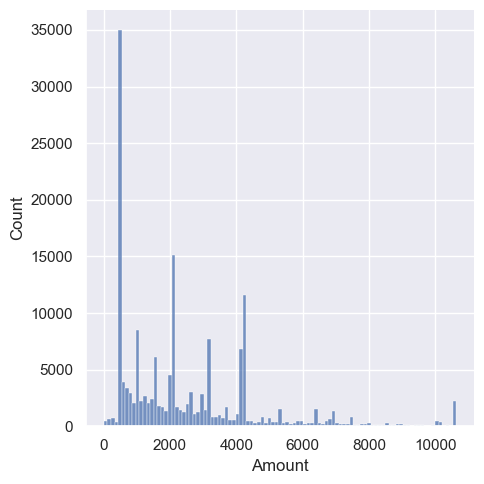

In [150]:
sns.displot(data['Amount'])  

<AxesSubplot:xlabel='Status', ylabel='count'>

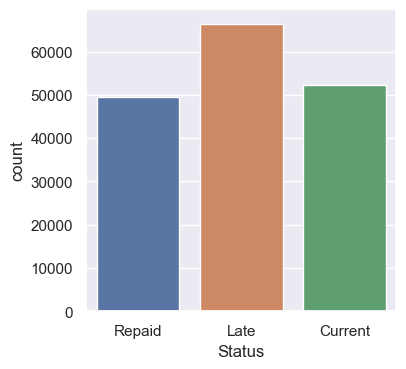

In [151]:
# data[data['Status'] != 'Current'] 
sns.set(rc={'figure.figsize':(4,4)})
sns.countplot(data['Status'])

<AxesSubplot:xlabel='Status', ylabel='count'>

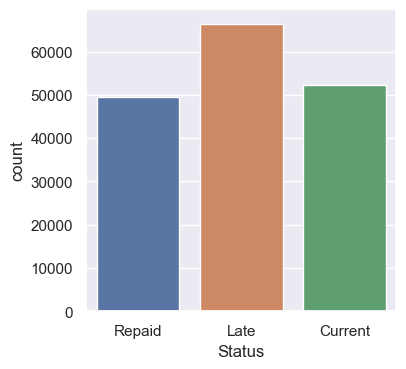

In [152]:
sns.set(rc={'figure.figsize':(4,4)})
sns.countplot(data['Status']) 

<AxesSubplot:xlabel='IsDefault', ylabel='count'>

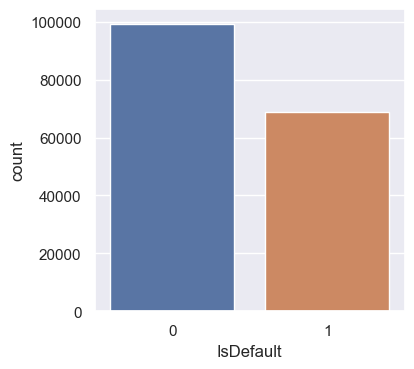

In [153]:
sns.countplot(data['IsDefault']) 

##### Label Changing Dict

In [154]:
occupation_area_dict = SortedDict({1.0:"Other",
2.0:"Mining",
3.0:"Processing",
4.0:"Energy",
5.0:"Utilities",
6.0:"Construction",
7.0:"Retail and wholesale",
8.0:"Transport and warehousing",
9.0:"Hospitality and catering",
10.0:"Info and telecom",
11.0:"Finance and insurance",
12.0:"Real-estate",
13.0:"Research",
14.0:"Administrative",
15.0:"Civil service & military",
16.0:"Education",
17.0:"Healthcare and social help",
18.0:"Art and entertainment",
19.0:"Agriculture, forestry and fishing"})


employment_status_dict = SortedDict({1.0 :"Unemployed",
                          2.0:"Partially employed",
                          3.0:"Fully employed", 
                          4.0:"Self-employed",
                          5.0:"Entrepreneur",
                          6.0:"Retiree"})


gender_dict = SortedDict({0.0: 'Male',
               1.0: 'Female',
               2.0: 'Others'})

language_code_dict = SortedDict({1.0:"Estonian",
                                 2.0:"English",
                                 3.0:"Russian",
                                 4.0:"Finnish",
                                 5.0:"German",
                                 6.0:"Spanish",
                                 9.0:"Slovakian"})

verification_type_dict = SortedDict({1.0:"Income unverified",
                                     2.0:"Income unverified, cross-referenced by phone",
                                     3.0:"Income verified",
                                     4.0:"Income and expenses verified"})

marital_status_dict = SortedDict({1.0:"Married",
                                  2.0:"Cohabitant",
                                  3.0:"Single",
                                  4.0:"Divorced",
                                  5.0:"Widow"})

education_dict = SortedDict({1.0:"Primary education",
                             2.0:"Basic education",
                             3.0:"Vocational education",
                             4.0:"Secondary education",
                             5.0:"Higher education"})

home_ownership_type_dict = SortedDict({0.0:"Homeless",
                                  1.0:"Owner",
                                  2.0:"Living with parents",
                                  3.0:"Tenant, pre-furnished property",
                                  4.0:"Tenant, unfurnished property",
                                  5.0:"Council house",
                                  6.0:"Joint tenant",
                                  7.0:"Joint ownership",
                                  8.0:"Mortgage",
                                  9.0:"Owner with encumbrance",
                                  10.0:"Other"})
isdefault_dict = SortedDict({0:"Non-Defaulter",
                            1:"Defaulter"})


data['Gender'] = data['Gender'].replace(gender_dict)
data['OccupationArea'] = data['OccupationArea'].replace(occupation_area_dict)
data['EmploymentStatus'] = data['EmploymentStatus'].replace(employment_status_dict)
data['VerificationType'] = data['VerificationType'].replace(verification_type_dict)
data['MaritalStatus'] = data['MaritalStatus'].replace(marital_status_dict)
data['Education'] = data['Education'].replace(education_dict)
data['HomeOwnershipType'] = data['HomeOwnershipType'].replace(home_ownership_type_dict)
data['IsDefault'] = data['IsDefault'].replace(isdefault_dict)

In [155]:
data = data[data['Status'] != 'Current']

<AxesSubplot:xlabel='Status', ylabel='count'>

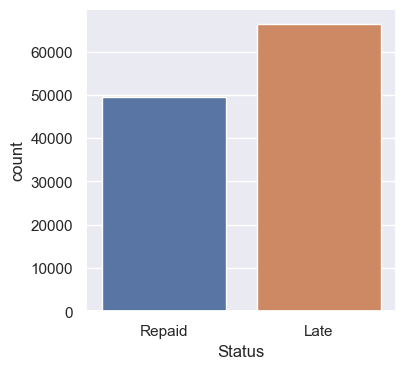

In [156]:
sns.set(rc={'figure.figsize':(4,4)})
sns.countplot(data['Status']) 

<AxesSubplot:xlabel='IsDefault', ylabel='count'>

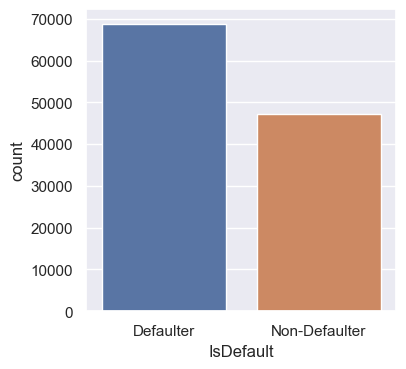

In [157]:
sns.set(rc={'figure.figsize':(4,4)})
sns.countplot(data['IsDefault']) 

# list_d

In [158]:
list_d

[('VerificationType', 45),
 ('Gender', 45),
 ('Education', 45),
 ('MaritalStatus', 45),
 ('DebtToIncome', 45),
 ('FreeCash', 45),
 ('OccupationArea', 86),
 ('EmploymentStatus', 197),
 ('EmploymentDurationCurrentEmployer', 1027),
 ('HomeOwnershipType', 1652),
 ('ExpectedLoss', 2636),
 ('LossGivenDefault', 2636),
 ('ExpectedReturn', 2636),
 ('ProbabilityOfDefault', 2636),
 ('Rating', 2730),
 ('PlannedInterestTillDate', 2875),
 ('MonthlyPayment', 6685),
 ('LastPaymentOn', 7442),
 ('PrincipalOverdueBySchedule', 14837),
 ('WorseLateCategory', 46821),
 ('StageActiveSince', 54917),
 ('PreviousRepaymentsBeforeLoan', 57122),
 ('RecoveryStage', 61291),
 ('NextPaymentNr', 62478),
 ('NrOfScheduledPayments', 62478),
 ('CreditScoreEeMini', 70272),
 ('CurrentDebtDaysSecondary', 89530),
 ('DebtOccuredOnForSecondary', 89530),
 ('ActiveLateLastPaymentCategory', 89530),
 ('PrincipalWriteOffs', 94853),
 ('InterestAndPenaltyWriteOffs', 94853),
 ('CurrentDebtDaysPrimary', 94898),
 ('DebtOccuredOn', 94898),


In [159]:
len(list_d)

36

In [160]:
data.shape

(116052, 83)

In [161]:
data['VerificationType'].isnull().sum()

45

In [162]:
data[(data['VerificationType'].isnull()) & (data['IsDefault'] == 1)][['Status','DefaultDate','IsDefault']]

Empty DataFrame
Columns: [Status, DefaultDate, IsDefault]
Index: []

From the above cell, it is evident that the loans taken by the people whose VerificationType was null have repaid the loans. 19 have VerificationType as NA and have defaulted and have paid the loan back. 26 paid the loan amount with interest back within the due date and were not defaulters at all.

In [163]:
sns.set(rc={'figure.figsize':(10,6)})

In [164]:
ax = sns.barplot(x=data['VerificationType'], y=data['IsDefault'], data=default_data)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 15)

TypeError: Neither the `x` nor `y` variable appears to be numeric.

##### Imputing VerificationType 

In [165]:
# default_data[(default_data['VerificationType'] == 0.0)| (default_data['VerificationType'].isnull()) | (default_data['VerificationType'] == 2.0) & (default_data['IsDefault'] == 1)]

In [166]:
# data[(data['VerificationType'].isnull()) & (data['IsDefault'] == 1)][['Status','DefaultDate','IsDefault', 'VerificationType']]

In [167]:
data['VerificationType'].isna().sum()

45

In [168]:
data['VerificationType'].value_counts() 

Income and expenses verified                    68542
Income unverified                               36665
Income verified                                  8964
Income unverified, cross-referenced by phone     1828
0.0                                                 8
Name: VerificationType, dtype: int64

In [169]:
data['VerificationType'] = data['VerificationType'].fillna("Income unverified, cross-referenced by phone")
data['VerificationType'] = data['VerificationType'].replace(0.0, "Income unverified, cross-referenced by phone")

In [170]:
data['VerificationType'].isna().sum()

0

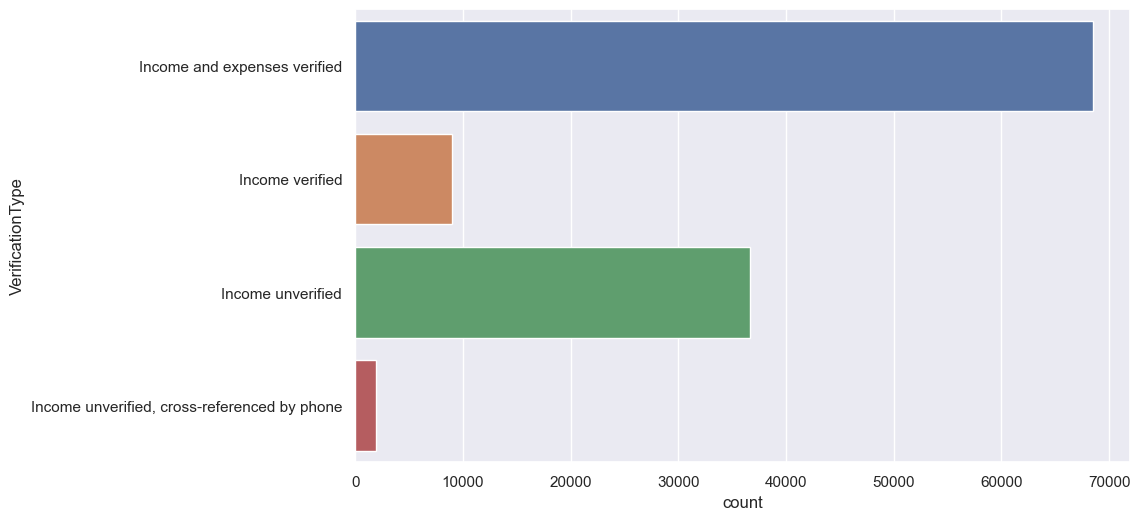

In [171]:
ax = sns.countplot(y = data['VerificationType'])
sns.set(rc={'figure.figsize':(10,4)})

[Text(0.0, 0, ''),
 Text(10000.0, 0, ''),
 Text(20000.0, 0, ''),
 Text(30000.0, 0, ''),
 Text(40000.0, 0, ''),
 Text(50000.0, 0, ''),
 Text(60000.0, 0, ''),
 Text(70000.0, 0, ''),
 Text(80000.0, 0, '')]

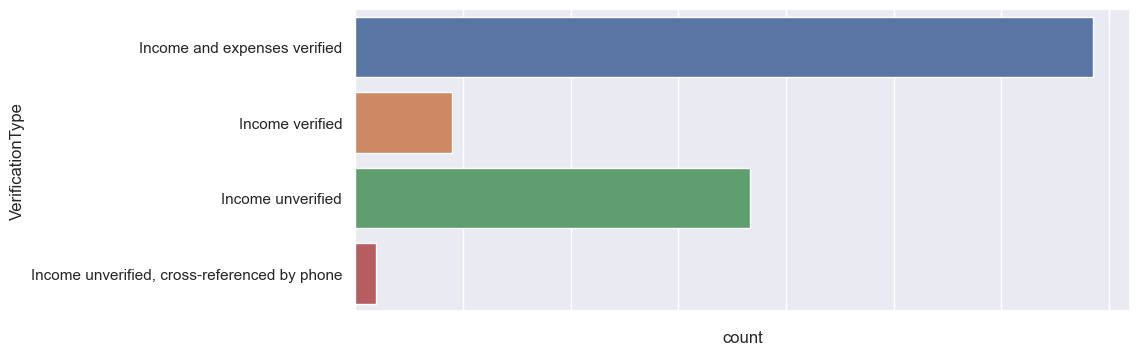

In [172]:
ax = sns.countplot(y = data['VerificationType'])
sns.set(rc={'figure.figsize':(10,4)})
ax.set_xticklabels(ax.get_xticklabels(),rotation = 15)

##### Imputing Gender

In [173]:
data['Gender'].isna().sum()

45

In [174]:
data['Gender'].value_counts()

Male      72408
Female    32897
Others    10702
Name: Gender, dtype: int64

In [175]:
data['Gender'] = data['Gender'].fillna(0.0)

In [176]:
data['Gender'] = data['Gender'].replace(0.0, "Male") 

In [177]:
data['Gender'].isna().sum()

0

[Text(0, 0, 'Male'), Text(1, 0, 'Female'), Text(2, 0, 'Others')]

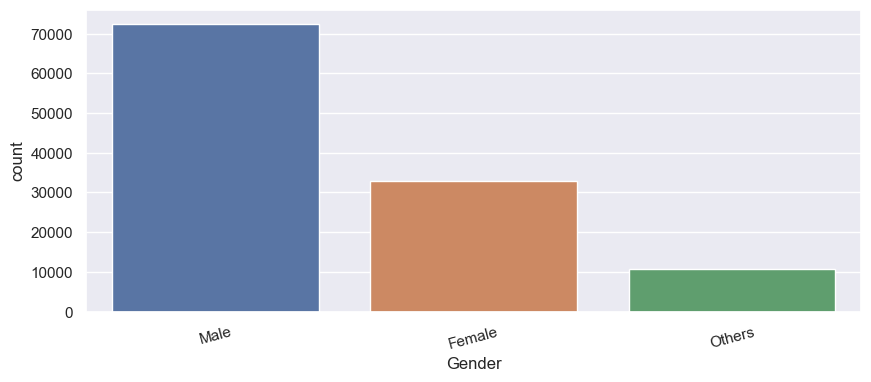

In [178]:
ax = sns.countplot(data['Gender'])

sns.set(rc={'figure.figsize':(15,8)})
ax.set_xticklabels(ax.get_xticklabels(),rotation = 15)

##### Imputing Education

In [179]:
data['Education'].isna().sum()

45

In [180]:
data['Education'].value_counts()

Secondary education     42935
Higher education        30500
Vocational education    26033
Primary education       10598
Basic education          5928
0.0                         8
-1.0                        5
Name: Education, dtype: int64

In [181]:
data['Education'] = data['Education'].fillna("Primary education")
data['Education'] = data['Education'].replace(-1.0, "Primary education" )
data['Education'] = data['Education'].replace(0.0, "Primary education")

In [182]:
data['Education'].value_counts().isna().sum()

0

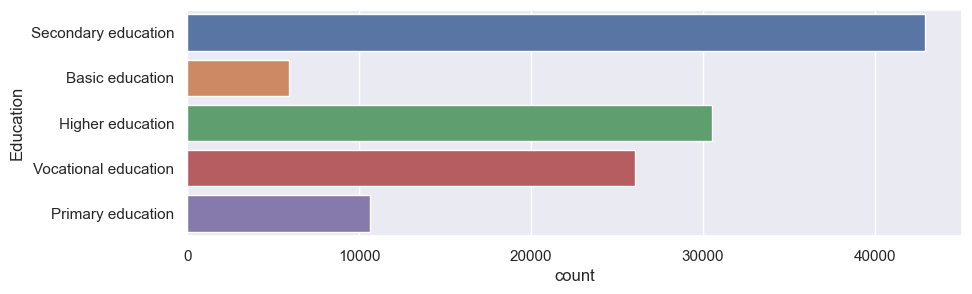

In [183]:
# ax = sns.countplot(data['Education'])
# sns.set(rc={'figure.figsize':(4,4)})
sns.set(rc={'figure.figsize':(10,3)})


ax = sns.countplot(y = data['Education'])

sns.set(rc={'figure.figsize':(10,4)})
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 15)

##### Imputing Marital Status

In [184]:
data['MaritalStatus'].value_counts().isna().sum()

0

In [185]:
data['MaritalStatus'].value_counts()

-1.0          81017
Single        12020
Married       10187
Cohabitant     8958
Divorced       3258
Widow           559
0.0               8
Name: MaritalStatus, dtype: int64

In [186]:
data['MaritalStatus'] = data['MaritalStatus'].fillna("Single")
data['MaritalStatus'] = data['MaritalStatus'].replace(-1.0, "Single" )
data['MaritalStatus'] = data['MaritalStatus'].replace(0.0, "Single")

In [187]:
data['MaritalStatus'].value_counts()

Single        93090
Married       10187
Cohabitant     8958
Divorced       3258
Widow           559
Name: MaritalStatus, dtype: int64

In [188]:
data['MaritalStatus'].isna().sum()

0

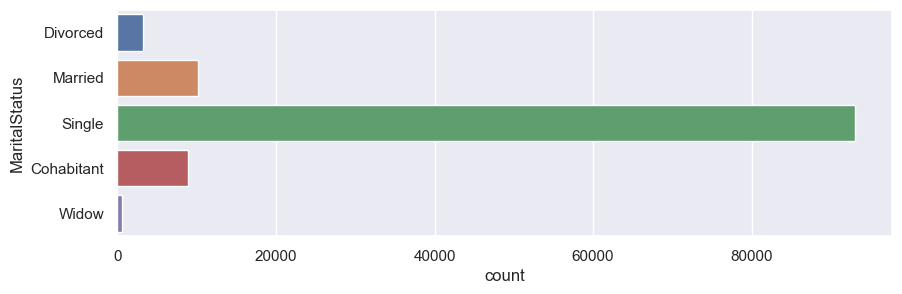

In [189]:
sns.set(rc={'figure.figsize':(10,3)})


ax = sns.countplot(y = data['MaritalStatus']) 

sns.set(rc={'figure.figsize':(10,3)})
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 15)

##### Imputing DebtToIncome

In [190]:
data['DebtToIncome'].isna().sum()

45

In [191]:
data[data['DebtToIncome'].isna()]['Status'].value_counts()

Repaid    45
Name: Status, dtype: int64

In [192]:
data['DebtToIncome'].value_counts()

0.00     83248
20.00       27
69.98       22
69.89       21
69.95       19
         ...  
67.45        1
67.25        1
58.57        1
61.10        1
50.84        1
Name: DebtToIncome, Length: 6761, dtype: int64

In [193]:
data['DebtToIncome'].nunique()   

6761

In [194]:
# As all the Borrowers with DebtToIncome have already Repaid the loans, we can impute the value with 0.0 as their current debt will be 0

In [195]:
data['DebtToIncome'] = data['DebtToIncome'].fillna(0.0)

In [196]:
data['DebtToIncome'].isna().sum()

0

##### Imputing FreeCash

In [197]:
#Filling NA with 0.0 as the persons may not have freecash

In [198]:
data['FreeCash'].isna().sum()

45

In [199]:
data['FreeCash'].value_counts() 

0.00      83245
250.00       40
280.00       31
288.00       30
251.00       29
          ...  
470.39        1
277.61        1
386.63        1
672.33        1
132.35        1
Name: FreeCash, Length: 22695, dtype: int64

In [200]:
data['FreeCash'].nunique( )         

22695

In [201]:
data['FreeCash'] = data['FreeCash'].fillna(0.0) 
data['FreeCash'].isna().sum()

0

##### Imputing OccupationArea

In [202]:
data['OccupationArea'].isna().sum()

86

In [203]:
data['OccupationArea'].value_counts() 

-1.0                                 81068
Other                                 8048
Retail and wholesale                  3405
Construction                          3203
Processing                            3039
Transport and warehousing             2383
Healthcare and social help            2308
Hospitality and catering              2186
Info and telecom                      1872
Civil service & military              1631
Education                             1346
Finance and insurance                 1110
Agriculture, forestry and fishing      942
Administrative                         819
Energy                                 570
Art and entertainment                  570
Research                               531
Real-estate                            456
Utilities                              347
Mining                                 121
0.0                                     11
Name: OccupationArea, dtype: int64

In [204]:
data['OccupationArea'] = data['OccupationArea'].replace(0.0, "Other") 
data['OccupationArea'] = data['OccupationArea'].fillna("Other")
data['OccupationArea'] = data['OccupationArea'].replace(-1.0, "Other")

In [205]:
data['OccupationArea'].value_counts() 

Other                                89213
Retail and wholesale                  3405
Construction                          3203
Processing                            3039
Transport and warehousing             2383
Healthcare and social help            2308
Hospitality and catering              2186
Info and telecom                      1872
Civil service & military              1631
Education                             1346
Finance and insurance                 1110
Agriculture, forestry and fishing      942
Administrative                         819
Energy                                 570
Art and entertainment                  570
Research                               531
Real-estate                            456
Utilities                              347
Mining                                 121
Name: OccupationArea, dtype: int64

In [206]:
data['OccupationArea'].isna().sum()

0

In [207]:
#data['OccupationArea'] = data['OccupationArea'].replace(1.0,"Other")

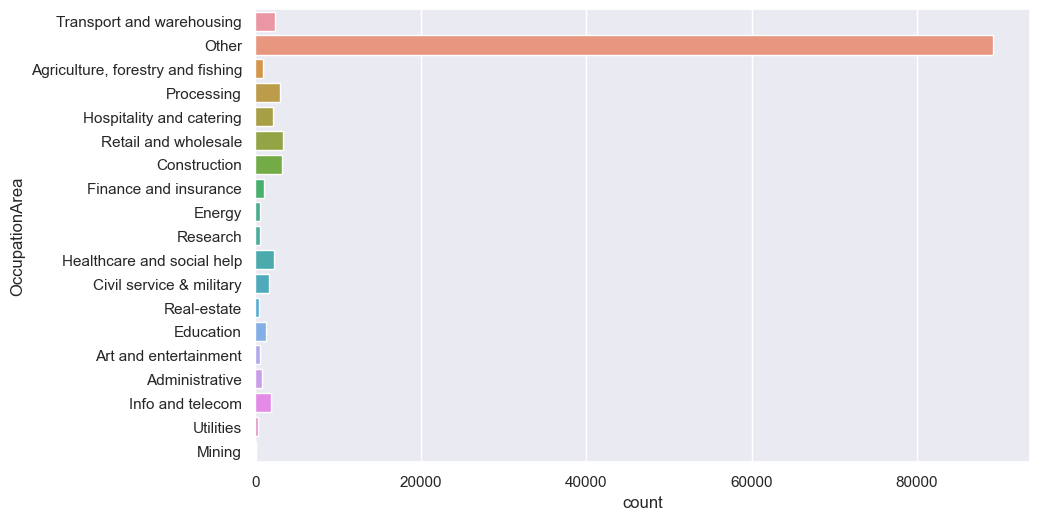

In [208]:
sns.set(rc={'figure.figsize':(10,6)})


ax = sns.countplot(y = data['OccupationArea']) 

sns.set(rc={'figure.figsize':(10,6)})
#ax.set_xticklabels(ax.get_xticklabels())

##### Imp Columns

##### Imputing EmploymentStatus

In [209]:
data['EmploymentStatus'].isna().sum()

197

In [210]:
data['EmploymentStatus'].value_counts() 

-1.0                  81017
Fully employed        28793
Entrepreneur           1857
Retiree                1750
Self-employed          1252
Partially employed     1154
0.0                      32
Name: EmploymentStatus, dtype: int64

<AxesSubplot:xlabel='EmploymentStatus', ylabel='count'>

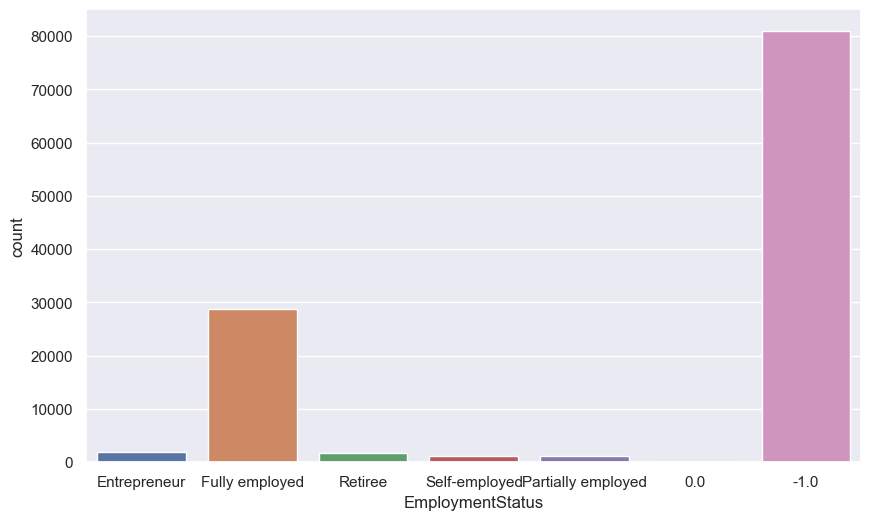

In [211]:
sns.countplot(data['EmploymentStatus']) 

In [212]:
data['EmploymentStatus'] = data['EmploymentStatus'].replace(-1.0, "Unemployed")
data['EmploymentStatus'] = data['EmploymentStatus'].replace(0.0, "Unemployed")

In [213]:
data['EmploymentStatus'] = data['EmploymentStatus'].fillna("Unemployed")

In [214]:
data['EmploymentStatus'].isna().sum() 

0

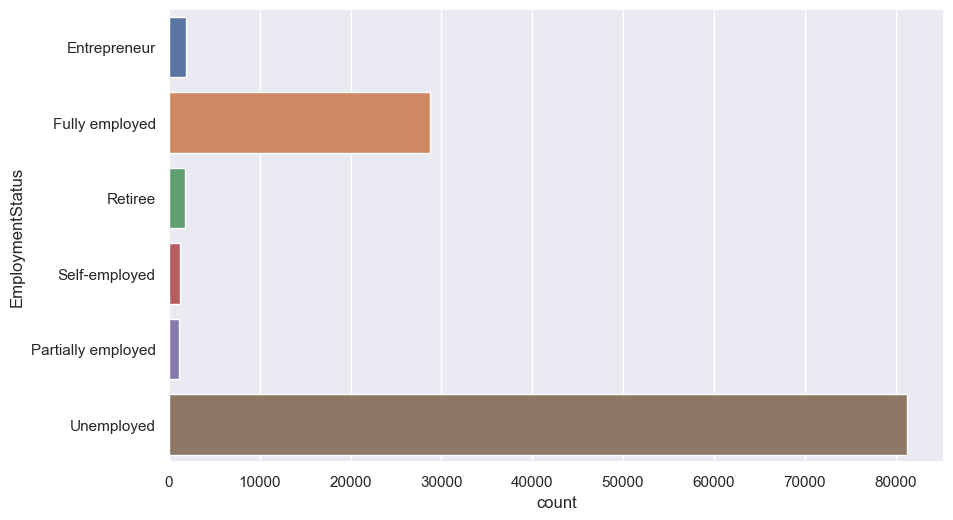

In [215]:
sns.set(rc={'figure.figsize':(10,6)})


ax = sns.countplot(y = data['EmploymentStatus']) 

sns.set(rc={'figure.figsize':(10,6)})
#ax.set_xticklabels(ax.get_xticklabels())

##### Imputing EmploymentDurationCurrentEmployer

In [216]:
data['EmploymentDurationCurrentEmployer'].isna().sum() 

877

In [217]:
data['EmploymentDurationCurrentEmployer'].value_counts() 

MoreThan5Years    43700
UpTo5Years        24145
UpTo1Year         21643
Retiree            6310
UpTo2Years         6048
UpTo3Years         4995
Other              4323
UpTo4Years         3325
TrialPeriod         686
Name: EmploymentDurationCurrentEmployer, dtype: int64

In [218]:
data['EmploymentDurationCurrentEmployer'] = data['EmploymentDurationCurrentEmployer'].fillna('Other')

In [219]:
data['EmploymentDurationCurrentEmployer'].isna().sum()

0

[Text(0, 0, 'UpTo3Years'),
 Text(1, 0, 'UpTo5Years'),
 Text(2, 0, 'MoreThan5Years'),
 Text(3, 0, 'UpTo1Year'),
 Text(4, 0, 'UpTo2Years'),
 Text(5, 0, 'TrialPeriod'),
 Text(6, 0, 'UpTo4Years'),
 Text(7, 0, 'Other'),
 Text(8, 0, 'Retiree')]

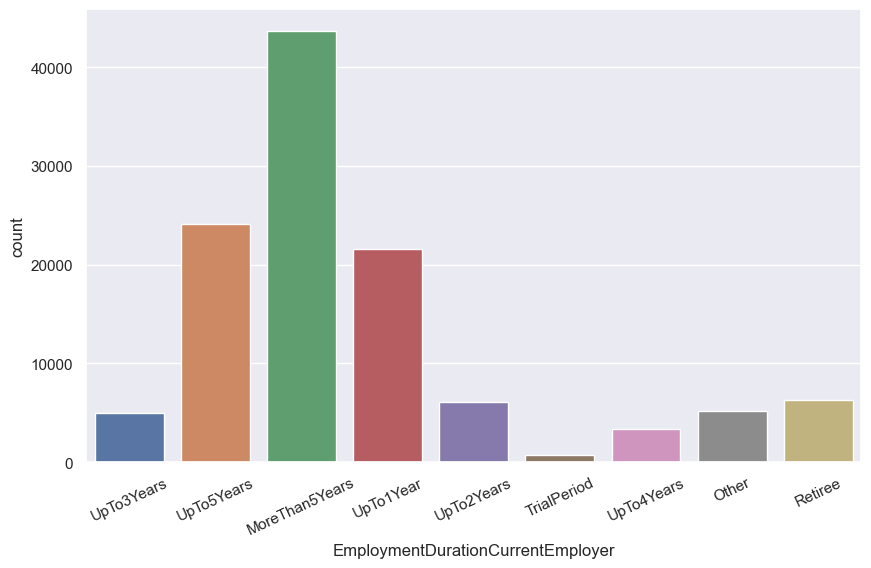

In [220]:
sns.set(rc={'figure.figsize':(10,6)})


ax = sns.countplot(x = data['EmploymentDurationCurrentEmployer']) 

sns.set(rc={'figure.figsize':(10,6)})
ax.set_xticklabels(ax.get_xticklabels(), rotation = 25)

##### Imputing HomeOwnershipType 

In [221]:
data['HomeOwnershipType'].isna().sum()

1652

In [222]:
data['HomeOwnershipType'].value_counts() 

Owner                             38711
Tenant, pre-furnished property    26719
Living with parents               18735
Mortgage                          12889
Other                              6597
Tenant, unfurnished property       4362
Joint ownership                    2985
Joint tenant                       1507
Council house                      1205
Owner with encumbrance              641
Homeless                             46
-1.0                                  3
Name: HomeOwnershipType, dtype: int64

In [223]:
data['HomeOwnershipType'] = data['HomeOwnershipType'].replace(-1.0, "Owner")

In [224]:
data['HomeOwnershipType'] = data['HomeOwnershipType'].fillna("Other")

In [225]:
data['HomeOwnershipType'].isna().sum() 

0

In [226]:
data['HomeOwnershipType'].value_counts() 

Owner                             38714
Tenant, pre-furnished property    26719
Living with parents               18735
Mortgage                          12889
Other                              8249
Tenant, unfurnished property       4362
Joint ownership                    2985
Joint tenant                       1507
Council house                      1205
Owner with encumbrance              641
Homeless                             46
Name: HomeOwnershipType, dtype: int64

[Text(0, 0, 'UpTo3Years'),
 Text(1, 0, 'UpTo5Years'),
 Text(2, 0, 'MoreThan5Years'),
 Text(3, 0, 'UpTo1Year'),
 Text(4, 0, 'UpTo2Years'),
 Text(5, 0, 'TrialPeriod'),
 Text(6, 0, 'UpTo4Years'),
 Text(7, 0, 'Other'),
 Text(8, 0, 'Retiree')]

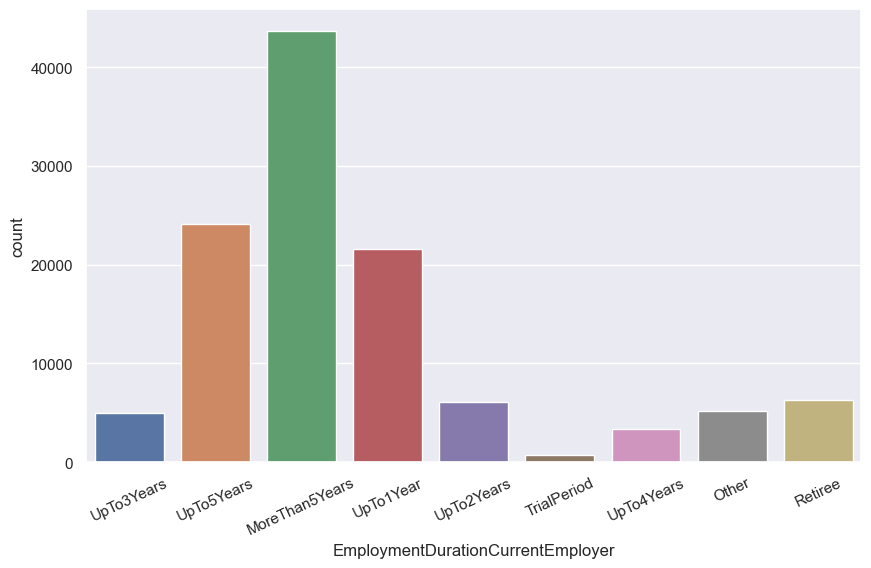

In [227]:
sns.set(rc={'figure.figsize':(10,6)})


ax = sns.countplot(x = data['EmploymentDurationCurrentEmployer']) 

sns.set(rc={'figure.figsize':(10,6)})
ax.set_xticklabels(ax.get_xticklabels(), rotation = 25)

##### Imputing EAD1, EAD2

In [228]:
data['EAD1'] = data['EAD1'].fillna(0.0)

In [229]:
data['EAD2'] = data['EAD2'].fillna(0.0)

In [230]:
# Removing ProbabilityOfDefault as the ProbabilityOfDefault column itself is an estimated value which may not be exact value

In [231]:
data = data.drop(columns = 'ProbabilityOfDefault', axis = 1)

In [232]:
#data[data['ExpectedLoss'].isna()][['IsDefault']].value_counts()'ExpectedLoss', 'LossGivenDefault', 'ExpectedReturn', 'ProbabilityOfDefault', 'IsDefault', 

##### Imputing Rating

In [233]:
data['Rating'].isna().sum() 

2729

In [234]:
data['Rating'].value_counts()   

F     22476
E     22393
D     19445
C     16386
HR    14394
B     10673
A      4325
AA     3231
Name: Rating, dtype: int64

In [235]:
data['Rating'] = data['Rating'].fillna('E') 
#This step can be removed and the following values can be dropped off incase 
#the model is not performing well.

[Text(0, 0, 'A'),
 Text(1, 0, 'F'),
 Text(2, 0, 'C'),
 Text(3, 0, 'HR'),
 Text(4, 0, 'D'),
 Text(5, 0, 'E'),
 Text(6, 0, 'B'),
 Text(7, 0, 'AA')]

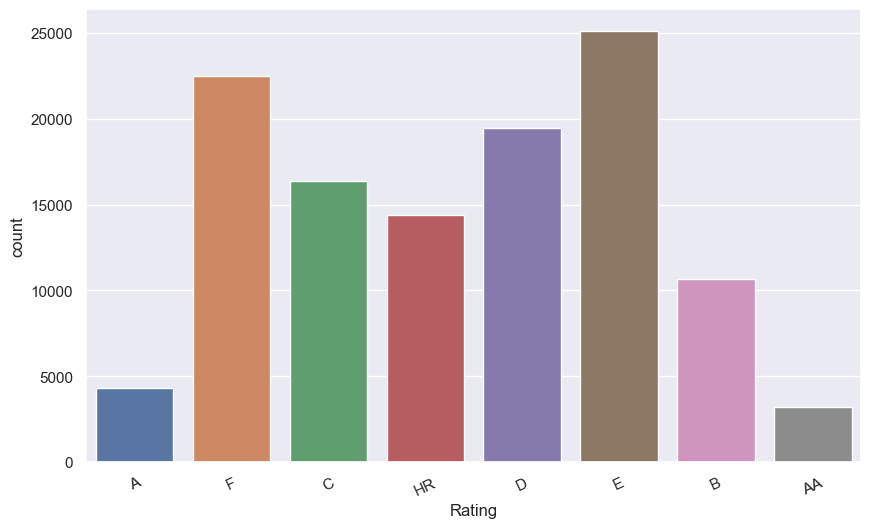

In [236]:
sns.set(rc={'figure.figsize':(10,6)})


ax = sns.countplot(x = data['Rating']) 

sns.set(rc={'figure.figsize':(10,6)})
ax.set_xticklabels(ax.get_xticklabels(), rotation = 25)

##### Dropping DebtOccuredOn and DebtOccuredOnForSecondary

In [237]:
data = data.drop(columns = 'DebtOccuredOn', axis = 1)  

In [238]:
data = data.drop(columns = 'DebtOccuredOnForSecondary', axis = 1) 

##### Imputing PlannedInterestTillDate 

In [239]:
data['PlannedInterestTillDate'].value_counts()  

530.00     6768
0.00       2016
2125.00    1697
531.00     1612
1060.00    1083
           ... 
390.96        1
994.12        1
209.30        1
1564.16       1
142.50        1
Name: PlannedInterestTillDate, Length: 56855, dtype: int64

In [240]:
data['PlannedInterestTillDate'].isna().sum()  

1

In [241]:
data['PlannedInterestTillDate'] = data['PlannedInterestTillDate'].fillna(0.00)

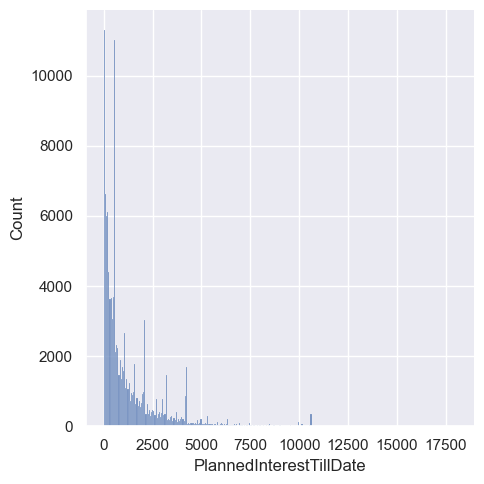

In [242]:
sns.displot(data['PlannedInterestTillDate']) 

##### Imputing MonthlyPayment 

In [243]:
data['MonthlyPayment'].value_counts()  

0.00      3553
237.84    2164
113.31    1853
138.34    1531
184.45    1269
          ... 
203.67       1
126.72       1
203.33       1
337.08       1
137.90       1
Name: MonthlyPayment, Length: 24322, dtype: int64

In [244]:
data[data['MonthlyPayment']==0.0][['Status']].value_counts()  

Status
Late      2111
Repaid    1442
dtype: int64

In [245]:
data['MonthlyPayment'].mean() 

123.20652004203829

In [246]:
data['MonthlyPayment'].isna().sum()  

6657

In [247]:
data['MonthlyPayment'] = data['MonthlyPayment'].fillna(data['MonthlyPayment'].mean())

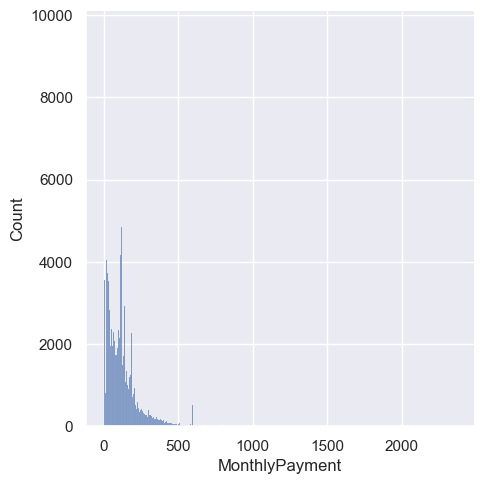

In [248]:
sns.set(rc={'figure.figsize':(2,10)})
sns.displot(data['MonthlyPayment'])  

In [249]:
data = data.drop(columns='LastPaymentOn', axis = 1)

In [250]:
data['PreviousRepaymentsBeforeLoan'].value_counts()   

0.0000        29514
4287.1500        22
2030.0500        19
31.8000          19
531.0500         17
              ...  
244.4700          1
3956.6500         1
11757.4000        1
12298.1195        1
482.6800          1
Name: PreviousRepaymentsBeforeLoan, Length: 40686, dtype: int64

In [251]:
data['PreviousRepaymentsBeforeLoan'] = data['PreviousRepaymentsBeforeLoan'].fillna(0.00)

In [252]:
data['PrincipalOverdueBySchedule'].value_counts()   

0.00       35360
530.00       777
529.00       109
210.07       108
26.64        102
           ...  
621.52         1
95.84          1
1451.28        1
114.67         1
852.23         1
Name: PrincipalOverdueBySchedule, Length: 45567, dtype: int64

In [253]:
data['PrincipalOverdueBySchedule'].mean() 

495.7845533043668

In [254]:
data['PrincipalOverdueBySchedule'] = data['PrincipalOverdueBySchedule'].fillna(0.00) 

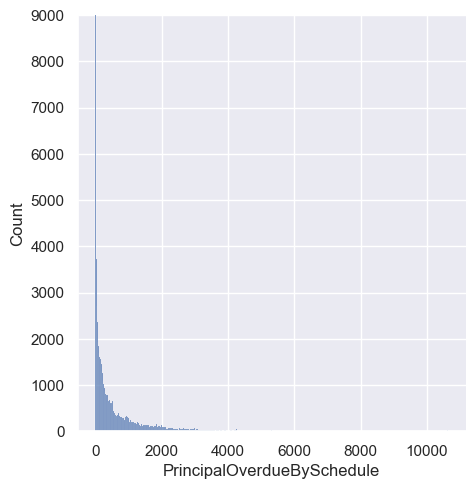

In [255]:
ax = sns.displot(data['PrincipalOverdueBySchedule'])  
  
ax.set(ylim=(0, 9000))

In [256]:
data['PrincipalOverdueBySchedule'].mean() 

432.39955849706587

In [257]:
data['WorseLateCategory'].value_counts() 

180+       63140
1-7         9936
31-60       5928
16-30       4293
8-15        3171
61-90       2920
91-120      1965
151-180     1625
121-150     1526
Name: WorseLateCategory, dtype: int64

In [258]:
data['WorseLateCategory'] = data['WorseLateCategory'].fillna('180+') 

In [259]:
data['WorseLateCategory'].value_counts() 

180+       84688
1-7         9936
31-60       5928
16-30       4293
8-15        3171
61-90       2920
91-120      1965
151-180     1625
121-150     1526
Name: WorseLateCategory, dtype: int64

In [260]:
data['WorseLateCategory'].isna().sum()  

0

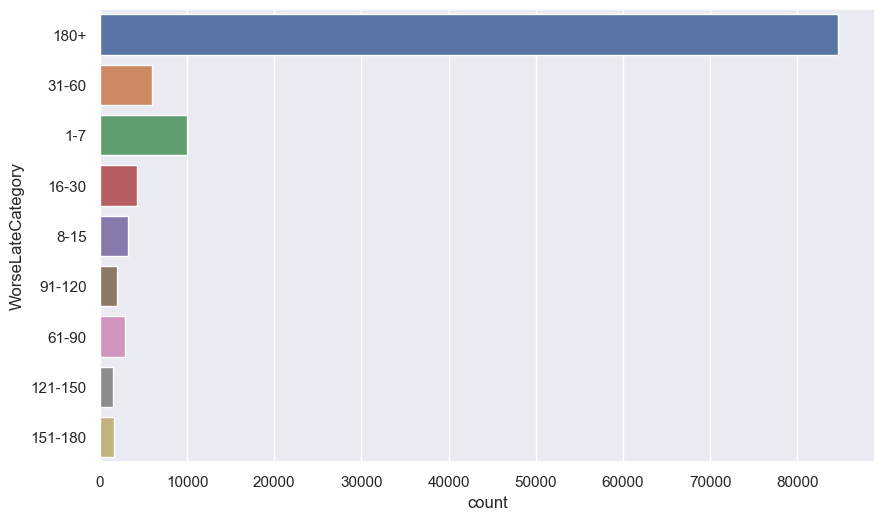

In [261]:
sns.set(rc={'figure.figsize':(10,6)})


ax = sns.countplot(y = data['WorseLateCategory']) 

sns.set(rc={'figure.figsize':(10,6)})
#ax.set_xticklabels(ax.get_xticklabels(), rotation = 25)

In [262]:
data['RecoveryStage'].value_counts()  

2.0    54657
1.0    25420
Name: RecoveryStage, dtype: int64

In [263]:
data[data['RecoveryStage'].isna()][['IsDefault']].value_counts() 

IsDefault    
Non-Defaulter    27338
Defaulter         8637
dtype: int64

In [264]:
data[data['IsDefault']==1.0][['RecoveryStage']].value_counts() 

Series([], dtype: int64)

In [265]:
data = data.drop(columns = 'RecoveryStage', axis = 1) 

In [266]:
data = data.drop(columns = 'StageActiveSince', axis = 1)

In [267]:
data['ActiveLateCategory'].value_counts()  

180+       60945
1-7         2096
16-30       1846
31-60       1843
8-15        1499
151-180     1415
91-120      1287
61-90       1273
121-150     1218
Name: ActiveLateCategory, dtype: int64

In [268]:
data['ActiveLateCategory'] = data['ActiveLateCategory'].fillna('180+')

In [269]:
data['ActiveLateCategory'].value_counts()  

180+       103575
1-7          2096
16-30        1846
31-60        1843
8-15         1499
151-180      1415
91-120       1287
61-90        1273
121-150      1218
Name: ActiveLateCategory, dtype: int64

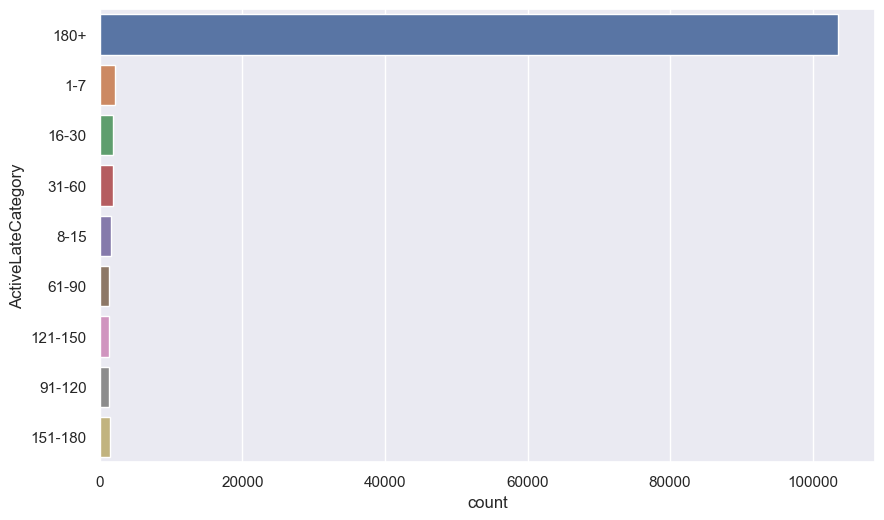

In [270]:
sns.set(rc={'figure.figsize':(10,6)})

ax = sns.countplot(y = data['ActiveLateCategory']) 

sns.set(rc={'figure.figsize':(10,6)})
#ax.set_xticklabels(ax.get_xticklabels(), rotation = 25)

In [271]:
data['CreditScoreEeMini'].value_counts()  

1000.0    42796
800.0      4910
900.0      4056
600.0      2331
700.0      2170
500.0        56
0.0           1
Name: CreditScoreEeMini, dtype: int64

In [272]:
data['CreditScoreEeMini'].isna().sum()  

59732

In [273]:
data['CreditScoreEeMini'] = data['CreditScoreEeMini'].fillna(1000.0)

In [274]:
data['CreditScoreEeMini'].isna().sum()  

0

In [275]:
data['CreditScoreEeMini'] = data['CreditScoreEeMini'].replace(0.0, 1000.0)

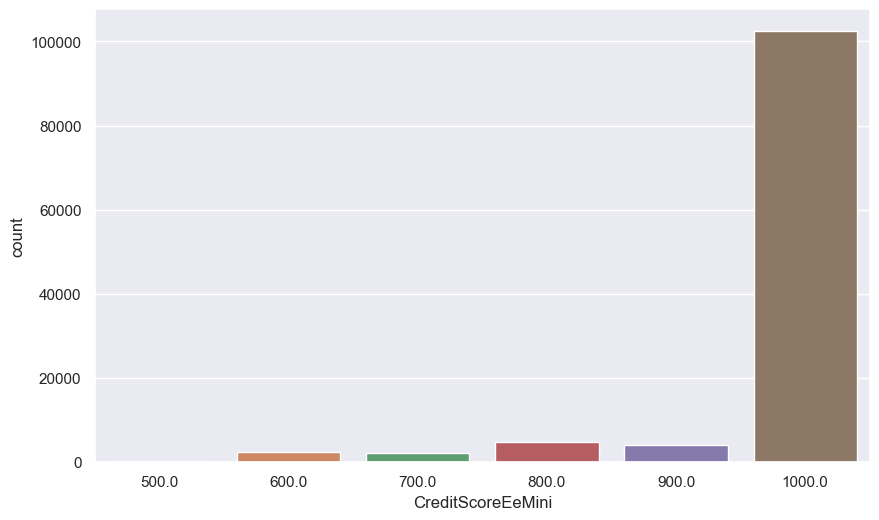

In [276]:
sns.set(rc={'figure.figsize':(10,6)})

ax = sns.countplot(x = data['CreditScoreEeMini']) 

sns.set(rc={'figure.figsize':(10,6)})
#ax.set_xticklabels(ax.get_xticklabels(), rotation = 25)

In [277]:
data['ActiveLateLastPaymentCategory'].value_counts()   

180+       42202
16-30       7099
31-60       5976
8-15        5762
1-7         4619
61-90       3019
91-120      2214
151-180     2117
121-150     2094
Name: ActiveLateLastPaymentCategory, dtype: int64

In [278]:
data['ActiveLateLastPaymentCategory'].isna().sum()  

40950

In [279]:
data['ActiveLateLastPaymentCategory'] = data['ActiveLateLastPaymentCategory'].fillna('180+')

In [280]:
data['ActiveLateLastPaymentCategory'].value_counts()   

180+       83152
16-30       7099
31-60       5976
8-15        5762
1-7         4619
61-90       3019
91-120      2214
151-180     2117
121-150     2094
Name: ActiveLateLastPaymentCategory, dtype: int64

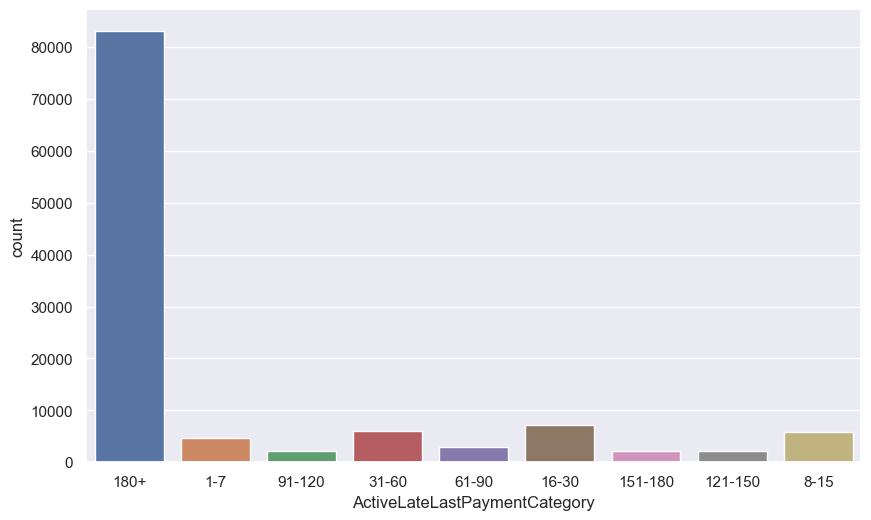

In [281]:
sns.set(rc={'figure.figsize':(10,6)})

ax = sns.countplot(x = data['ActiveLateLastPaymentCategory']) 

sns.set(rc={'figure.figsize':(10,6)})
#ax.set_xticklabels(ax.get_xticklabels(), rotation = 25)

In [282]:
data['CurrentDebtDaysPrimary'].value_counts() 

3.0       1342
543.0      605
4.0        585
18.0       553
11.0       481
          ... 
4035.0       1
2633.0       1
2501.0       1
4245.0       1
1955.0       1
Name: CurrentDebtDaysPrimary, Length: 1827, dtype: int64

In [283]:
data['CurrentDebtDaysPrimary'].min()  

0.0

In [284]:
data['CurrentDebtDaysPrimary'] = data['CurrentDebtDaysPrimary'].fillna(0.0)

In [285]:
data['CurrentDebtDaysSecondary'].value_counts() 

3.0       1145
543.0      568
4.0        461
361.0      459
18.0       446
          ... 
3468.0       1
3556.0       1
2474.0       1
2143.0       1
898.0        1
Name: CurrentDebtDaysSecondary, Length: 1850, dtype: int64

In [286]:
data['CurrentDebtDaysSecondary'] = data['CurrentDebtDaysSecondary'].fillna(0.0)

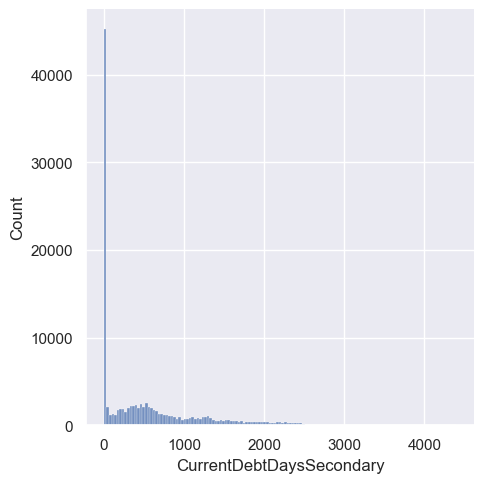

In [287]:
sns.displot(data['CurrentDebtDaysSecondary'])  

In [288]:
# data['NextPaymentNr'].value_counts()   

In [289]:
data = data.drop(columns = 'NextPaymentNr', axis = 1) 

In [290]:
data['NrOfScheduledPayments'].value_counts()  

60.0    33714
36.0     7177
48.0     3407
54.0     1678
51.0     1673
59.0      616
58.0      585
24.0      346
39.0      338
57.0      335
56.0      315
55.0      244
42.0      223
53.0      209
30.0      200
27.0      181
52.0      167
50.0      150
35.0      145
38.0      139
37.0      126
34.0      124
49.0      121
31.0       96
46.0       94
33.0       88
47.0       85
32.0       77
18.0       71
29.0       70
12.0       67
45.0       67
43.0       61
41.0       59
44.0       57
15.0       56
28.0       51
40.0       49
25.0       40
22.0       35
23.0       31
20.0       30
9.0        28
26.0       26
21.0       26
6.0        19
19.0       19
61.0       13
3.0        12
17.0        9
16.0        7
13.0        6
11.0        5
10.0        4
14.0        4
8.0         3
5.0         1
7.0         1
Name: NrOfScheduledPayments, dtype: int64

In [291]:
data['NrOfScheduledPayments'].isna().sum() 

62472

In [292]:
data['NrOfScheduledPayments'] = data['NrOfScheduledPayments'].fillna(60.0)  

In [293]:
data['NrOfScheduledPayments'].value_counts()   

60.0    96186
36.0     7177
48.0     3407
54.0     1678
51.0     1673
59.0      616
58.0      585
24.0      346
39.0      338
57.0      335
56.0      315
55.0      244
42.0      223
53.0      209
30.0      200
27.0      181
52.0      167
50.0      150
35.0      145
38.0      139
37.0      126
34.0      124
49.0      121
31.0       96
46.0       94
33.0       88
47.0       85
32.0       77
18.0       71
29.0       70
12.0       67
45.0       67
43.0       61
41.0       59
44.0       57
15.0       56
28.0       51
40.0       49
25.0       40
22.0       35
23.0       31
20.0       30
9.0        28
26.0       26
21.0       26
6.0        19
19.0       19
61.0       13
3.0        12
17.0        9
16.0        7
13.0        6
11.0        5
10.0        4
14.0        4
8.0         3
5.0         1
7.0         1
Name: NrOfScheduledPayments, dtype: int64

[Text(0, 0, '3.0'),
 Text(1, 0, '5.0'),
 Text(2, 0, '6.0'),
 Text(3, 0, '7.0'),
 Text(4, 0, '8.0'),
 Text(5, 0, '9.0'),
 Text(6, 0, '10.0'),
 Text(7, 0, '11.0'),
 Text(8, 0, '12.0'),
 Text(9, 0, '13.0'),
 Text(10, 0, '14.0'),
 Text(11, 0, '15.0'),
 Text(12, 0, '16.0'),
 Text(13, 0, '17.0'),
 Text(14, 0, '18.0'),
 Text(15, 0, '19.0'),
 Text(16, 0, '20.0'),
 Text(17, 0, '21.0'),
 Text(18, 0, '22.0'),
 Text(19, 0, '23.0'),
 Text(20, 0, '24.0'),
 Text(21, 0, '25.0'),
 Text(22, 0, '26.0'),
 Text(23, 0, '27.0'),
 Text(24, 0, '28.0'),
 Text(25, 0, '29.0'),
 Text(26, 0, '30.0'),
 Text(27, 0, '31.0'),
 Text(28, 0, '32.0'),
 Text(29, 0, '33.0'),
 Text(30, 0, '34.0'),
 Text(31, 0, '35.0'),
 Text(32, 0, '36.0'),
 Text(33, 0, '37.0'),
 Text(34, 0, '38.0'),
 Text(35, 0, '39.0'),
 Text(36, 0, '40.0'),
 Text(37, 0, '41.0'),
 Text(38, 0, '42.0'),
 Text(39, 0, '43.0'),
 Text(40, 0, '44.0'),
 Text(41, 0, '45.0'),
 Text(42, 0, '46.0'),
 Text(43, 0, '47.0'),
 Text(44, 0, '48.0'),
 Text(45, 0, '49.0'),
 Tex

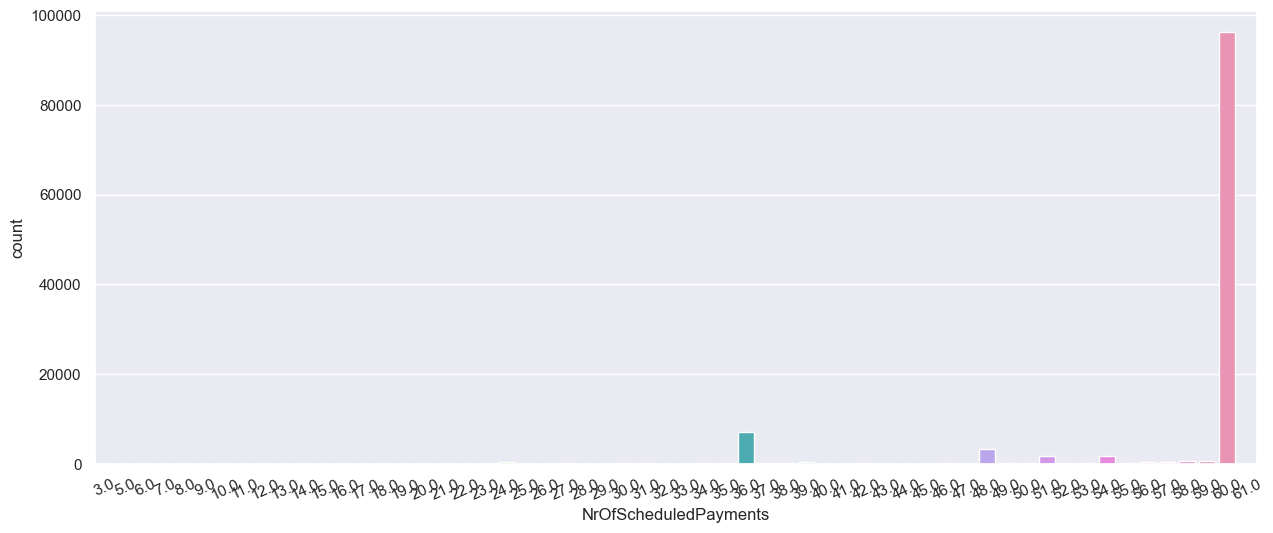

In [294]:
#sns.countplot(data['NrOfScheduledPayments'])  

sns.set(rc={'figure.figsize':(15,6)})

ax = sns.countplot(x = data['NrOfScheduledPayments']) 

sns.set(rc={'figure.figsize':(15,6)})
ax.set_xticklabels(ax.get_xticklabels(), rotation = 25)

In [295]:
data['ExpectedLoss'].value_counts()   

0.150000    6102
0.242647    4430
0.248401    2313
0.249394    2007
0.530223     795
            ... 
0.117119       1
0.146070       1
0.023442       1
0.044838       1
0.102703       1
Name: ExpectedLoss, Length: 39589, dtype: int64

In [296]:
data['ExpectedLoss'].mean()   

0.1613253748514117

In [297]:
data['ExpectedLoss'] = data['ExpectedLoss'].fillna(data['ExpectedLoss'].mean() )

In [298]:
data['LossGivenDefault'].value_counts() 

0.000000    36877
0.580000     9328
0.650000     9268
0.900000     7864
0.681751     4466
            ...  
0.518686        1
0.541979        1
0.514358        1
0.545515        1
0.523623        1
Name: LossGivenDefault, Length: 1374, dtype: int64

In [299]:
data['LossGivenDefault'] = data['LossGivenDefault'].fillna(0.000000)

In [300]:
data['ExpectedReturn'].value_counts() 

0.141000    6033
0.187807    4430
0.188868    2313
0.202026    2007
0.206463    1068
            ... 
0.137624       1
0.111025       1
0.170407       1
0.102239       1
0.115309       1
Name: ExpectedReturn, Length: 45576, dtype: int64

In [301]:
data['ExpectedReturn'].mean()  

0.14137719448035865

In [302]:
data['ExpectedReturn'] = data['ExpectedReturn'].fillna(data['ExpectedReturn'].mean())

In [303]:
data.isna().sum()

ListedOnUTC                               0
BiddingStartedOn                          0
BidsPortfolioManager                      0
BidsApi                                   0
BidsManual                                0
                                         ..
PreviousRepaymentsBeforeLoan              0
PreviousEarlyRepaymentsCountBeforeLoan    0
NrOfScheduledPayments                     0
ActiveLateLastPaymentCategory             0
IsDefault                                 0
Length: 76, dtype: int64

In [304]:
# for item in data.columns:
#     print(item + "--"*25 + str(data[item].isna().sum()))

In [305]:
data.shape

(116052, 76)

In [306]:
# for item in data.columns:
#     print(item)

In [307]:
#sns.set(rc={'figure.figsize':(50,50)})

In [308]:
#sns.heatmap(data.corr(), annot = True)

##### Dropping the variables with high correlation between them

In [309]:
# From the above heatmap, it is evident that the following features are highly correlated:
# EAD1 and EAD2 ---> 0.95. Drop EAD1
# PrincipalOverdueBySchedule and PlannedPrincipalPostDefault ---> 0.85
# CurrentDebtDaysPrimary and CurrentDebtDaysSecondary ---> 0.93 
#
#


In [310]:
data['CurrentDebtDaysPrimary'].value_counts()  

0.0       42630
3.0        1342
543.0       605
4.0         585
18.0        553
          ...  
2513.0        1
2909.0        1
310.0         1
3980.0        1
1955.0        1
Name: CurrentDebtDaysPrimary, Length: 1827, dtype: int64

In [311]:
data['CurrentDebtDaysSecondary'].value_counts()   

0.0       40950
3.0        1145
543.0       568
4.0         461
361.0       459
          ...  
3623.0        1
2821.0        1
2829.0        1
2725.0        1
2977.0        1
Name: CurrentDebtDaysSecondary, Length: 1851, dtype: int64

In [312]:
data = data.drop(columns = ['EAD1', 'PlannedPrincipalPostDefault', 'CurrentDebtDaysSecondary'], axis=1)

In [313]:
#sns.heatmap(data.corr(), annot=True)    

In [314]:
# for item in data.columns:
#     print(item + "--"*20 + str(data[item].dtypes))

In [315]:
data.isnull().sum() 



ListedOnUTC                               0
BiddingStartedOn                          0
BidsPortfolioManager                      0
BidsApi                                   0
BidsManual                                0
                                         ..
PreviousRepaymentsBeforeLoan              0
PreviousEarlyRepaymentsCountBeforeLoan    0
NrOfScheduledPayments                     0
ActiveLateLastPaymentCategory             0
IsDefault                                 0
Length: 73, dtype: int64

In [316]:
data.isna().sum() 

ListedOnUTC                               0
BiddingStartedOn                          0
BidsPortfolioManager                      0
BidsApi                                   0
BidsManual                                0
                                         ..
PreviousRepaymentsBeforeLoan              0
PreviousEarlyRepaymentsCountBeforeLoan    0
NrOfScheduledPayments                     0
ActiveLateLastPaymentCategory             0
IsDefault                                 0
Length: 73, dtype: int64

In [317]:
# ListedOnUTC, BiddingStartedOn, BidsPortfolioManager, BidsApi, BidsManual, 

In [318]:
# for item in data.columns:
#     print(data[item].value_counts())
#     print("--"*20)

In [319]:
# data['UseOfLoan'] = data['UseOfLoan'].replace(-1,1)  
# data['OccupationArea'] = data['OccupationArea'].replace(-1.0, 1.0)
 

In [320]:

cats_cols = ['NewCreditCustomer', 'ApplicationSignedHour', 'ApplicationSignedWeekday', 'VerificationType', 
             'LanguageCode', 'Gender', 'Country', 'LoanDuration', 'UseOfLoan', 'Education', 'MaritalStatus', 
             'EmploymentStatus', 'EmploymentDurationCurrentEmployer', 'OccupationArea', 'HomeOwnershipType', 
             'ActiveScheduleFirstPaymentReached', 'Rating', 'Status', 'Restructured', 'ActiveLateCategory', 
             'WorseLateCategory', 'CreditScoreEeMini', 'PreviousEarlyRepaymentsCountBeforeLoan', 
             'ActiveLateLastPaymentCategory', 'MonthlyPaymentDay','IsDefault'] #Age needs to be binned in range of 5.

In [321]:
num_cols = ['BidsPortfolioManager', 'BidsApi', 'BidsManual', 'Amount', 'Interest', 'MonthlyPayment', 
            'IncomeFromPrincipalEmployer', 'IncomeFromPension', 'IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare', 
            'IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther', 'IncomeTotal', 'ExistingLiabilities', 
            'LiabilitiesTotal', 'RefinanceLiabilities', 'DebtToIncome', 'FreeCash', 'PlannedInterestTillDate', 
            'CurrentDebtDaysPrimary', 
            'ExpectedLoss', 'LossGivenDefault', 'ExpectedReturn', 'PrincipalOverdueBySchedule', 'PlannedInterestPostDefault', 
            'EAD2', 'PrincipalRecovery', 'InterestRecovery', 'PrincipalPaymentsMade', 'InterestAndPenaltyPaymentsMade', 
            'PrincipalWriteOffs', 'InterestAndPenaltyWriteOffs', 'PrincipalBalance', 'InterestAndPenaltyBalance', 
            'AmountOfPreviousLoansBeforeLoan', 'PreviousRepaymentsBeforeLoan', 'NrOfScheduledPayments']


In [322]:
#date_cols = ['BiddingStartedOn', 'LoanApplicationStartedDate', 'LoanDate', 'FirstPaymentDate', 'MaturityDate_Original',
             #'MaturityDate_Last', 'DefaultDate']
    
#date_cols = ['LoanDate', 'FirstPaymentDate', 'MaturityDate_Original',
             #'MaturityDate_Last', 'DefaultDate']
date_cols = ['LoanDate']

In [323]:
print(len(cats_cols), len(num_cols), len(date_cols))

26 38 1


In [324]:
data = data.drop(columns='ListedOnUTC', axis = 1) 

In [325]:
data = data.drop(columns=['LoanApplicationStartedDate', 'BiddingStartedOn'], axis = 1) 

In [326]:
# for age in range(0, 75):
#     print(age, data[data['Age']==age].shape)

We can observe that the data is having loan borrowers of age 0, 1, 2 which is not valid. 
Only borrowers 18 or above are given loan. Thus, we can filter out those entries where the age is 0, 1, 2...

In [327]:
data = data[data['Age']>17]

In [328]:
data.shape

(115999, 70)

In [329]:
interval_range = pd.interval_range(start=15, freq=5, end=80, closed = 'left')


In [330]:
interval_range

IntervalIndex([[15, 20), [20, 25), [25, 30), [30, 35), [35, 40) ... [55, 60), [60, 65), [65, 70), [70, 75), [75, 80)],
              closed='left',
              dtype='interval[int64]')

In [331]:
data['Age_range'] = pd.cut(data['Age'], bins=interval_range)
data[['Age', 'Age_range']]

Age Age_range
0        44  [40, 45)
1        42  [40, 45)
2        45  [45, 50)
3        31  [30, 35)
4        42  [40, 45)
...     ...       ...
168340   28  [25, 30)
168341   38  [35, 40)
168342   37  [35, 40)
168343   37  [35, 40)
168344   58  [55, 60)

[115999 rows x 2 columns]

In [332]:
data = data.drop(columns = 'Age', axis = 1)

[Text(0, 0, '[15, 20)'),
 Text(1, 0, '[20, 25)'),
 Text(2, 0, '[25, 30)'),
 Text(3, 0, '[30, 35)'),
 Text(4, 0, '[35, 40)'),
 Text(5, 0, '[40, 45)'),
 Text(6, 0, '[45, 50)'),
 Text(7, 0, '[50, 55)'),
 Text(8, 0, '[55, 60)'),
 Text(9, 0, '[60, 65)'),
 Text(10, 0, '[65, 70)'),
 Text(11, 0, '[70, 75)'),
 Text(12, 0, '[75, 80)')]

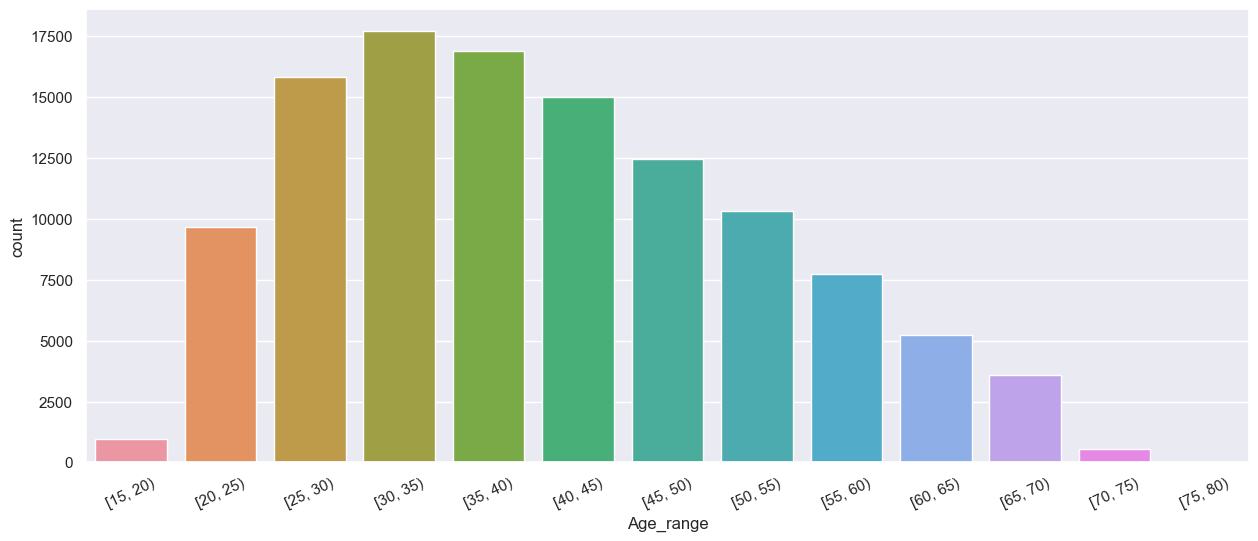

In [333]:



sns.set(rc={'figure.figsize':(15,6)})

ax = sns.countplot(x = data['Age_range']) 

sns.set(rc={'figure.figsize':(15,6)})
ax.set_xticklabels(ax.get_xticklabels(), rotation = 25)

In [334]:
cats_cols.append('Age_range')

In [335]:
data = data.drop(columns = ['FirstPaymentDate', 'MaturityDate_Original','MaturityDate_Last', 'DefaultDate'], axis=1)

In [336]:
data.shape 

(115999, 66)

In [337]:
data['IsDefault'].value_counts()  

Defaulter        68807
Non-Defaulter    47192
Name: IsDefault, dtype: int64

##### Extracting Day, Month and Year from LoanDate 

In [338]:
data['LoanDate'] = data['LoanDate'].astype('datetime64[ns]')

In [339]:
data['LoanYear'] = data['LoanDate'].dt.year
data['LoanMonth'] = data['LoanDate'].dt.month
data['LoanDay'] = data['LoanDate'].dt.day
data['LoanDayName'] = data['LoanDate'].dt.day_name()

data = data.drop(columns = 'LoanDate', axis = 1)

In [340]:
data.shape

(115999, 69)

In [341]:
# data.head(30) 

##### NUM_COLS

In [342]:
# num_cols

In [343]:
cats_cols.append('LoanYear')


In [344]:
cats_cols.append('LoanMonth')
cats_cols.append('LoanDay')
cats_cols.append('LoanDayName')

##### CATS COLS

In [345]:
# cats_cols

In [346]:
gc.collect() 

272

## Plotting of Features

In [347]:
cols_to_be_removed = ['PlannedInterestPostDefault', 'CurrentDebtDaysPrimary', 'LossGivenDefault', 
                      'InterestAndPenaltyWriteOffs', 'ExpectedLoss', 'ExpectedReturn',
                     'InterestAndPenaltyBalance', 'InterestAndPenaltyPaymentsMade', 'PrincipalRecovery', 'PrincipalWriteOffs',
                     'PrincipalOverdueBySchedule', 'InterestRecovery']

In [348]:
data = data.drop(columns = cols_to_be_removed, axis = 1)

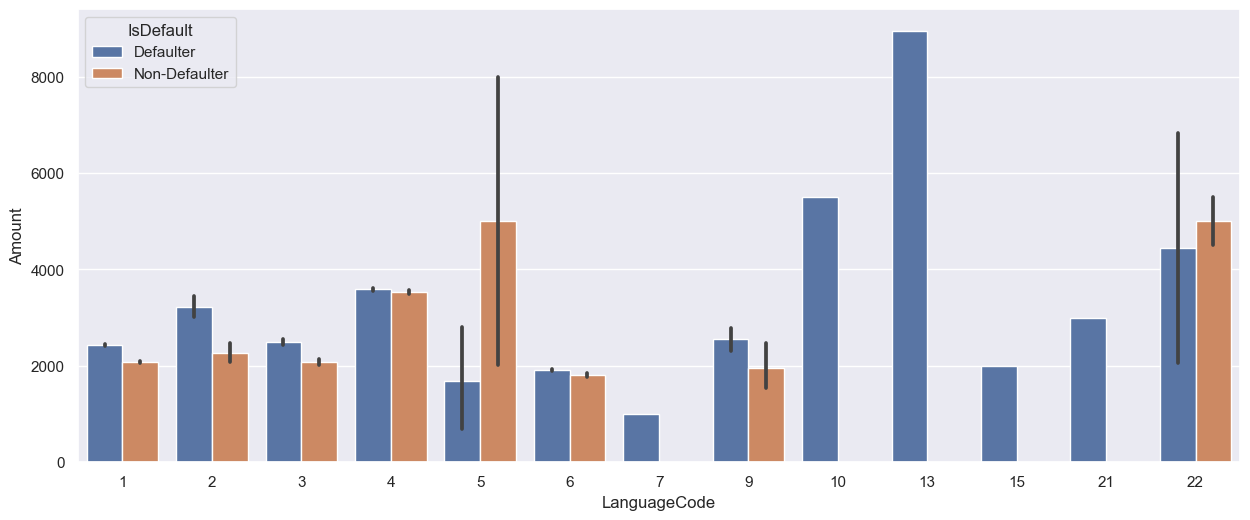

In [349]:
sns.set(rc={'figure.figsize':(15,6)})
ax = sns.barplot(x="LanguageCode", y="Amount", hue="IsDefault", data=data)

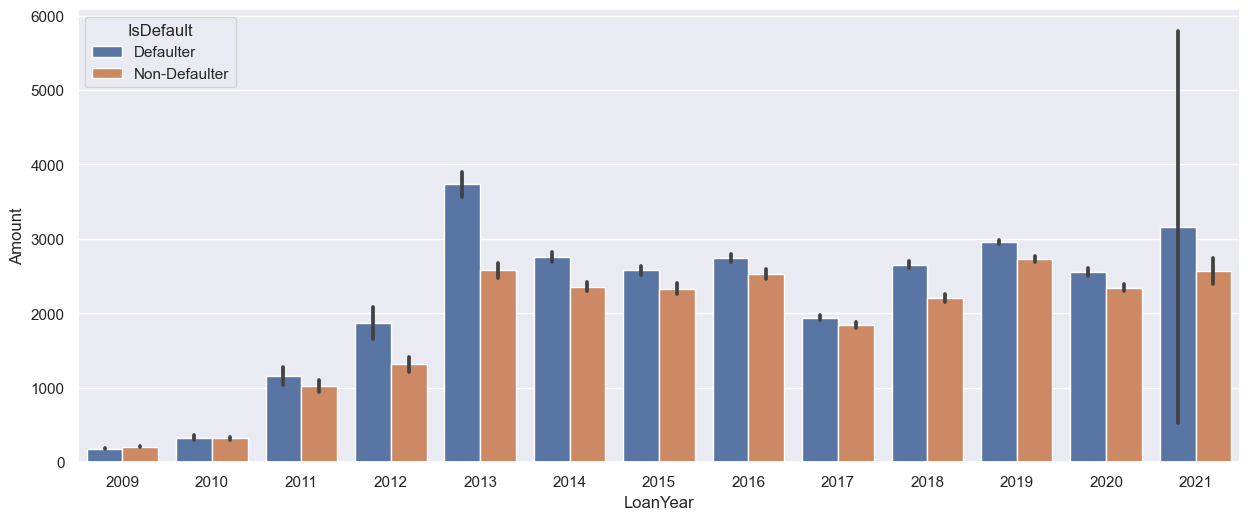

In [350]:
ax = sns.barplot(x="LoanYear", y="Amount", hue="IsDefault", data=data)

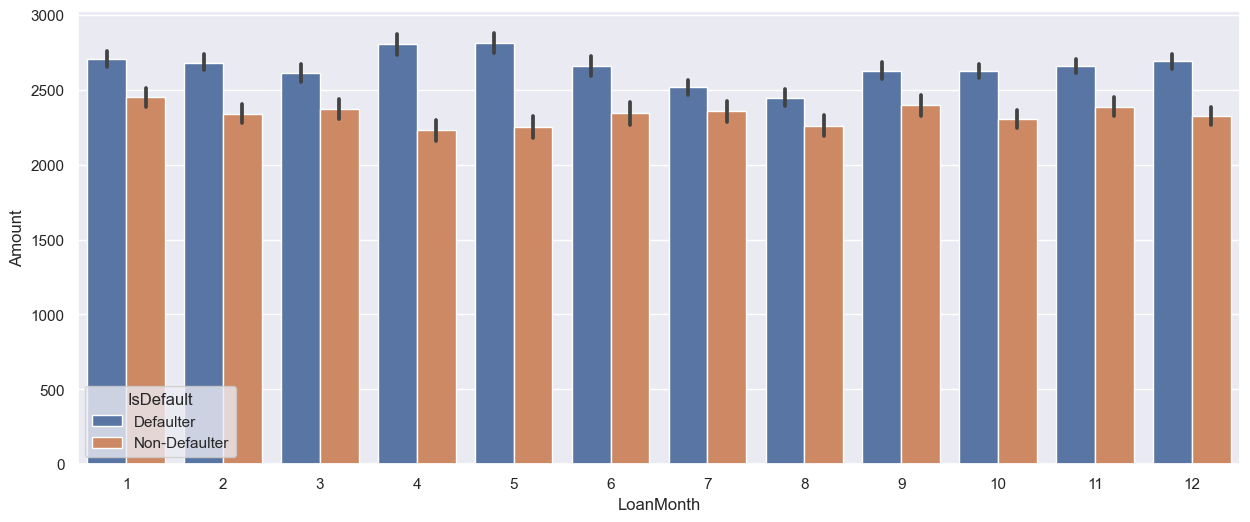

In [351]:
ax = sns.barplot(x="LoanMonth", y="Amount", hue="IsDefault", data=data)

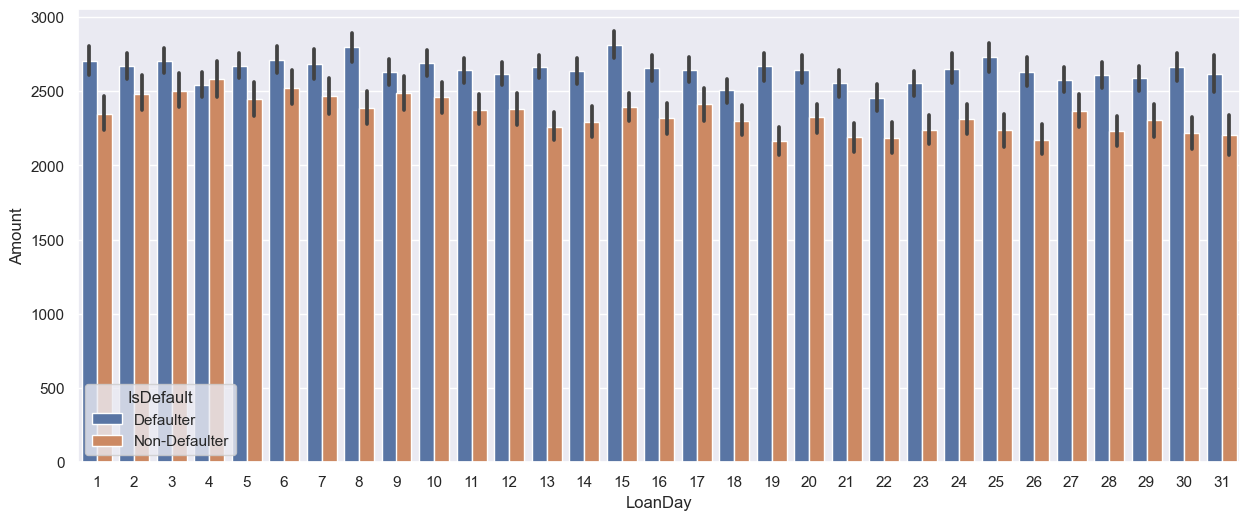

In [352]:
ax = sns.barplot(x="LoanDay", y="Amount", hue="IsDefault", data=data)

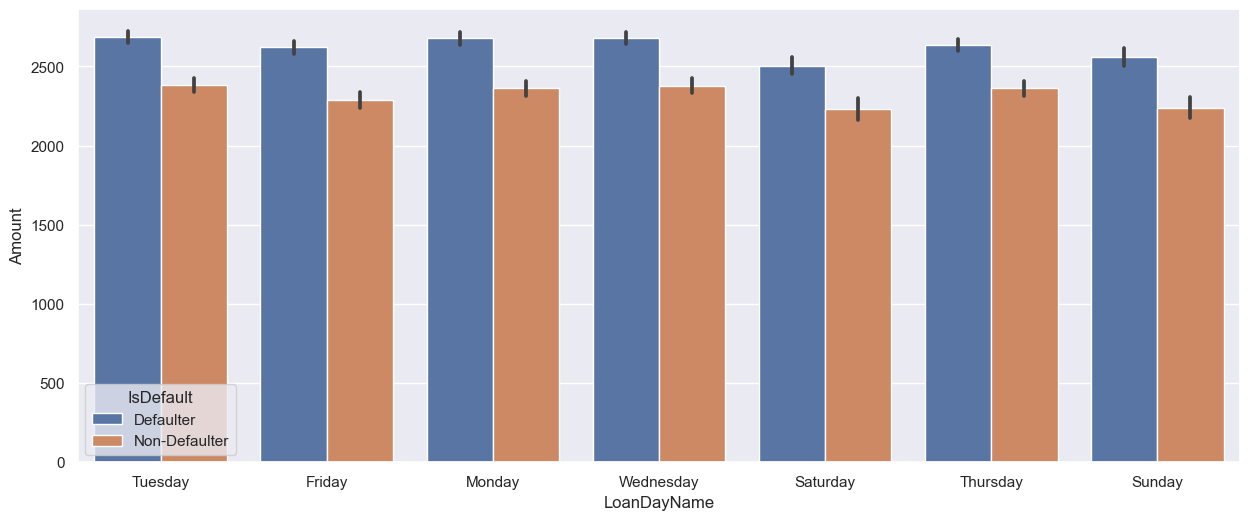

In [353]:
ax = sns.barplot(x="LoanDayName", y="Amount", hue="IsDefault", data=data)

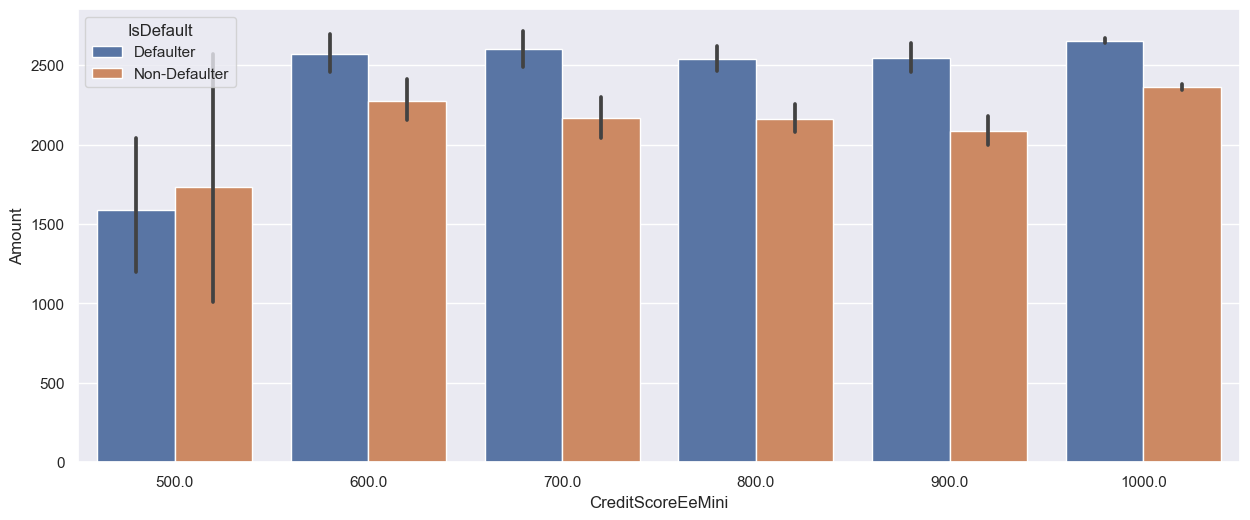

In [354]:
ax = sns.barplot(x="CreditScoreEeMini", y="Amount", hue="IsDefault", data=data)

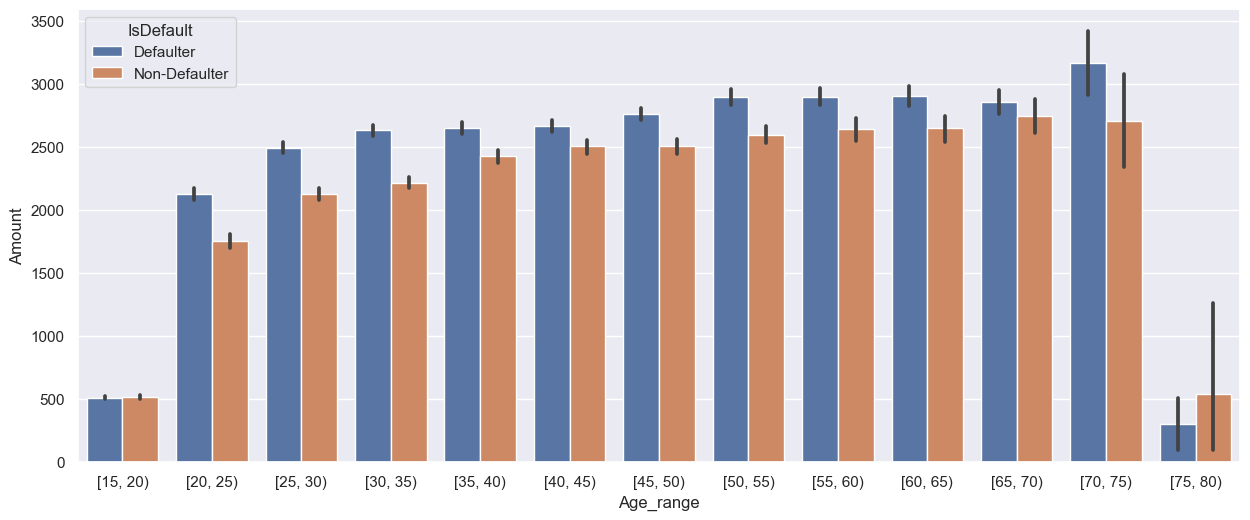

In [355]:
ax = sns.barplot(x="Age_range", y="Amount", hue="IsDefault", data=data)

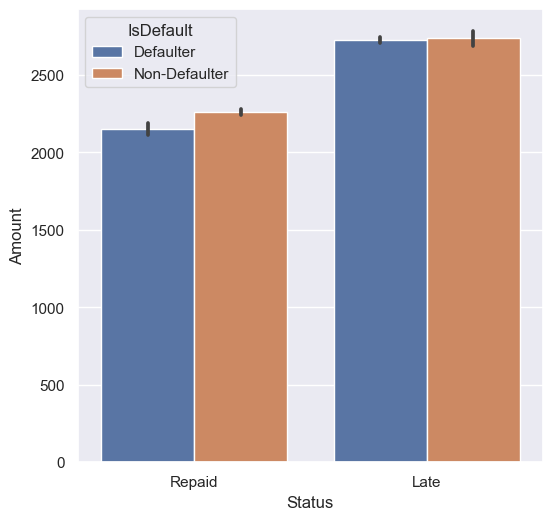

In [356]:
sns.set(rc = {'figure.figsize':(6,6)})
ax = sns.barplot(x="Status", y="Amount", hue="IsDefault", data=data)

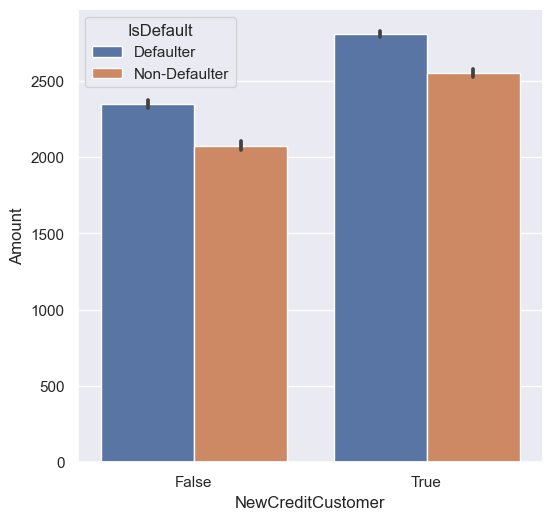

In [357]:
ax = sns.barplot(x="NewCreditCustomer", y="Amount", hue="IsDefault", data=data)

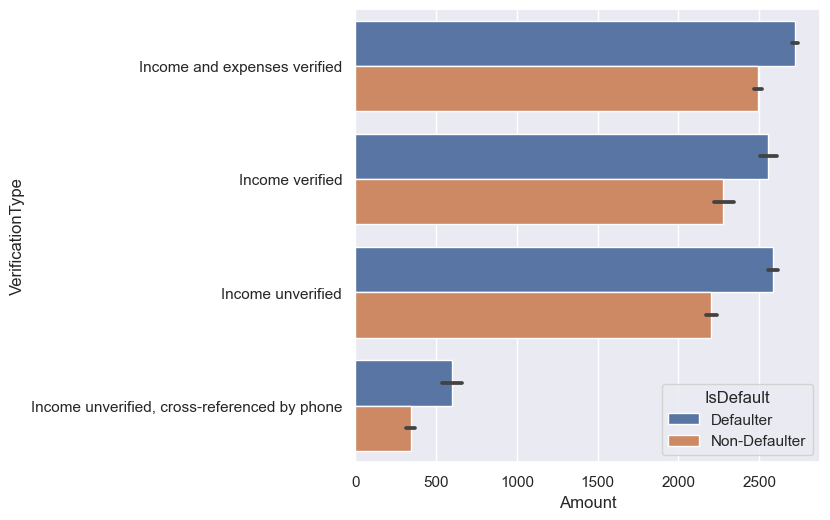

In [358]:
ax = sns.barplot(y="VerificationType", x="Amount", hue="IsDefault", data=data)

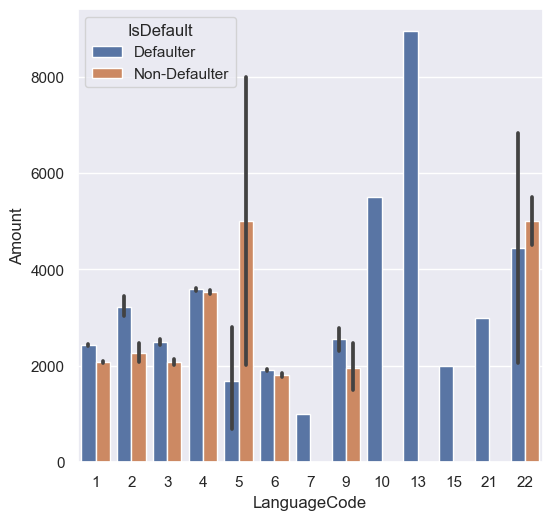

In [359]:
ax = sns.barplot(x="LanguageCode", y="Amount", hue="IsDefault", data=data)

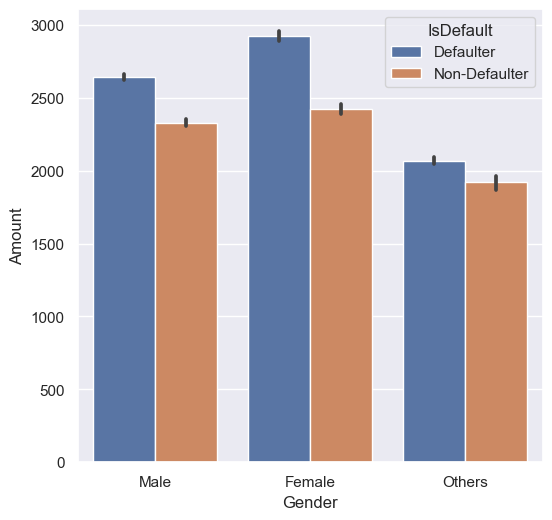

In [360]:
ax = sns.barplot(x="Gender", y="Amount", hue="IsDefault", data=data)

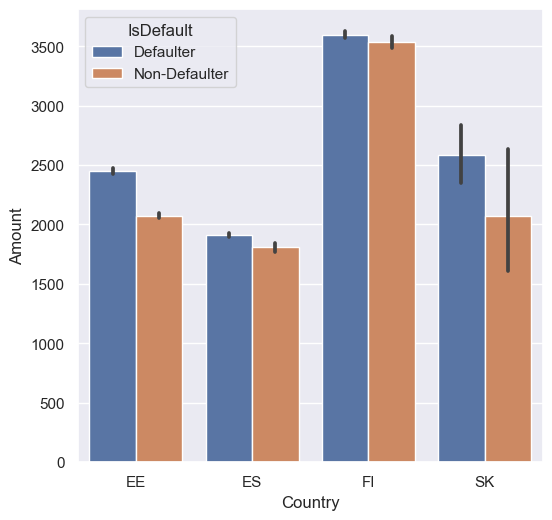

In [361]:
ax = sns.barplot(x="Country", y="Amount", hue="IsDefault", data=data)

In [362]:
gc.collect() 

31993

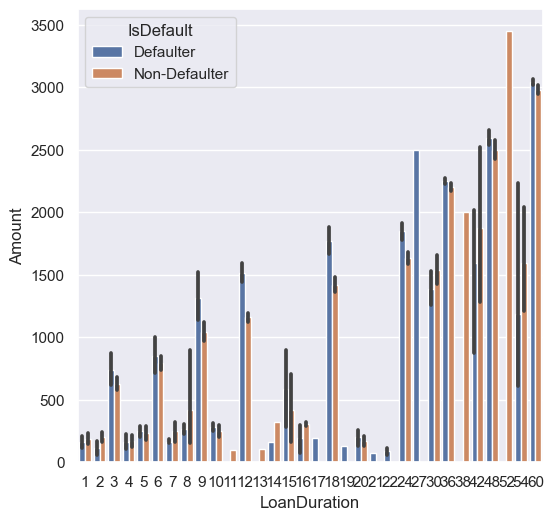

In [363]:
ax = sns.barplot(x="LoanDuration", y ="Amount", hue="IsDefault", data=data)

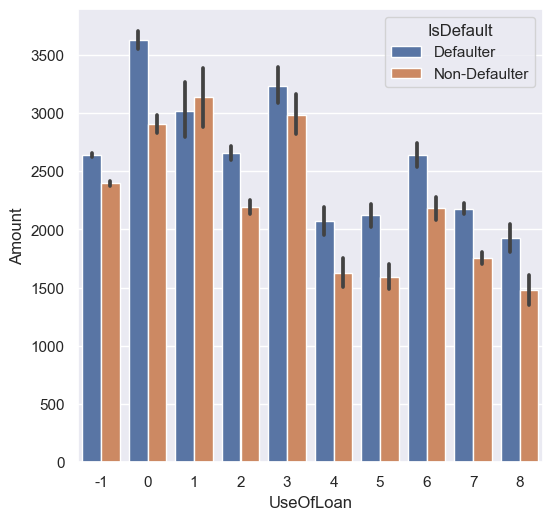

In [364]:
ax = sns.barplot(x="UseOfLoan", y="Amount", hue="IsDefault", data=data)

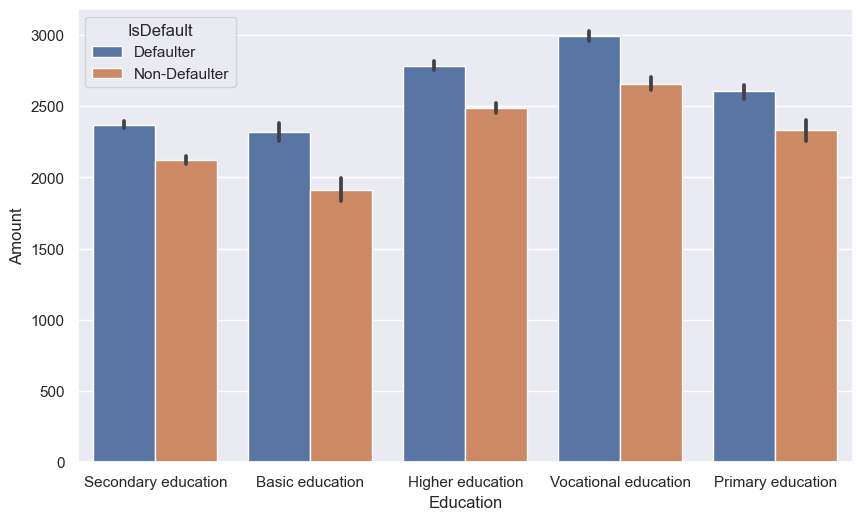

In [365]:
sns.set(rc = {'figure.figsize':(10, 6)})
ax = sns.barplot(x="Education", y="Amount", hue="IsDefault", data=data)

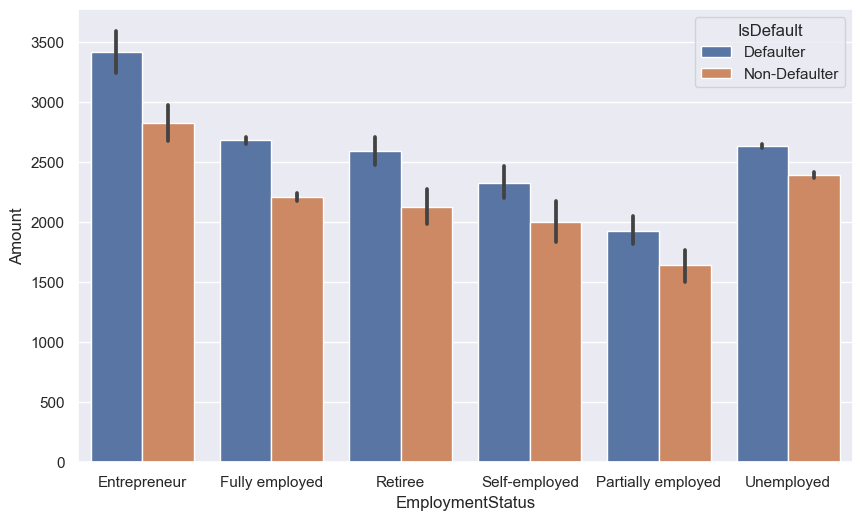

In [366]:
ax = sns.barplot(x="EmploymentStatus", y="Amount", hue="IsDefault", data=data)

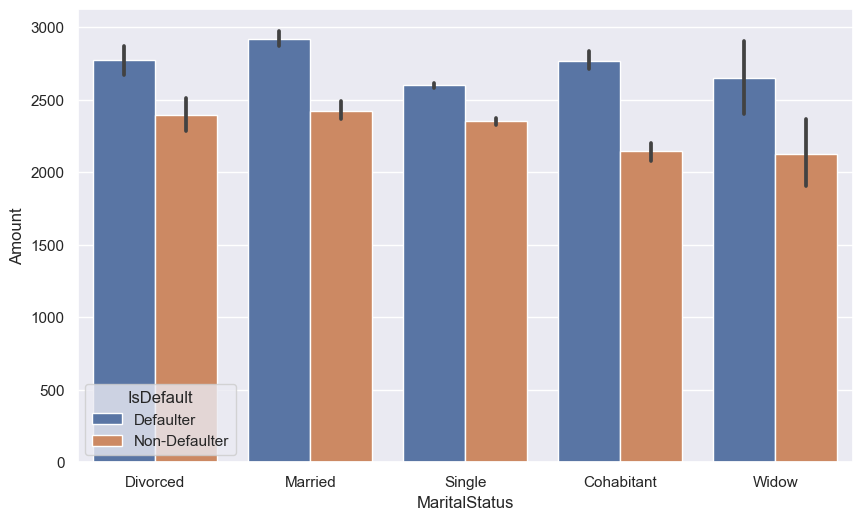

In [367]:
ax = sns.barplot(x="MaritalStatus", y="Amount", hue="IsDefault", data=data)

[Text(0, 0, 'UpTo3Years'),
 Text(1, 0, 'UpTo5Years'),
 Text(2, 0, 'MoreThan5Years'),
 Text(3, 0, 'UpTo1Year'),
 Text(4, 0, 'UpTo2Years'),
 Text(5, 0, 'TrialPeriod'),
 Text(6, 0, 'UpTo4Years'),
 Text(7, 0, 'Other'),
 Text(8, 0, 'Retiree')]

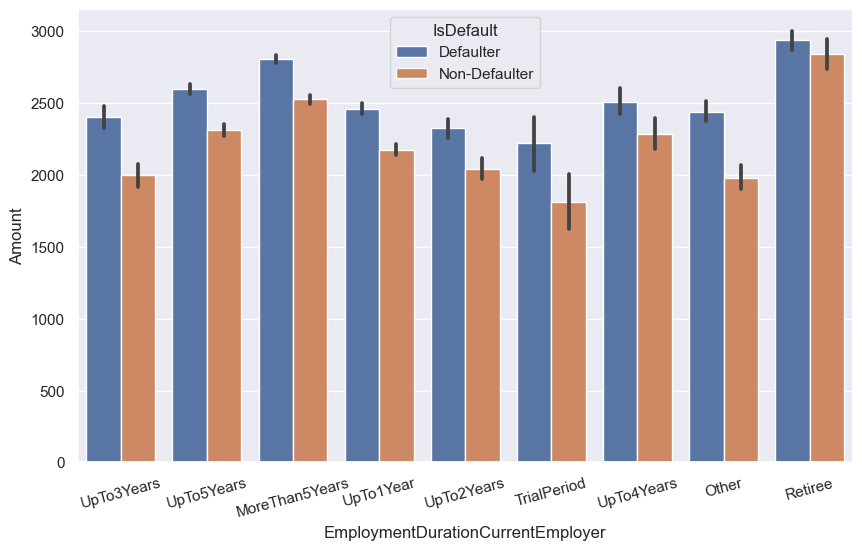

In [368]:
ax = sns.barplot(x="EmploymentDurationCurrentEmployer", y="Amount", hue="IsDefault", data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 15)

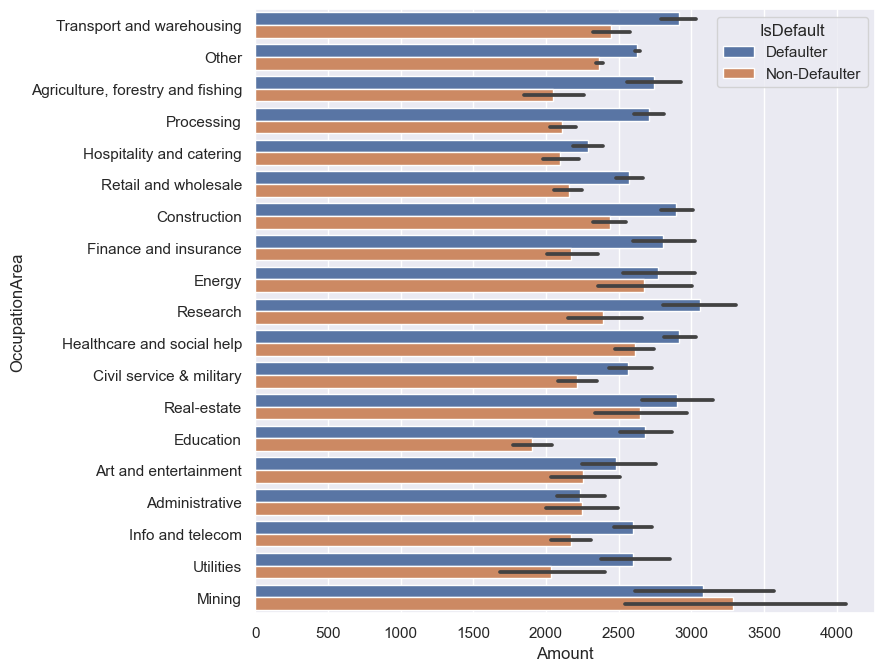

In [369]:
sns.set(rc={'figure.figsize':(8,8)})
ax = sns.barplot(y="OccupationArea", x="Amount", hue="IsDefault", data=data)
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 15)

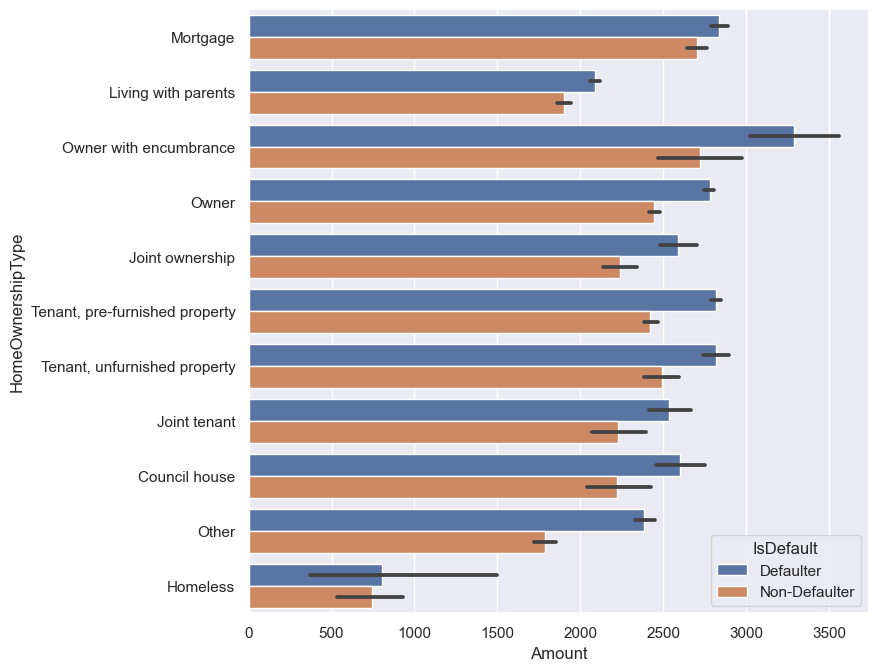

In [370]:
ax = sns.barplot(y="HomeOwnershipType", x="Amount", hue="IsDefault", data=data)
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 15)

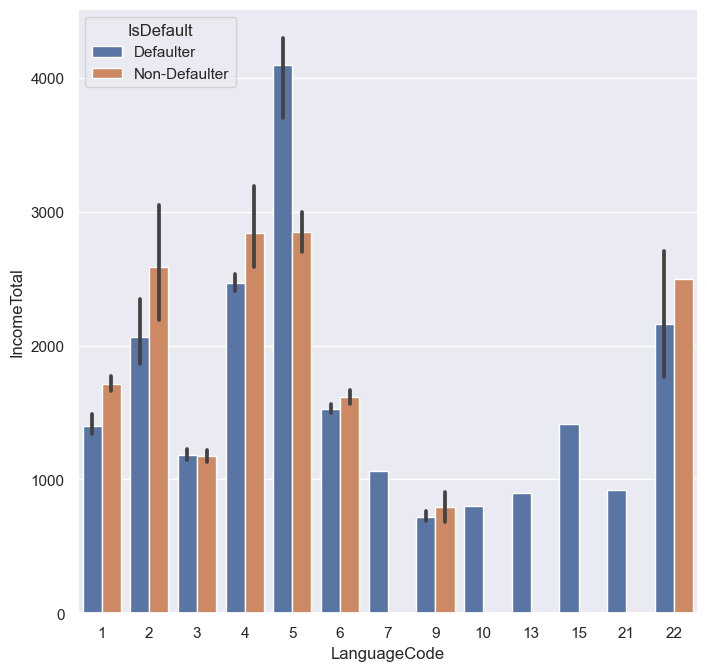

In [371]:
ax = sns.barplot(x="LanguageCode", y="IncomeTotal", hue="IsDefault", data=data)

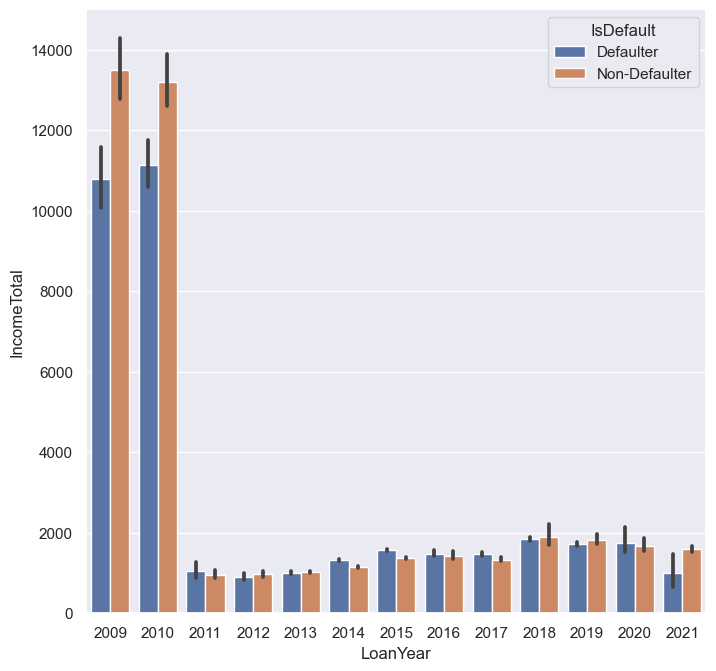

In [372]:
ax = sns.barplot(x="LoanYear", y="IncomeTotal", hue="IsDefault", data=data)

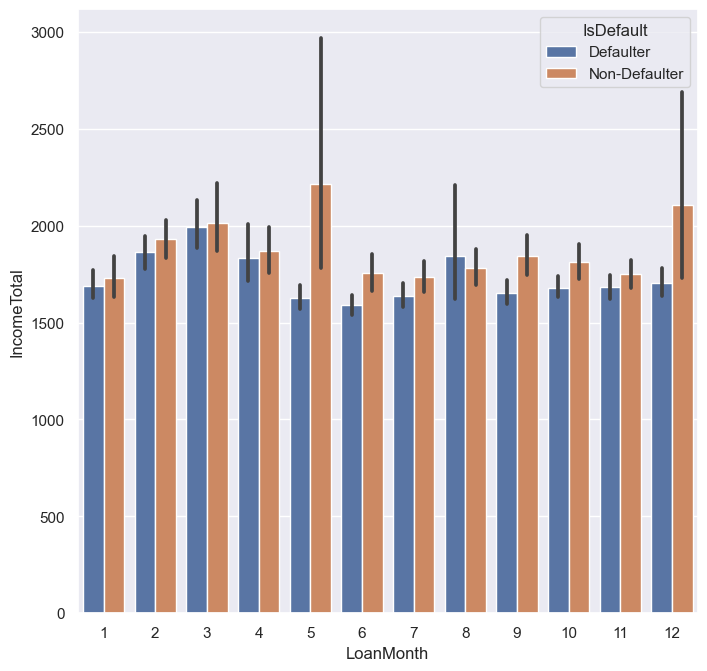

In [373]:
ax = sns.barplot(x="LoanMonth", y="IncomeTotal", hue="IsDefault", data=data)

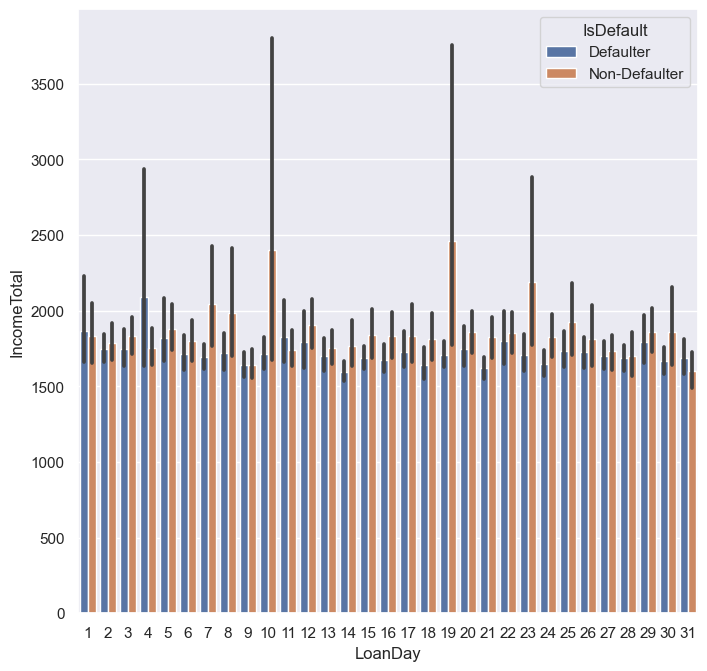

In [374]:
ax = sns.barplot(x="LoanDay", y="IncomeTotal", hue="IsDefault", data=data)

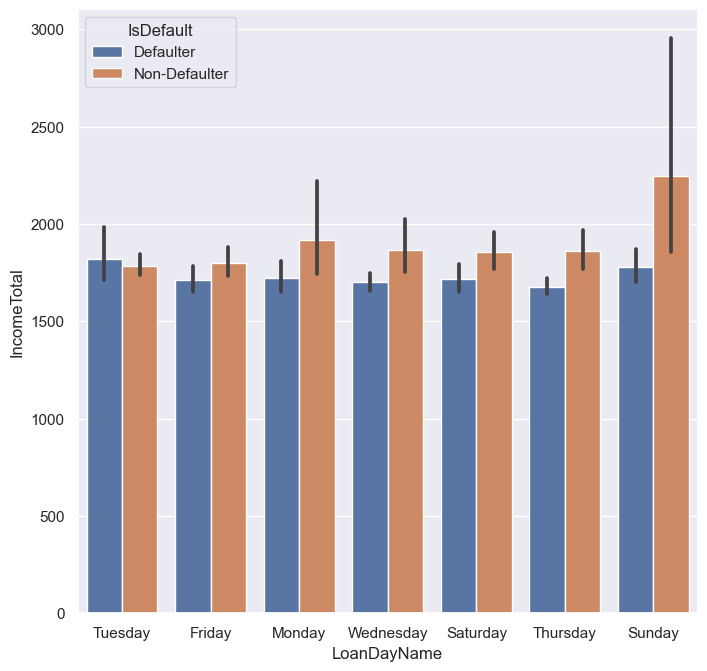

In [375]:
ax = sns.barplot(x="LoanDayName", y="IncomeTotal", hue="IsDefault", data=data)

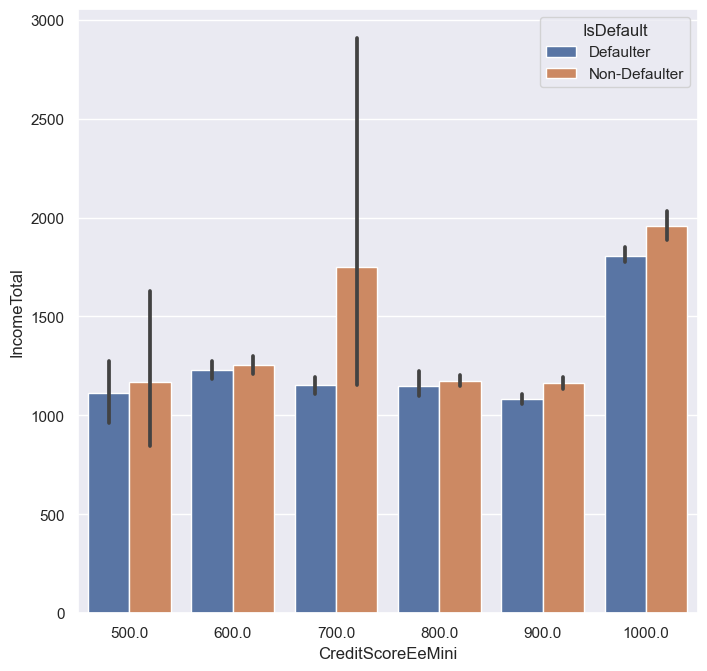

In [376]:
ax = sns.barplot(x="CreditScoreEeMini", y="IncomeTotal", hue="IsDefault", data=data)

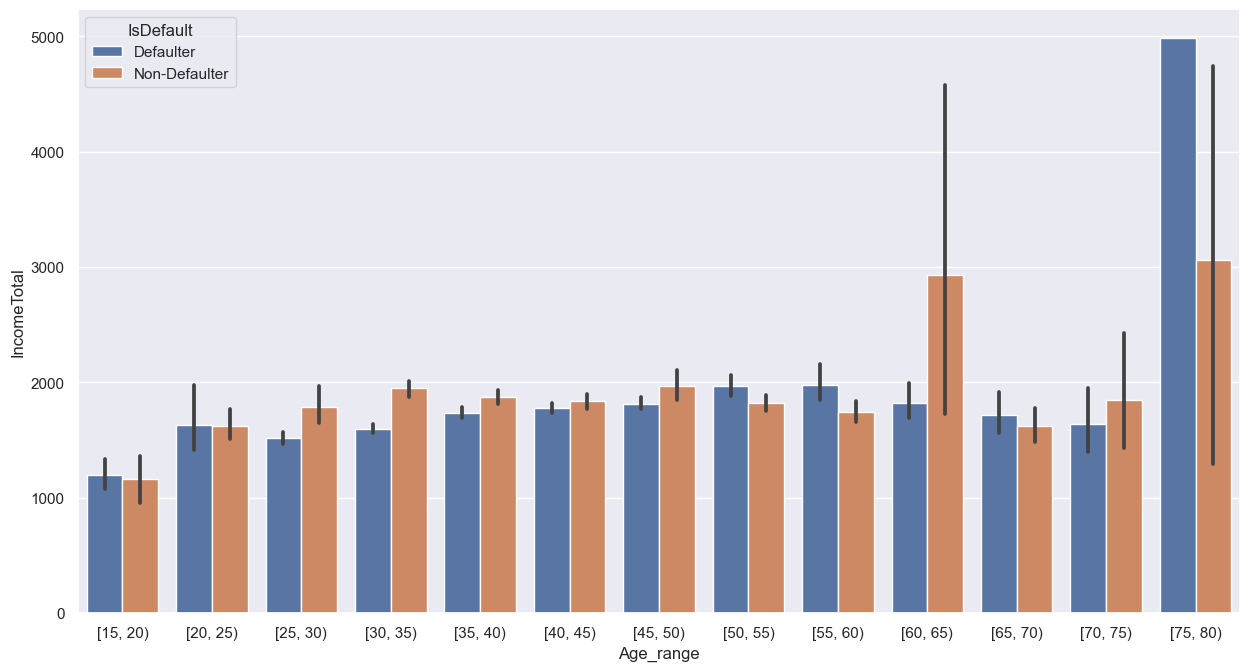

In [377]:
sns.set(rc = {'figure.figsize': (15, 8)}) 
ax = sns.barplot(x="Age_range", y="IncomeTotal", hue="IsDefault", data=data)

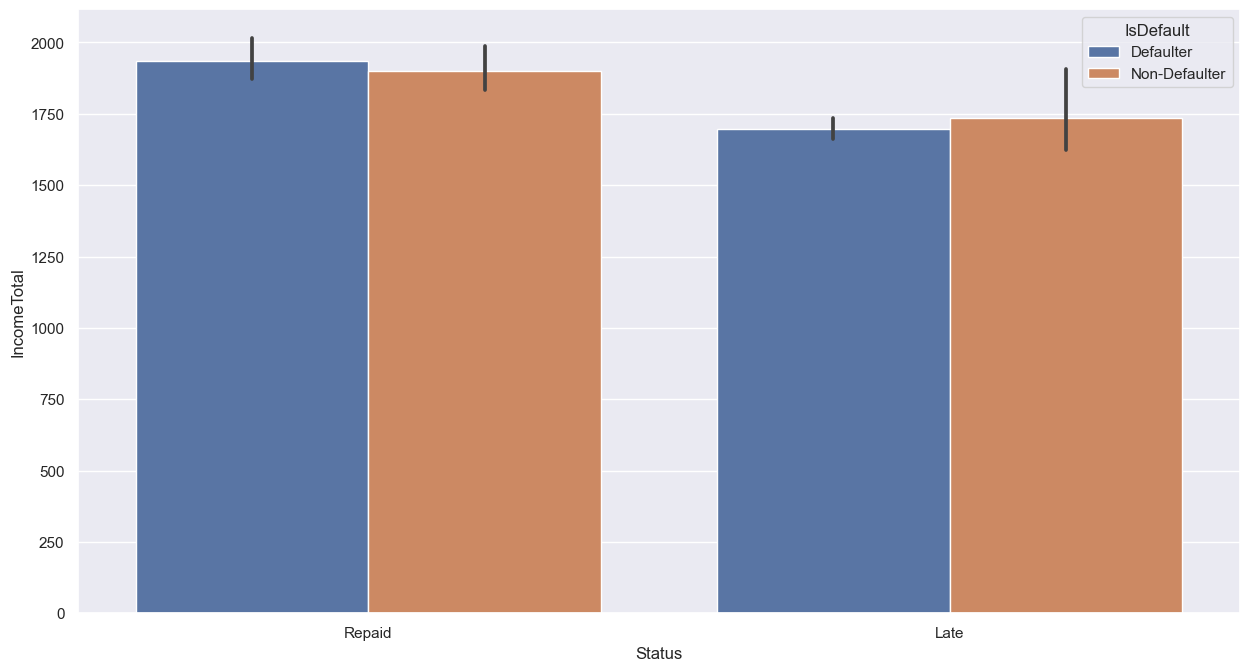

In [378]:
ax = sns.barplot(x="Status", y="IncomeTotal", hue="IsDefault", data=data)

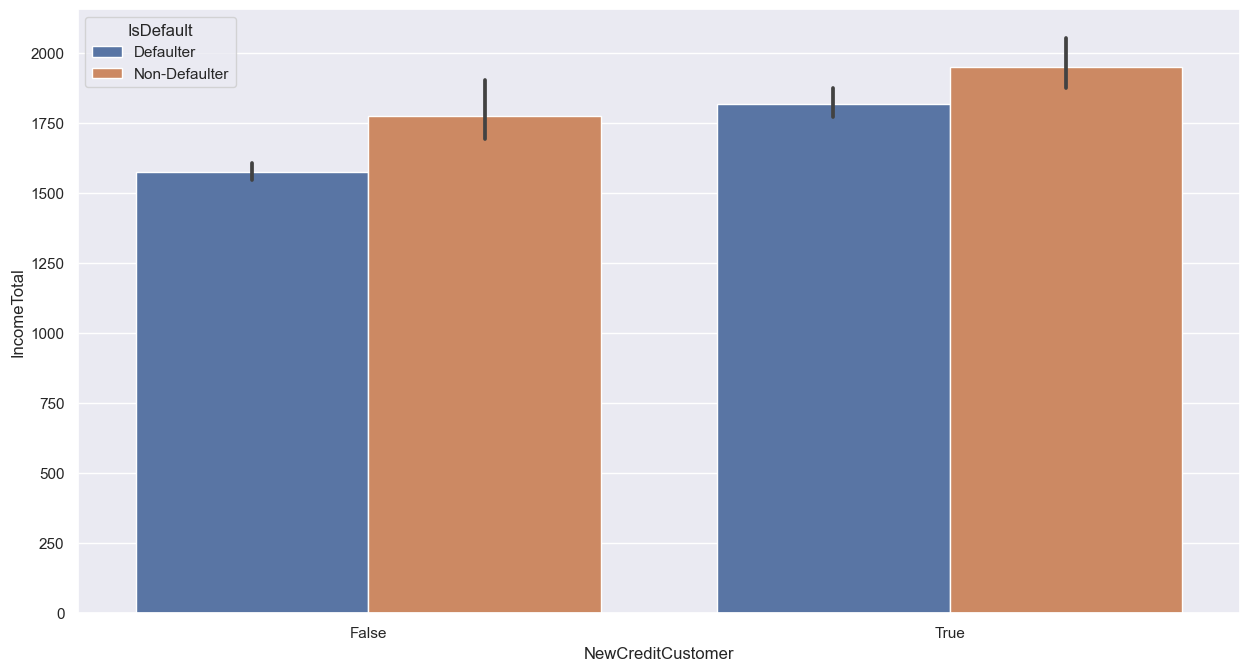

In [379]:
ax = sns.barplot(x="NewCreditCustomer", y="IncomeTotal", hue="IsDefault", data=data)

[Text(0, 0, 'Income and expenses verified'),
 Text(1, 0, 'Income verified'),
 Text(2, 0, 'Income unverified'),
 Text(3, 0, 'Income unverified, cross-referenced by phone')]

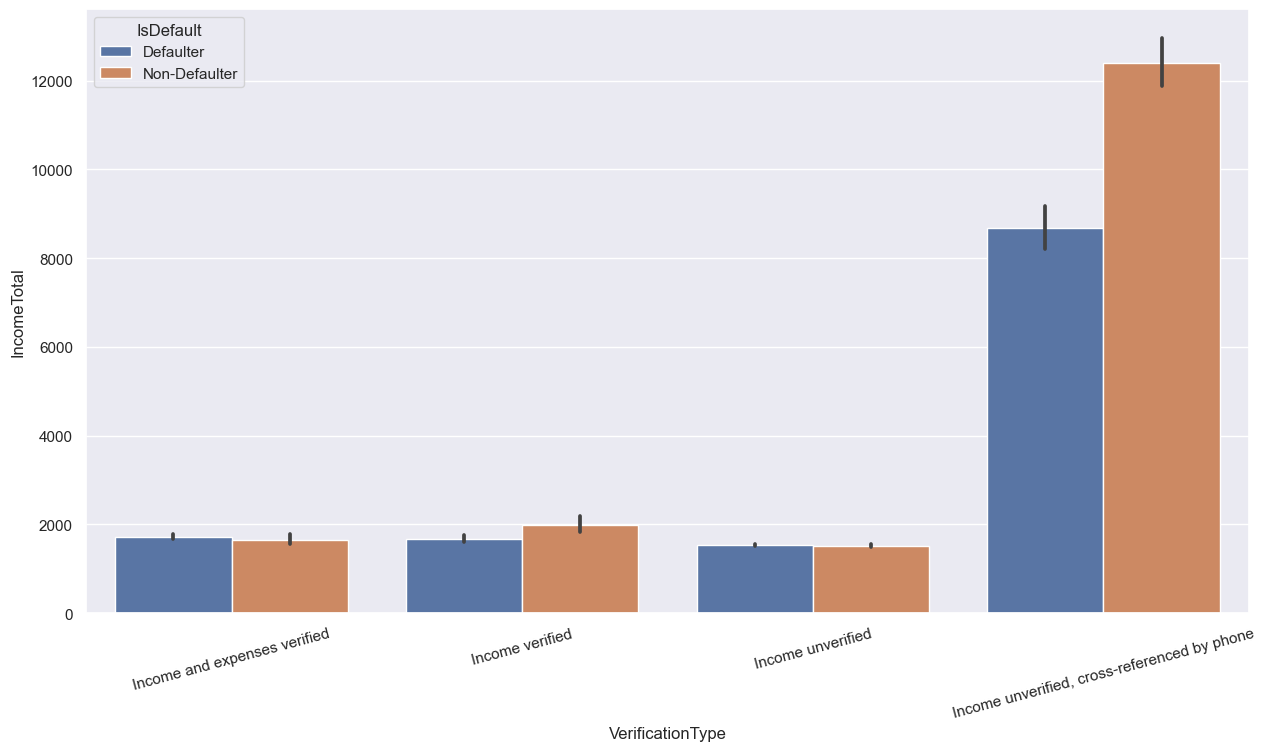

In [380]:
ax = sns.barplot(x="VerificationType", y="IncomeTotal", hue="IsDefault", data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 15)

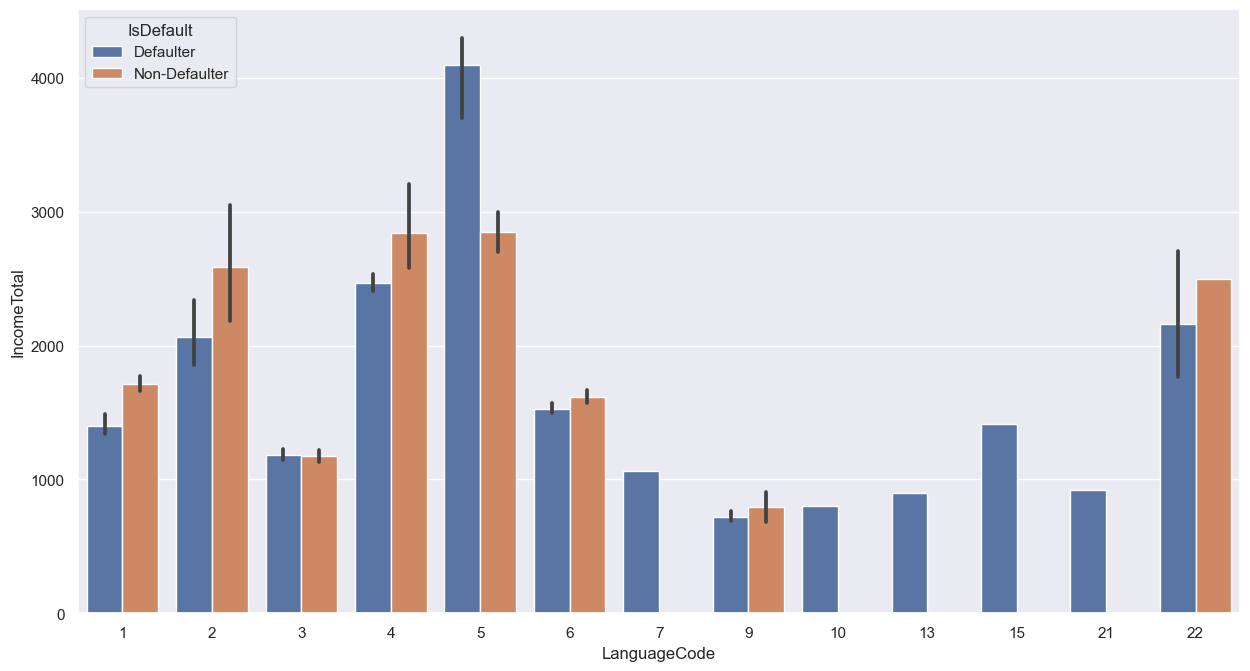

In [381]:
ax = sns.barplot(x="LanguageCode", y="IncomeTotal", hue="IsDefault", data=data)

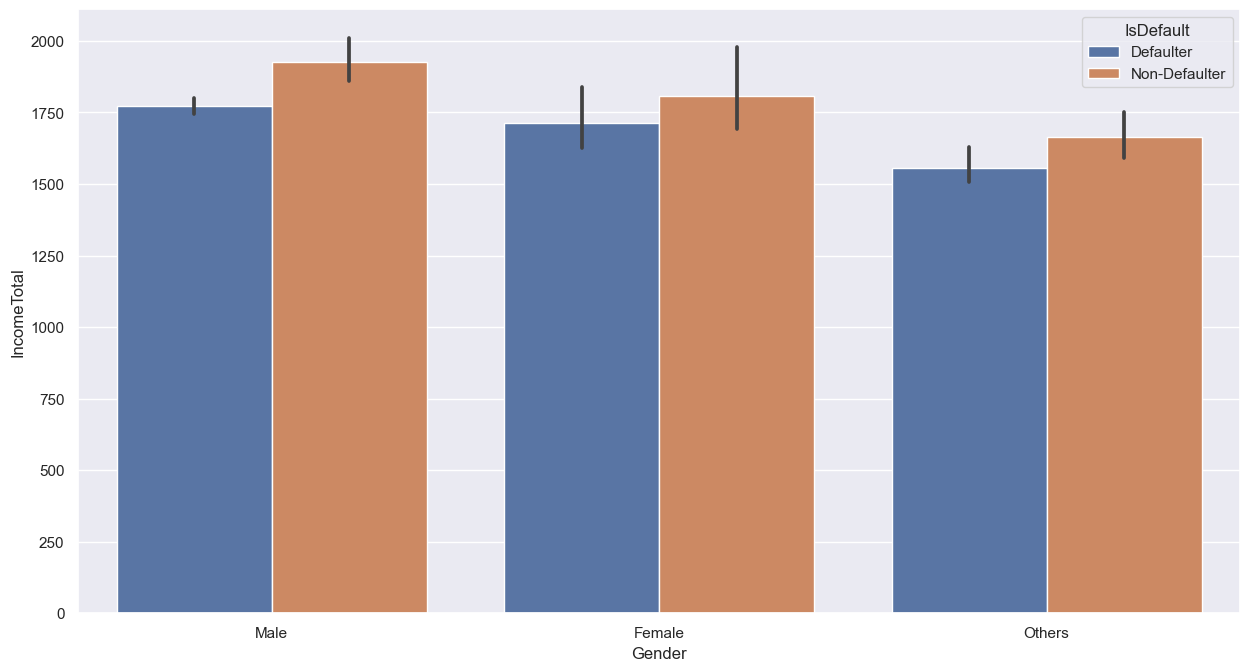

In [382]:
ax = sns.barplot(x="Gender", y="IncomeTotal", hue="IsDefault", data=data)

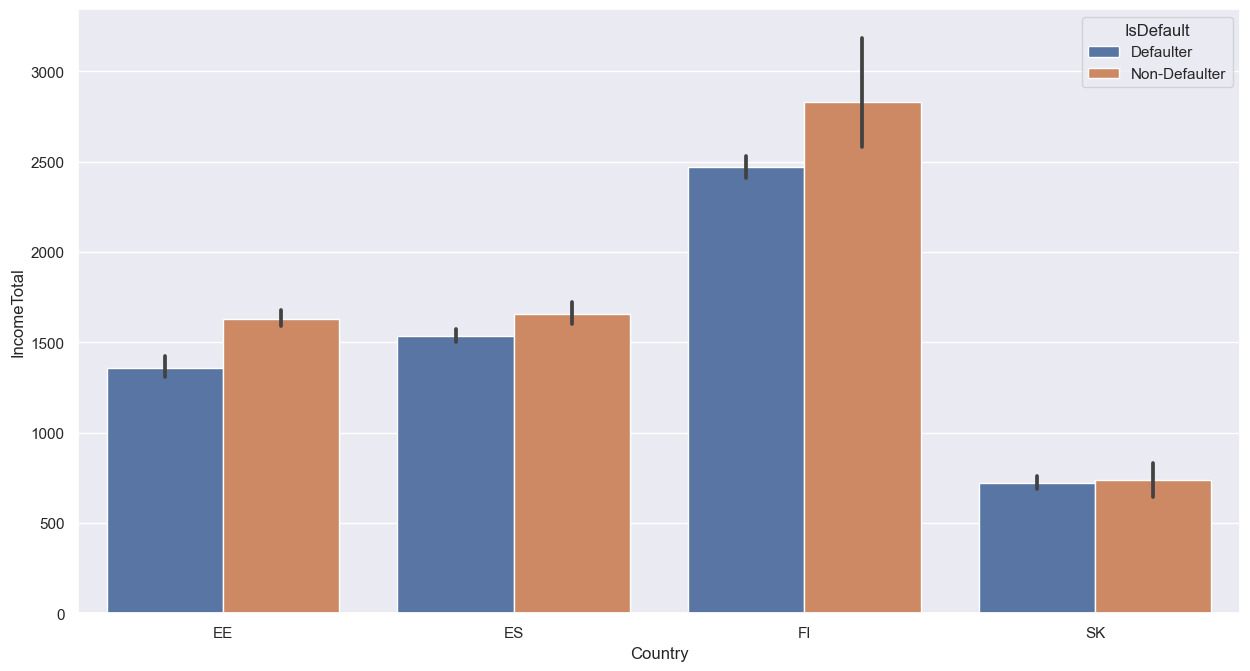

In [383]:
ax = sns.barplot(x="Country", y="IncomeTotal", hue="IsDefault", data=data)

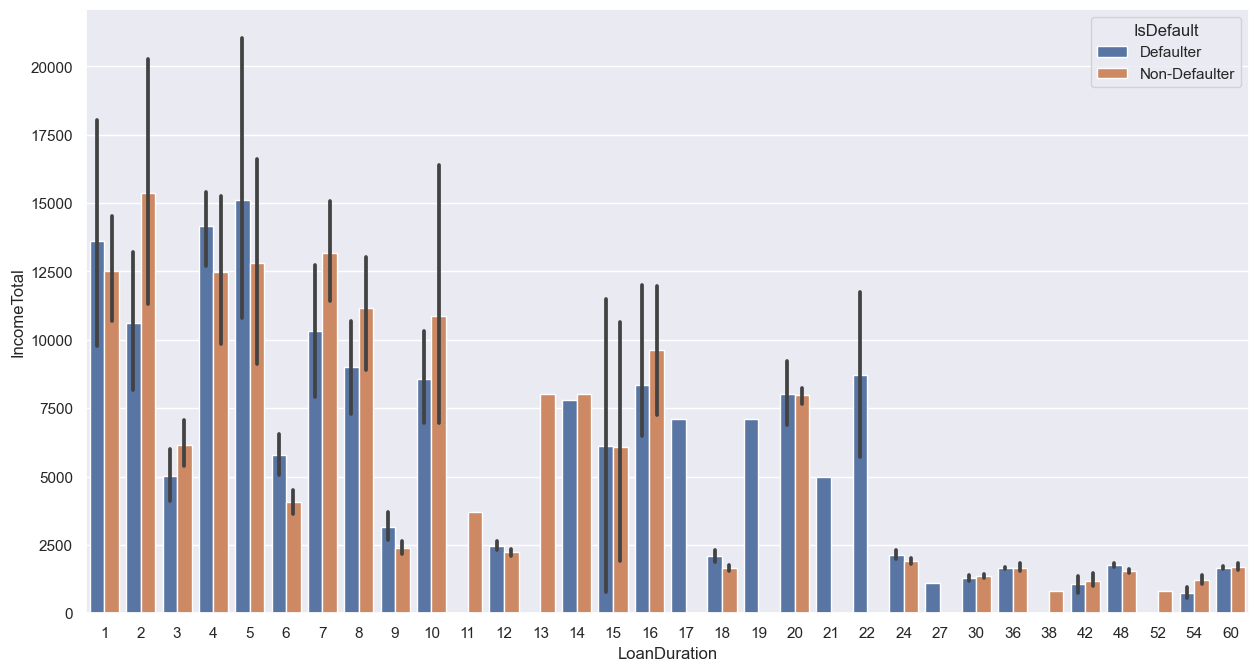

In [384]:
ax = sns.barplot(x="LoanDuration", y="IncomeTotal", hue="IsDefault", data=data)

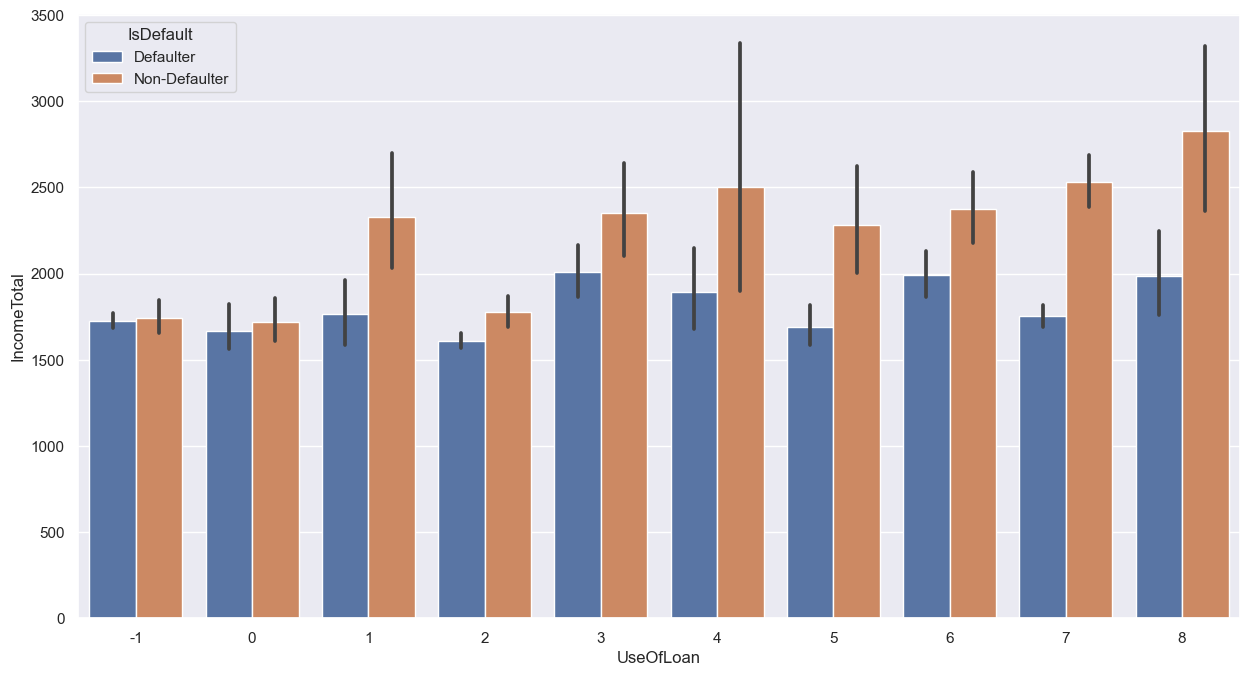

In [385]:
ax = sns.barplot(x="UseOfLoan", y="IncomeTotal", hue="IsDefault", data=data)

[Text(0, 0, 'Secondary education'),
 Text(1, 0, 'Basic education'),
 Text(2, 0, 'Higher education'),
 Text(3, 0, 'Vocational education'),
 Text(4, 0, 'Primary education')]

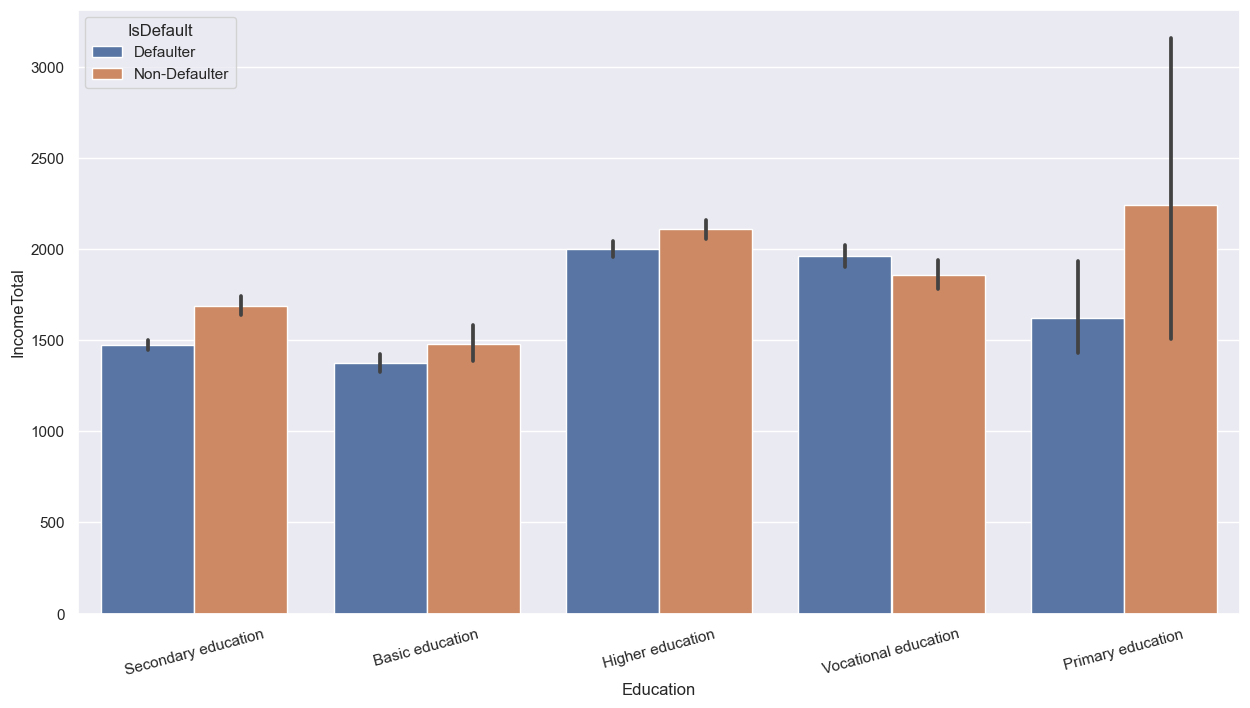

In [386]:
ax = sns.barplot(x="Education", y="IncomeTotal", hue="IsDefault", data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 15)

[Text(0, 0, 'Entrepreneur'),
 Text(1, 0, 'Fully employed'),
 Text(2, 0, 'Retiree'),
 Text(3, 0, 'Self-employed'),
 Text(4, 0, 'Partially employed'),
 Text(5, 0, 'Unemployed')]

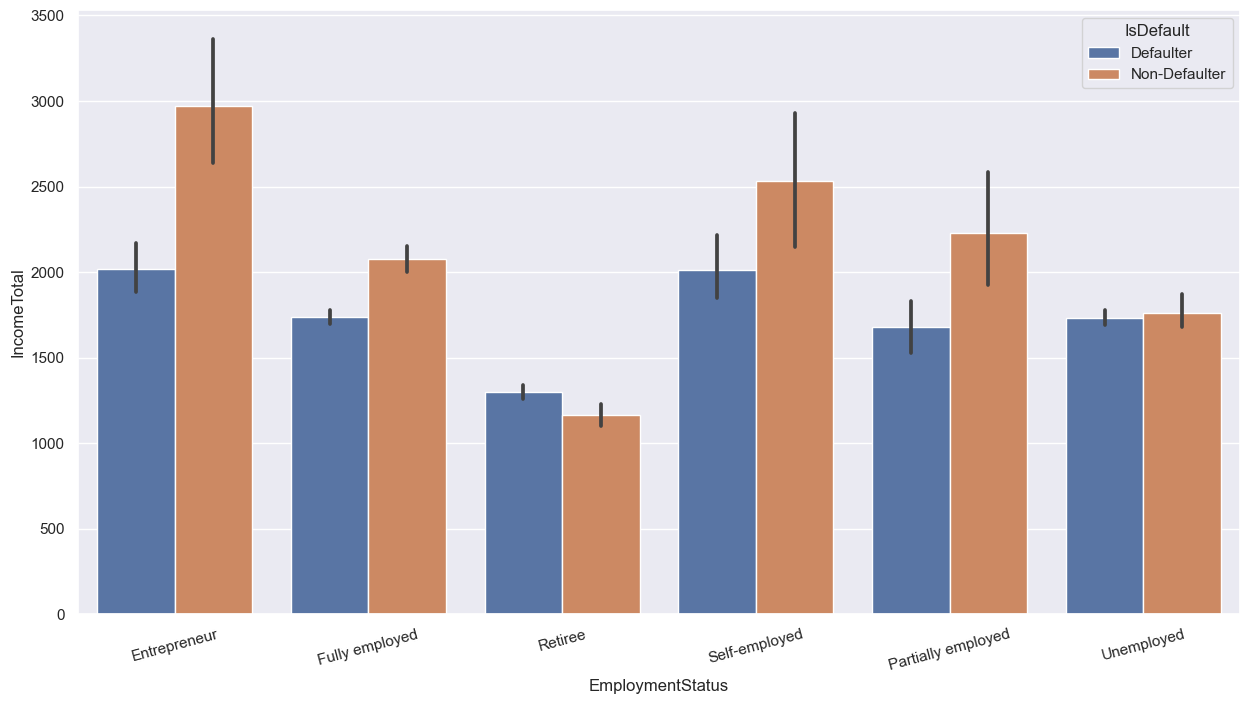

In [387]:
ax = sns.barplot(x="EmploymentStatus", y="IncomeTotal", hue="IsDefault", data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 15)

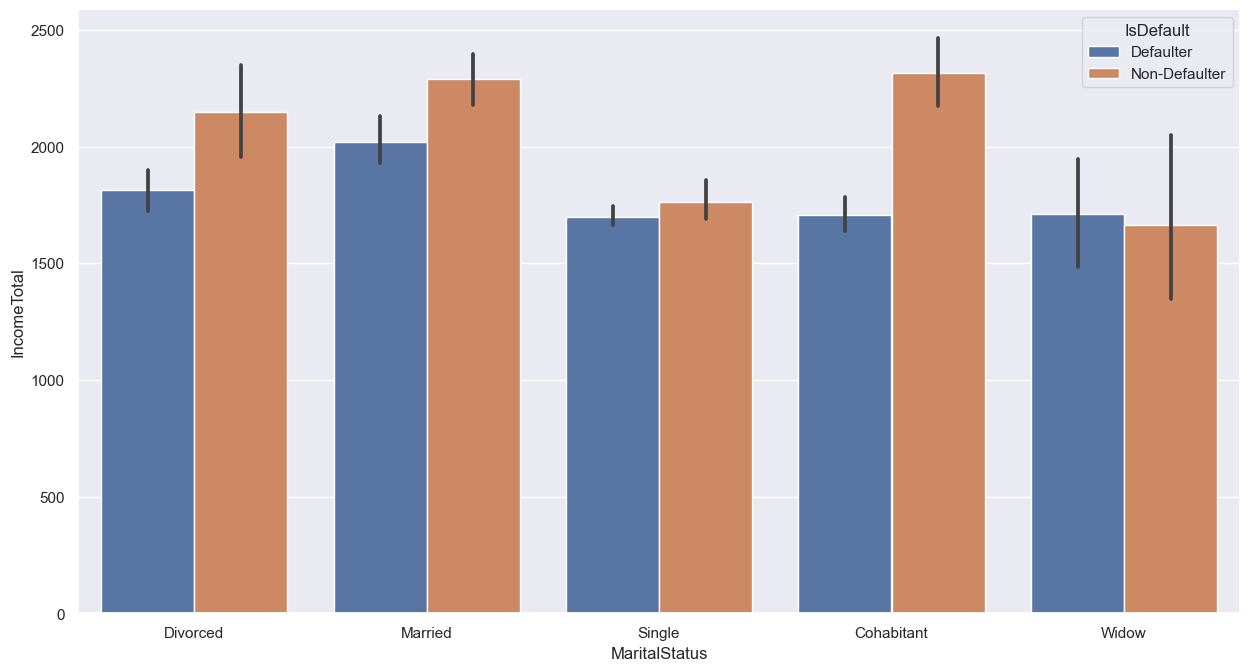

In [388]:
ax = sns.barplot(x="MaritalStatus", y="IncomeTotal", hue="IsDefault", data=data)

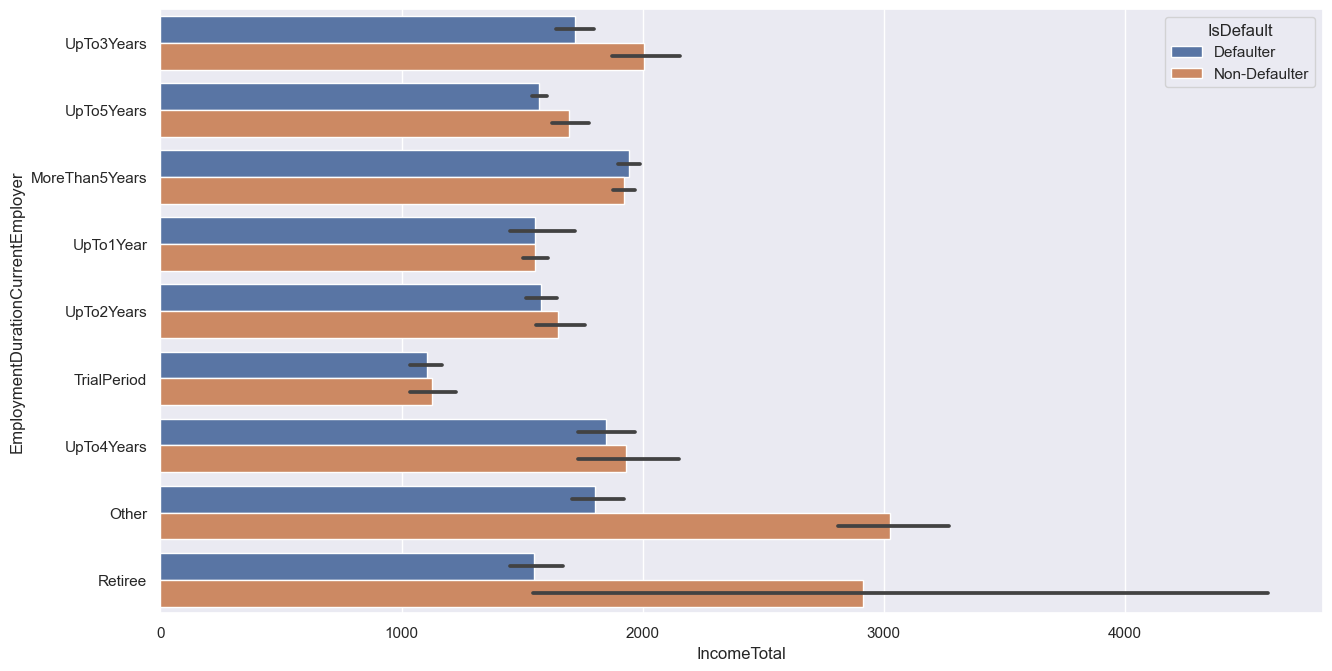

In [389]:
ax = sns.barplot(y="EmploymentDurationCurrentEmployer", x="IncomeTotal", hue="IsDefault", data=data)
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 15)

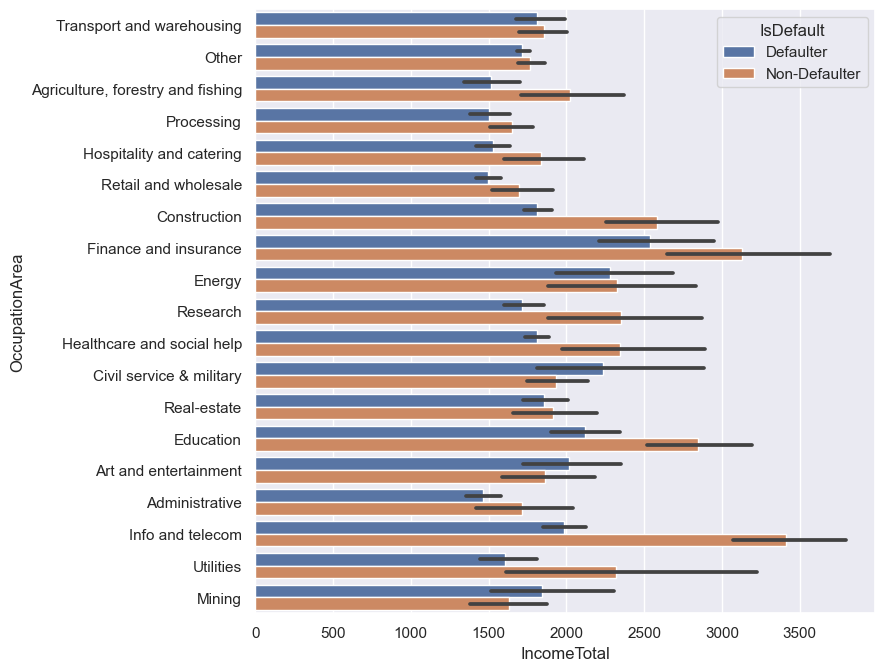

In [390]:
sns.set(rc={'figure.figsize':(8,8)})
ax = sns.barplot(x="IncomeTotal", y="OccupationArea", hue="IsDefault", data=data)
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 15)

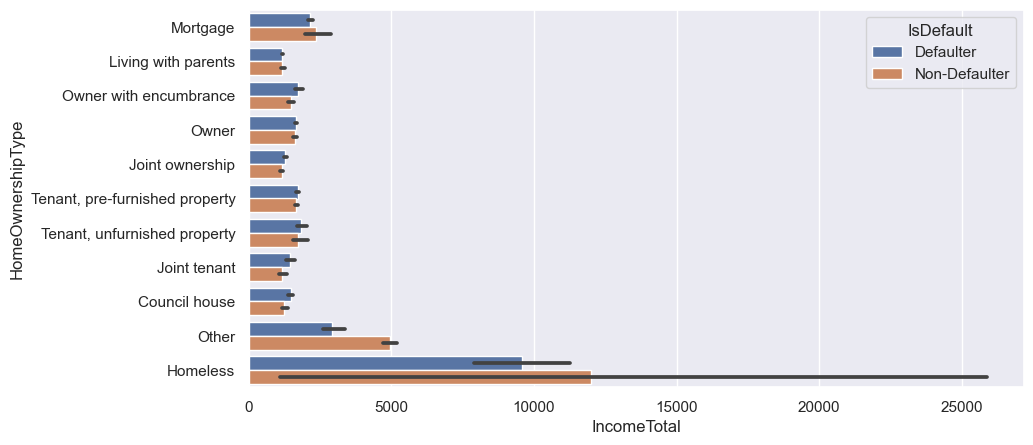

In [391]:
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.barplot(y="HomeOwnershipType", x="IncomeTotal", hue="IsDefault", data=data)
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 15)

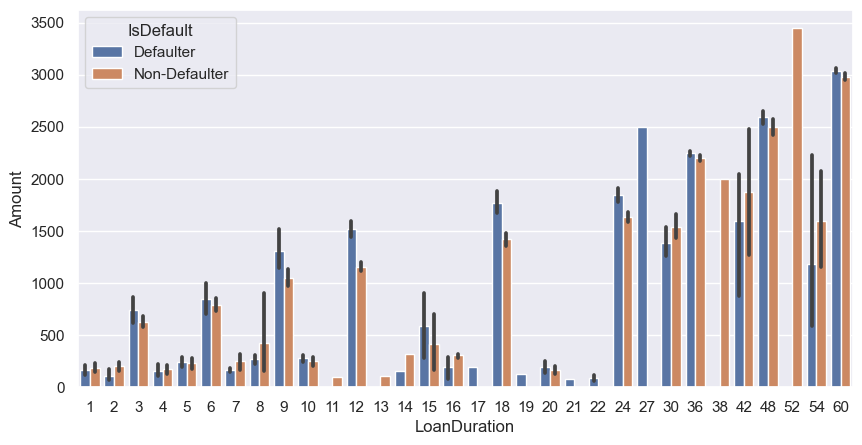

In [392]:
ax = sns.barplot(x="LoanDuration", y="Amount", hue="IsDefault", data=data)

In [393]:
import gc 
gc.collect()  

6364

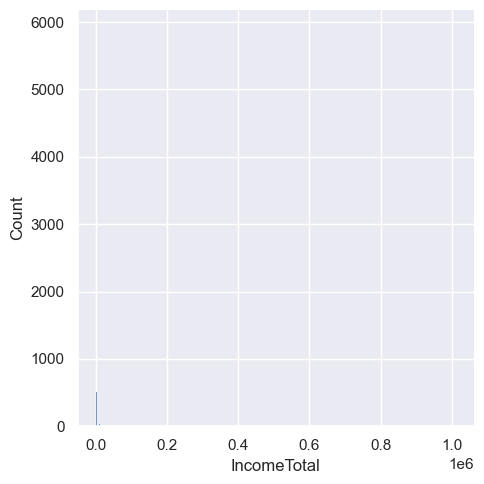

In [394]:
sns.displot(data['IncomeTotal'])   

In [395]:
data['IncomeTotal'].describe([0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8,0.9, 0.95, 0.99,0.991,0.995, 0.999])  

count    1.159990e+05
mean     1.789052e+03
std      6.111791e+03
min      0.000000e+00
10%      6.300000e+02
20%      8.000000e+02
25%      9.000000e+02
30%      9.800000e+02
40%      1.100000e+03
50%      1.298000e+03
60%      1.500000e+03
70%      1.800000e+03
75%      1.940000e+03
80%      2.100000e+03
90%      2.700000e+03
95%      3.475000e+03
99%      1.180000e+04
99.1%    1.222144e+04
99.5%    1.687030e+04
99.9%    3.600000e+04
max      1.012019e+06
Name: IncomeTotal, dtype: float64

<AxesSubplot:xlabel='IncomeTotal', ylabel='FreeCash'>

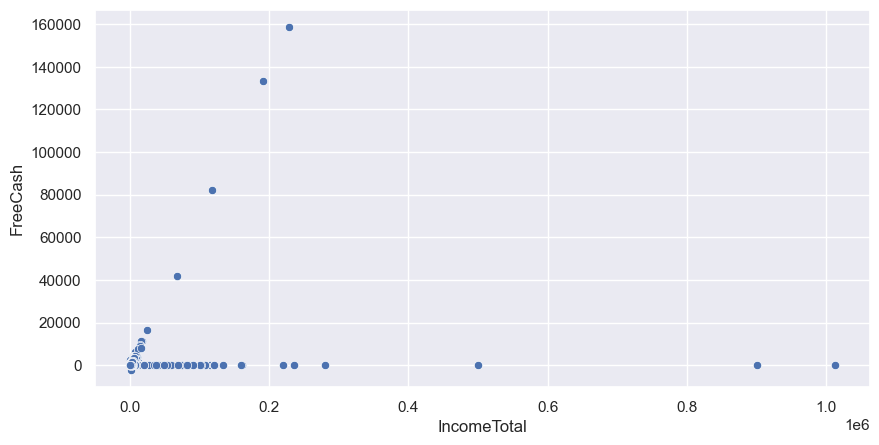

In [396]:
sns.scatterplot(data=data, x=data['IncomeTotal'], y=data['FreeCash'])

In [397]:
data111 = data[data['IncomeTotal'] < 40000]

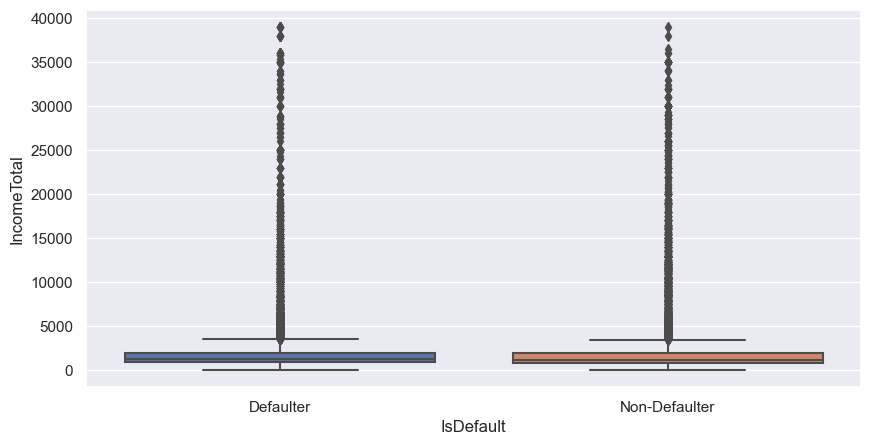

In [398]:
ax = sns.boxplot(x=data111['IsDefault'], y=data111['IncomeTotal'], data=data111) 

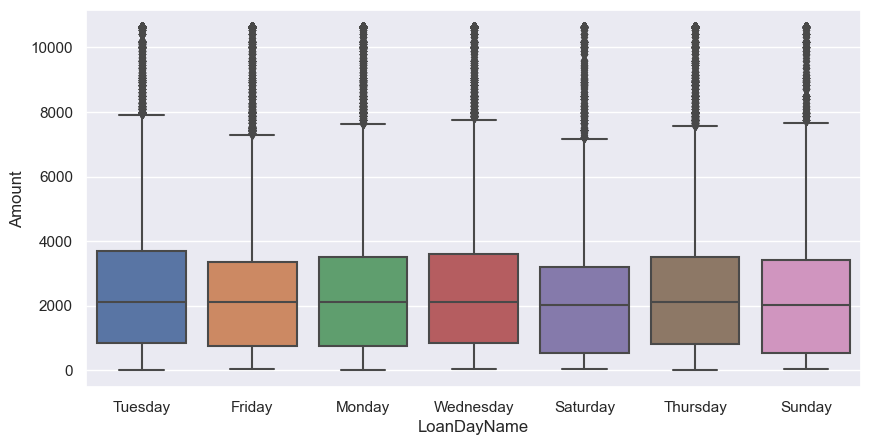

In [399]:
ax = sns.boxplot(x=data['LoanDayName'], y=data['Amount'], data=data)

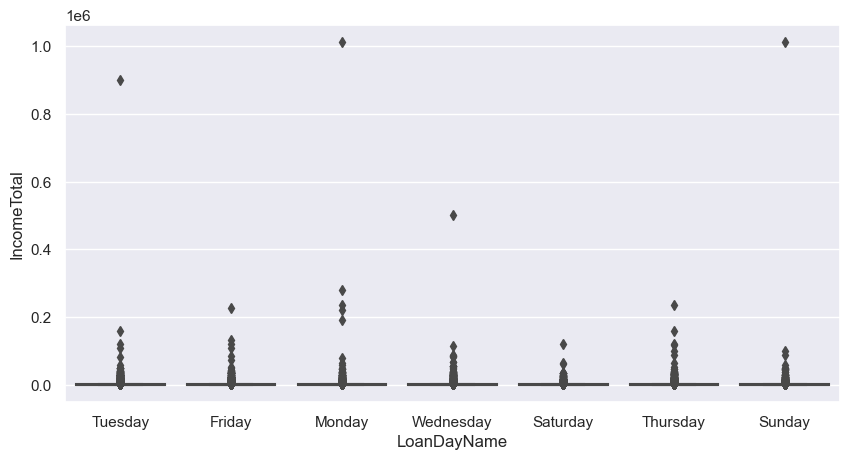

In [400]:
ax = sns.boxplot(x=data['LoanDayName'], y=data['IncomeTotal'], data=data)

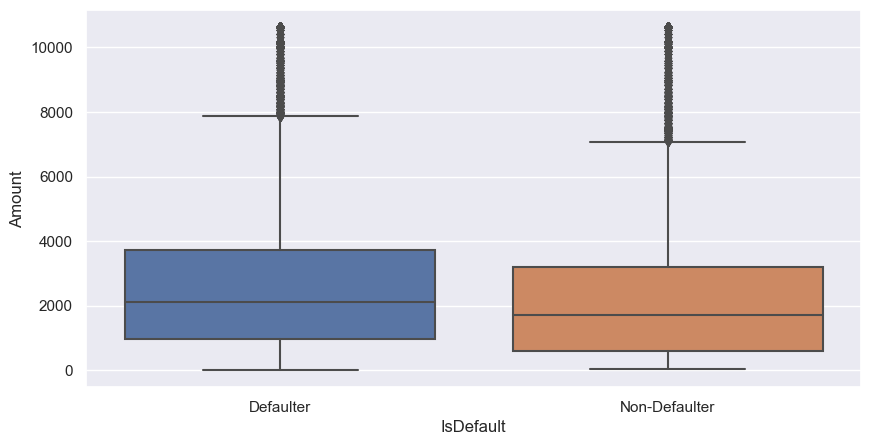

In [401]:
ax = sns.boxplot(x=data['IsDefault'], y=data['Amount'], data=data)

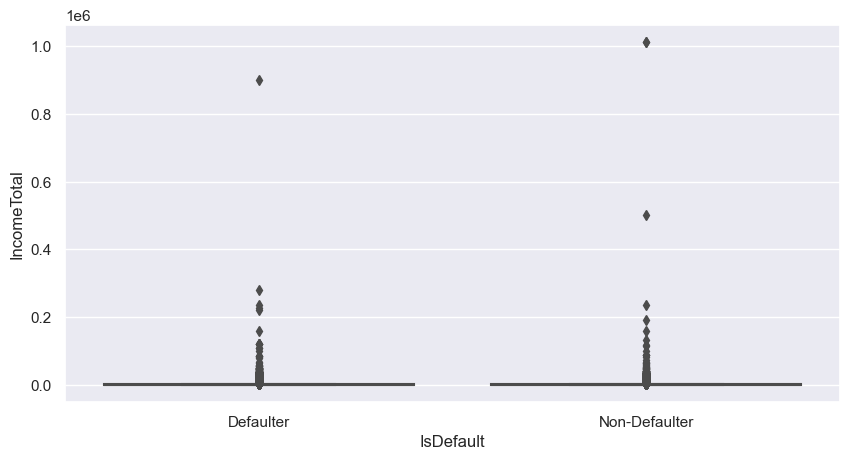

In [402]:
ax = sns.boxplot(x=data['IsDefault'], y=data['IncomeTotal'], data=data)

<AxesSubplot:xlabel='IncomeTotal', ylabel='Amount'>

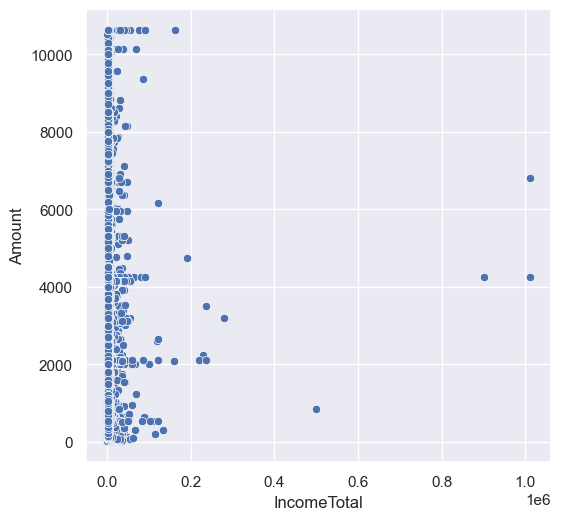

In [403]:
sns.set(rc = {'figure.figsize':(6,6)})
sns.scatterplot(data=data, x=data['IncomeTotal'], y=data['Amount']) 

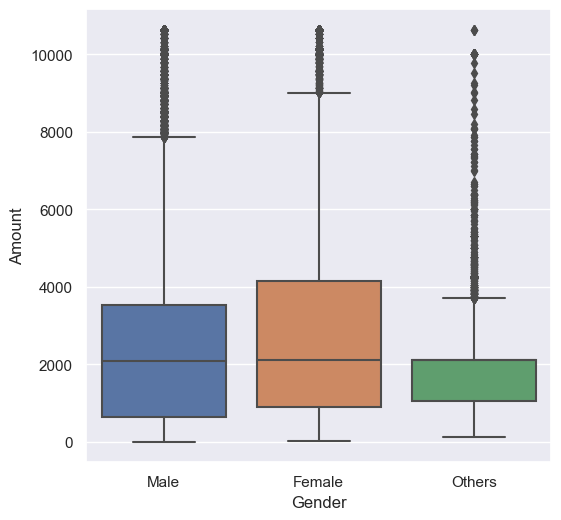

In [404]:
ax = sns.boxplot(x=data['Gender'], y=data['Amount'], data=data)

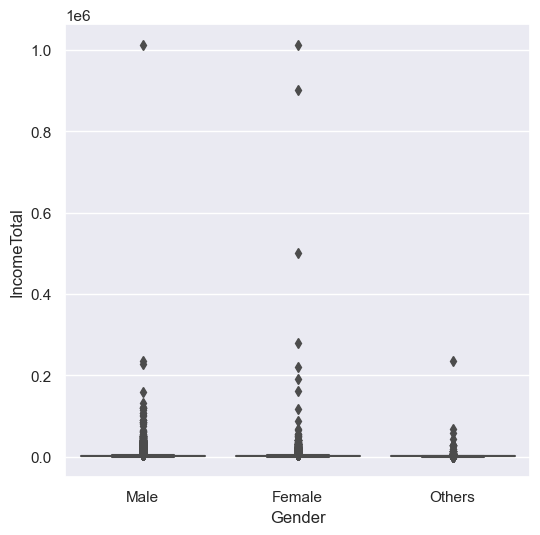

In [405]:
ax = sns.boxplot(x=data['Gender'], y=data['IncomeTotal'], data=data)

In [406]:
# def plot_pie_charts(feature_name, cat_dict, main_title):
#     with_default_df_len_list = []
#     without_default_df_len_list = []
    
#     labels = cat_dict.values()
    
#     # loop to generate the lengths for each category of the feature
#     for key in cat_dict.keys():
#         with_default_df_len_list.append(len(data[(data[feature_name] == cat_dict[key]) & (data['IsDefault'] == 1)]))
        
#         without_default_df_len_list.append(len(data[(data[feature_name] == cat_dict[key]) & (data['IsDefault'] == 0)]))

#     # generating the figure
#     fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

#     fig.suptitle(main_title, fontsize=20)

#     # A standard pie plot
#     ax1.pie(with_default_df_len_list, labels=labels, autopct='%1.1f%%', shadow=False,
#             explode=tuple([0.1]*len(cat_dict)))

#     # Change Here
#     ax1.set_title('Defaulters')


#     # Shift the second slice using explode
#     ax2.pie(without_default_df_len_list, labels=labels, autopct='%.0f%%', shadow=False,
#             explode=tuple([0.1]*len(cat_dict)))

#     # Change Here
#     ax2.set_title('Non Defaulters')
    
#     # print the len lists
#     print(with_default_df_len_list)
#     print(without_default_df_len_list)

#     plt.show()

In [407]:

gender_dict = SortedDict({0.0: 'Male',
               1.0: 'Female',
               2.0: 'Others'})


In [409]:
# plot_pie_charts(feature_name='Gender', 
#                 cat_dict=gender_dict, 
#                 main_title='Pie Chart of Gender')

In [410]:
data.to_csv('Proper_Data.csv')

In [411]:
data['VerificationType'].value_counts()  

Income and expenses verified                    68542
Income unverified                               36665
Income verified                                  8964
Income unverified, cross-referenced by phone     1828
Name: VerificationType, dtype: int64

<AxesSubplot:xlabel='PreviousEarlyRepaymentsCountBeforeLoan', ylabel='count'>

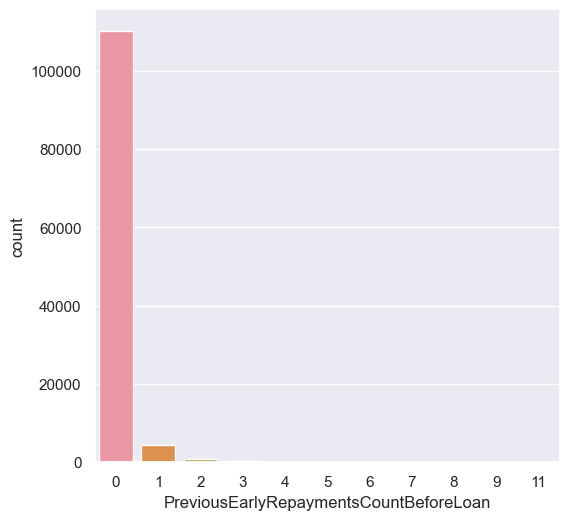

In [412]:
sns.countplot(data['PreviousEarlyRepaymentsCountBeforeLoan'])

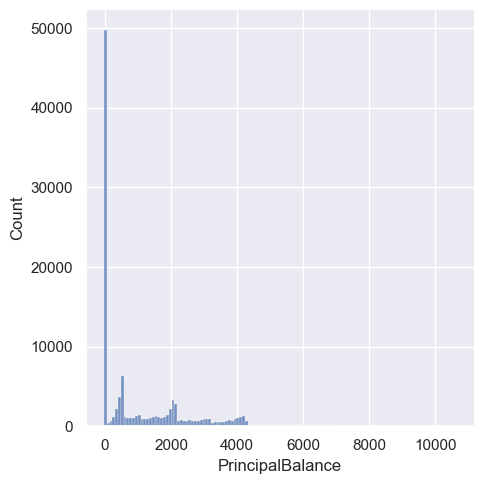

In [413]:
sns.displot(data['PrincipalBalance'])

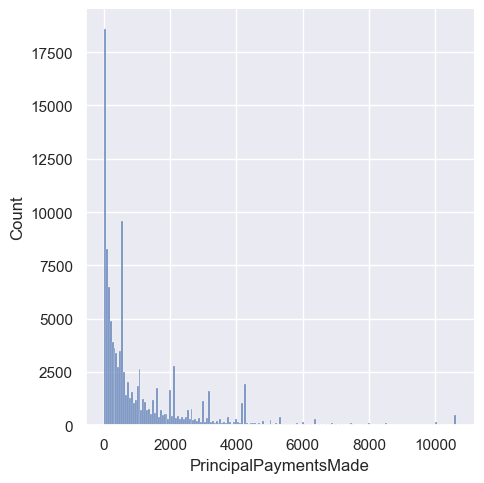

In [414]:
sns.displot(data['PrincipalPaymentsMade'])

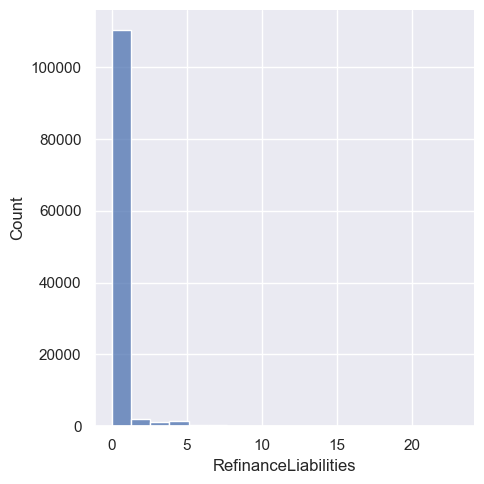

In [415]:
sns.displot(data['RefinanceLiabilities'])

<AxesSubplot:xlabel='UseOfLoan', ylabel='count'>

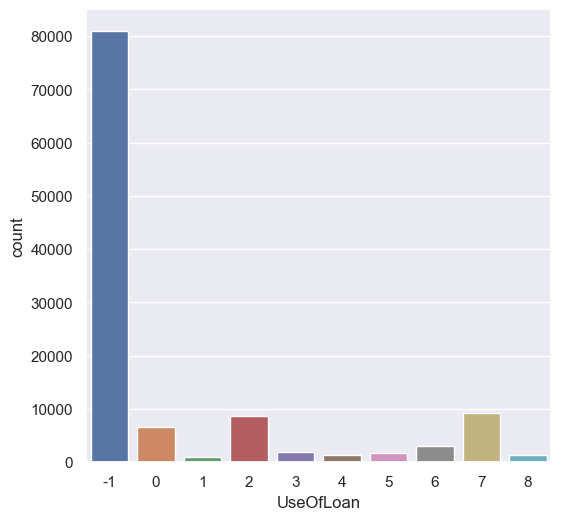

In [416]:
sns.countplot(data['UseOfLoan'])

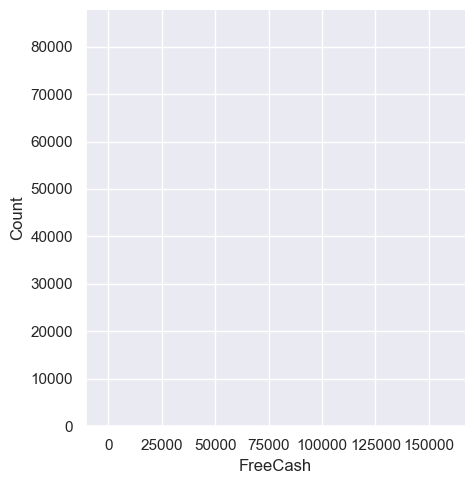

In [417]:
sns.displot(data['FreeCash'])

In [418]:
gc.collect() 

20

## End Point Cell

In [419]:
num_cols.remove('PlannedInterestPostDefault')
num_cols.remove('CurrentDebtDaysPrimary')
num_cols.remove('LossGivenDefault')

num_cols.remove('InterestAndPenaltyWriteOffs')
num_cols.remove('ExpectedLoss')
num_cols.remove('ExpectedReturn')

num_cols.remove('InterestAndPenaltyBalance')
num_cols.remove('InterestAndPenaltyPaymentsMade')
num_cols.remove('PrincipalRecovery')

num_cols.remove('PrincipalWriteOffs')
num_cols.remove('PrincipalOverdueBySchedule')
num_cols.remove('InterestRecovery')

## Data Transformation

In [420]:
# num_cols = []
# cat_cols = []
# date_cols = []
# types = []
# for item in data.columns:
#     print(item + "--"*20 + str(data[item].dtypes))
#     if str(data[item].dtypes) in types:
#         pass
#     else:
#         types.append(str(data[item].dtypes))

In [421]:
num_cols

['BidsPortfolioManager',
 'BidsApi',
 'BidsManual',
 'Amount',
 'Interest',
 'MonthlyPayment',
 'IncomeFromPrincipalEmployer',
 'IncomeFromPension',
 'IncomeFromFamilyAllowance',
 'IncomeFromSocialWelfare',
 'IncomeFromLeavePay',
 'IncomeFromChildSupport',
 'IncomeOther',
 'IncomeTotal',
 'ExistingLiabilities',
 'LiabilitiesTotal',
 'RefinanceLiabilities',
 'DebtToIncome',
 'FreeCash',
 'PlannedInterestTillDate',
 'EAD2',
 'PrincipalPaymentsMade',
 'PrincipalBalance',
 'AmountOfPreviousLoansBeforeLoan',
 'PreviousRepaymentsBeforeLoan',
 'NrOfScheduledPayments']

In [422]:
num_cols.remove('EAD2')
data = data.drop(columns = 'EAD2', axis = 1)

<AxesSubplot:>

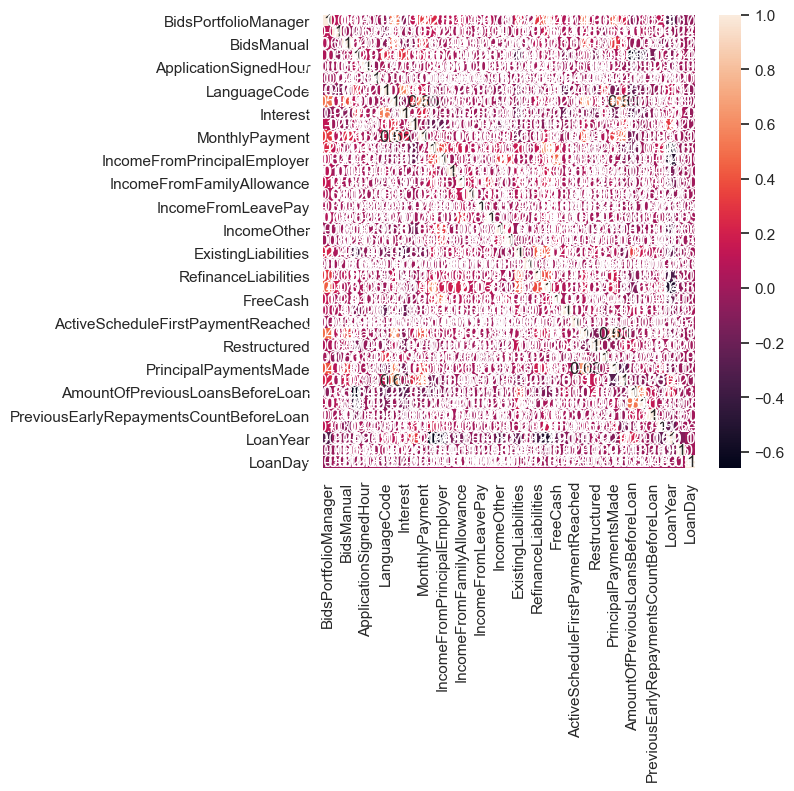

In [423]:
sns.heatmap(data.corr(), annot = True)

In [424]:
from sklearn.preprocessing import StandardScaler

In [425]:
ss = StandardScaler() 

In [426]:
data[num_cols] = ss.fit_transform(data[num_cols])

In [427]:
data['Status'].value_counts()  

Late      66460
Repaid    49539
Name: Status, dtype: int64

In [ ]:
# data[(data['Status']== 'Late') & (data['IsDefault']==1)] 

In [ ]:
# data[(data['Status']== 'Late') & (data['IsDefault']==0)] 

In [ ]:
# data[(data['Status']== 'Current') & (data['IsDefault']==1)]

In [ ]:
# data[(data['Status']== 'Current') & (data['IsDefault']==0)]

In [ ]:
# data[(data['Status']== 'Repaid') & (data['IsDefault']==0)] 

In [ ]:
# data[(data['Status']== 'Repaid') & (data['IsDefault']==1)] 

In [ ]:
hdfhf  gfjgf jgf jgfduter dfs AAa a  ajgf nv

In [ ]:
# for item in data[cats_cols]:
#     print(data[item].value_counts())
#     print("---"*20)

In [428]:
cat_fts_with_only2uniq_fts = ['NewCreditCustomer', 
                              'ActiveScheduleFirstPaymentReached', 
                              'Restructured',
                              'IsDefault']

In [429]:
cats_cols

['NewCreditCustomer',
 'ApplicationSignedHour',
 'ApplicationSignedWeekday',
 'VerificationType',
 'LanguageCode',
 'Gender',
 'Country',
 'LoanDuration',
 'UseOfLoan',
 'Education',
 'MaritalStatus',
 'EmploymentStatus',
 'EmploymentDurationCurrentEmployer',
 'OccupationArea',
 'HomeOwnershipType',
 'ActiveScheduleFirstPaymentReached',
 'Rating',
 'Status',
 'Restructured',
 'ActiveLateCategory',
 'WorseLateCategory',
 'CreditScoreEeMini',
 'PreviousEarlyRepaymentsCountBeforeLoan',
 'ActiveLateLastPaymentCategory',
 'MonthlyPaymentDay',
 'IsDefault',
 'Age_range',
 'LoanYear',
 'LoanMonth',
 'LoanDay',
 'LoanDayName']

In [430]:
data = data.drop(columns = ['ActiveLateCategory', 'WorseLateCategory'], axis = 1)

In [431]:
data.columns 

Index(['BidsPortfolioManager', 'BidsApi', 'BidsManual', 'NewCreditCustomer',
       'ApplicationSignedHour', 'ApplicationSignedWeekday', 'VerificationType',
       'LanguageCode', 'Gender', 'Country', 'Amount', 'Interest',
       'LoanDuration', 'MonthlyPayment', 'UseOfLoan', 'Education',
       'MaritalStatus', 'EmploymentStatus',
       'EmploymentDurationCurrentEmployer', 'OccupationArea',
       'HomeOwnershipType', 'IncomeFromPrincipalEmployer', 'IncomeFromPension',
       'IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare',
       'IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther',
       'IncomeTotal', 'ExistingLiabilities', 'LiabilitiesTotal',
       'RefinanceLiabilities', 'DebtToIncome', 'FreeCash', 'MonthlyPaymentDay',
       'ActiveScheduleFirstPaymentReached', 'PlannedInterestTillDate',
       'Rating', 'Status', 'Restructured', 'CreditScoreEeMini',
       'PrincipalPaymentsMade', 'PrincipalBalance',
       'AmountOfPreviousLoansBeforeLoan', 'PreviousRepaymen

In [ ]:
# for item in sorted(list(data.columns)):
#     print(item)

In [432]:
data   

BidsPortfolioManager   BidsApi  BidsManual  NewCreditCustomer  \
0                   1.234129  3.440284    6.962269               True   
1                   0.086743 -0.195271   -0.218849               True   
2                  -0.336739 -0.195271   -0.726139               True   
3                   2.957016 -0.195271    1.671959              False   
4                  -0.391032 -0.195271   -0.627317              False   
...                      ...       ...         ...                ...   
168340              0.061407  4.373302    1.118552              False   
168341              0.727397 -0.195271   -0.726139               True   
168342              3.778645  0.255152    0.795731              False   
168343             -0.409130 -0.195271    0.663967              False   
168344              1.451299 -0.195271   -0.726139               True   

        ApplicationSignedHour  ApplicationSignedWeekday  \
0                          22                         3   
1                          15                         3   
2                          14                         2   
3                          15                         3   
4                          12                         7   
...                       ...                       ...   
168340                     16                         6   
168341                      7                         2   
168342                     11                         5   
168343                     14                         4   
168344                     20                         2   

                    VerificationType  LanguageCode  Gender Country    Amount  \
0       Income and expenses verified             1    Male      EE  3.058898   
1                    Income verified             6    Male      ES -0.473449   
2       Income and expenses verified             1  Female      EE -0.924288   
3       Income and expenses verified             1    Male      EE  2.036377   
4                  Income unverified             6  Female      ES -0.924288   
...                              ...           ...     ...     ...       ...   
168340               Income verified             1  Female      EE  0.312034   
168341             Income unverified             4  Female      FI -0.241057   
168342  Income and expenses verified             4    Male      FI  2.287359   
168343             Income unverified             6    Male      ES -0.480420   
168344             Income unverified             3  Female      EE  0.223725   

        Interest  LoanDuration  MonthlyPayment  UseOfLoan  \
0      -0.915776            60        1.260881          3   
1       0.068919            60       -0.517738          2   
2      -0.473345            60       -0.922056          2   
3      -0.622541            60        0.771293          7   
4       0.452777            60       -0.846501          7   
...          ...           ...             ...        ...   
168340  0.173172            60        0.123481          0   
168341 -0.174584            60       -0.408612          6   
168342 -0.516078            60        0.947125          0   
168343  0.957098            60       -0.261406          7   
168344 -0.622910            60       -0.299314          6   

                   Education MaritalStatus EmploymentStatus  \
0        Secondary education      Divorced     Entrepreneur   
1            Basic education       Married   Fully employed   
2        Secondary education       Married   Fully employed   
3            Basic education        Single   Fully employed   
4           Higher education        Single   Fully employed   
...                      ...           ...              ...   
168340   Secondary education        Single   Fully employed   
168341  Vocational education       Married   Fully employed   
168342   Secondary education        Single   Fully employed   
168343  Vocational education        Single   Fully employed   
168344  Vocational education       

In [433]:
data_df_ApplicationSignedHour = pd.get_dummies(data['ApplicationSignedHour'], prefix='ApplicationSignedHour', drop_first=True)

data_df_ApplicationSignedWeekday = pd.get_dummies(data['ApplicationSignedWeekday'], prefix='ApplicationSignedWeekday', drop_first=True)

data_df_VerificationType = pd.get_dummies(data['VerificationType'], prefix='VerificationType', drop_first=True)

data_df_LanguageCode = pd.get_dummies(data['LanguageCode'], prefix='LanguageCode', drop_first=True)

data_df_Gender = pd.get_dummies(data['Gender'], prefix='Gender', drop_first=True)

data_df_Country = pd.get_dummies(data['Country'], prefix='Country', drop_first=True)

data_df_LoanDuration = pd.get_dummies(data['LoanDuration'], prefix='LoanDuration', drop_first=True)

data_df_UseOfLoan = pd.get_dummies(data['UseOfLoan'], prefix='UseOfLoan', drop_first=True)

data_df_Education = pd.get_dummies(data['Education'], prefix='Education', drop_first=True)

data_df_MaritalStatus = pd.get_dummies(data['MaritalStatus'], prefix='MaritalStatus', drop_first=True)

data_df_EmploymentStatus = pd.get_dummies(data['EmploymentStatus'], prefix='EmploymentStatus', drop_first=True)

data_df_EmploymentDurationCurrentEmployer = pd.get_dummies(data['EmploymentDurationCurrentEmployer'], prefix='EmploymentDurationCurrentEmployer', drop_first=True)

data_df_OccupationArea = pd.get_dummies(data['OccupationArea'], prefix='OccupationArea', drop_first=True)

data_df_HomeOwnershipType = pd.get_dummies(data['HomeOwnershipType'], prefix='HomeOwnershipType', drop_first=True)

data_df_Rating = pd.get_dummies(data['Rating'], prefix='Rating', drop_first=True)

data_df_Status = pd.get_dummies(data['Status'], prefix='Status', drop_first=True)

#data_df_ActiveLateCategory = pd.get_dummies(data['ActiveLateCategory'], prefix='ActiveLateCategory', drop_first=True)

#data_df_WorseLateCategory = pd.get_dummies(data['WorseLateCategory'], prefix='WorseLateCategory', drop_first=True)

data_df_CreditScoreEeMini = pd.get_dummies(data['CreditScoreEeMini'], prefix='CreditScoreEeMini', drop_first=True)

data_df_PreviousEarlyRepaymentsCountBeforeLoan = pd.get_dummies(data['PreviousEarlyRepaymentsCountBeforeLoan'], prefix='PreviousEarlyRepaymentsCountBeforeLoan', drop_first=True)

data_df_ActiveLateLastPaymentCategory = pd.get_dummies(data['ActiveLateLastPaymentCategory'], prefix='ActiveLateLastPaymentCategory', drop_first=True)

data_df_MonthlyPaymentDay = pd.get_dummies(data['MonthlyPaymentDay'], prefix='MonthlyPaymentDay', drop_first=True)

data_df_Age_range = pd.get_dummies(data['Age_range'], prefix='Age_range', drop_first=True)

data_df_LoanYear = pd.get_dummies(data['LoanYear'], prefix='LoanYear', drop_first=True)

data_df_LoanMonth = pd.get_dummies(data['LoanMonth'], prefix='LoanMonth', drop_first=True)

data_df_LoanDay = pd.get_dummies(data['LoanDay'], prefix='LoanDay', drop_first=True)

data_df_LoanDayName = pd.get_dummies(data['LoanDayName'], prefix='LoanDayName', drop_first=True)

In [434]:
data = pd.concat([data, data_df_ApplicationSignedHour, data_df_ApplicationSignedWeekday, data_df_VerificationType, data_df_LanguageCode, data_df_Gender,
data_df_Country, data_df_LoanDuration, data_df_UseOfLoan, data_df_Education, data_df_MaritalStatus,
data_df_EmploymentStatus, data_df_EmploymentDurationCurrentEmployer, data_df_OccupationArea, 
data_df_HomeOwnershipType, data_df_Rating, data_df_Status,
data_df_CreditScoreEeMini, data_df_PreviousEarlyRepaymentsCountBeforeLoan, data_df_ActiveLateLastPaymentCategory, 
data_df_MonthlyPaymentDay, data_df_Age_range, data_df_LoanYear, data_df_LoanMonth, data_df_LoanDay, data_df_LoanDayName], axis=1)

In [435]:
cats_cols1 = ['ApplicationSignedHour',
 'ApplicationSignedWeekday',
 'VerificationType',
 'LanguageCode',
 'Gender',
 'Country',
 'LoanDuration',
 'UseOfLoan',
 'Education',
 'MaritalStatus',
 'EmploymentStatus',
 'EmploymentDurationCurrentEmployer',
 'OccupationArea',
 'HomeOwnershipType',
 'Rating',
 'Status',
 'CreditScoreEeMini',
 'PreviousEarlyRepaymentsCountBeforeLoan',
 'ActiveLateLastPaymentCategory',
 'MonthlyPaymentDay',
 'Age_range',
 'LoanYear',
 'LoanMonth',
 'LoanDay',
 'LoanDayName']

In [436]:
data = data.drop(columns=cats_cols1, axis=1)

In [437]:
data.head(10)

BidsPortfolioManager   BidsApi  BidsManual  NewCreditCustomer    Amount  \
0               1.234129  3.440284    6.962269               True  3.058898   
1               0.086743 -0.195271   -0.218849               True -0.473449   
2              -0.336739 -0.195271   -0.726139               True -0.924288   
3               2.957016 -0.195271    1.671959              False  2.036377   
4              -0.391032 -0.195271   -0.627317              False -0.924288   
5              -0.170242 -0.195271    1.566548              False -0.008666   
6               0.568138 -0.195271    1.540195               True  0.456116   
8               0.658626 -0.195271    0.057854               True -0.008666   
9              -0.336739 -0.195271   -0.726139               True -0.924288   
10             -0.210057  2.089015   -0.726139              False -0.677953   

    Interest  MonthlyPayment  IncomeFromPrincipalEmployer  IncomeFromPension  \
0  -0.915776        1.260881                     0.055785          -0.131338   
1   0.068919       -0.517738                     0.193295          -0.131338   
2  -0.473345       -0.922056                     0.073039          -0.131338   
3  -0.622541        0.771293                     0.177609          -0.131338   
4   0.452777       -0.846501                     0.264925          -0.131338   
5  -0.219159       -0.260192                    -0.113096           1.344803   
6   0.324579        0.324990                    -0.039374          -0.131338   
8   0.238008        3.081398                     0.581250          -0.131338   
9   0.120862       -0.875127                     0.081927          -0.131338   
10  0.095075       -0.685763                     0.526350          -0.131338   

    IncomeFromFamilyAllowance  IncomeFromSocialWelfare  IncomeFromLeavePay  \
0                   -0.154303                -0.068712            -0.04367   
1                   -0.154303                -0.068712            -0.04367   
2                   -0.154303                -0.068712            -0.04367   
3                   -0.154303                -0.068712            -0.04367   
4                   -0.154303                -0.068712            -0.04367   
5                   -0.154303                 0.943123            -0.04367   
6                   -0.154303                -0.068712            -0.04367   
8                    2.190333                -0.068712            -0.04367   
9                   -0.154303                -0.068712            -0.04367   
10                  -0.154303                -0.068712            -0.04367   

    IncomeFromChildSupport  IncomeOther  IncomeTotal  ExistingLiabilities  \
0                -0.086687      1.11739    -0.096380             1.190894   
1                -0.086687     -0.09957    -0.151520            -0.609306   
2                -0.086687     -0.09957    -0.189152             1.190894   
3                -0.086687     -0.09957    -0.156428             2.090994   
4                -0.086687     -0.09957    -0.129104             1.790961   
5                -0.086687     -0.09957    -0.202078             0.290794   
6                -0.086687     -0.09957    -0.224330            -0.609306   
8                -0.086687     -0.09957    -0.014571             0.590827   
9                -0.086687     -0.09957    -0.186370            -0.309272   
10               -0.086687     -0.09957    -0.047294             1.790961   

    LiabilitiesTotal  RefinanceLiabilities  DebtToIncome  FreeCash  \
0           0.008754              2.957238      1.081847  0.286483   
1          -0.006479             -0.220783     -0.069710  0.421347   
2           0.002194              0.838557      1.296686 -0.129203   
3           0.004609              4.016578      2.214956  0.087558   
4           0.014033              1.897897      2.997539 -0.102282   
5          -0.001402              0.838557      2.384565 -0.137696   
6          -0.009224             -0.220783      1.779923

In [438]:
data.shape

(115999, 297)

In [439]:
import re

In [440]:
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
data.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in data.columns.values]


In [441]:
import re
data = data.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

## Handling the Class Imbalance

In [443]:
data

BidsPortfolioManager   BidsApi  BidsManual  NewCreditCustomer  \
0                   1.234129  3.440284    6.962269               True   
1                   0.086743 -0.195271   -0.218849               True   
2                  -0.336739 -0.195271   -0.726139               True   
3                   2.957016 -0.195271    1.671959              False   
4                  -0.391032 -0.195271   -0.627317              False   
...                      ...       ...         ...                ...   
168340              0.061407  4.373302    1.118552              False   
168341              0.727397 -0.195271   -0.726139               True   
168342              3.778645  0.255152    0.795731              False   
168343             -0.409130 -0.195271    0.663967              False   
168344              1.451299 -0.195271   -0.726139               True   

          Amount  Interest  MonthlyPayment  IncomeFromPrincipalEmployer  \
0       3.058898 -0.915776        1.260881                     0.055785   
1      -0.473449  0.068919       -0.517738                     0.193295   
2      -0.924288 -0.473345       -0.922056                     0.073039   
3       2.036377 -0.622541        0.771293                     0.177609   
4      -0.924288  0.452777       -0.846501                     0.264925   
...          ...       ...             ...                          ...   
168340  0.312034  0.173172        0.123481                     0.498117   
168341 -0.241057 -0.174584       -0.408612                     0.526350   
168342  2.287359 -0.516078        0.947125                     0.877706   
168343 -0.480420  0.957098       -0.261406                     0.552493   
168344  0.223725 -0.622910       -0.299314                    -0.074928   

        IncomeFromPension  IncomeFromFamilyAllowance  IncomeFromSocialWelfare  \
0               -0.131338                  -0.154303                -0.068712   
1               -0.131338                  -0.154303                -0.068712   
2               -0.131338                  -0.154303                -0.068712   
3               -0.131338                  -0.154303                -0.068712   
4               -0.131338                  -0.154303                -0.068712   
...                   ...                        ...                      ...   
168340          -0.131338                  -0.154303                -0.068712   
168341          -0.131338                  -0.154303                -0.068712   
168342          -0.131338                  -0.154303                -0.068712   
168343          -0.131338                  -0.154303                -0.068712   
168344          -0.131338                  -0.154303                -0.068712   

        IncomeFromLeavePay  IncomeFromChildSupport  IncomeOther  IncomeTotal  \
0                 -0.04367               -0.086687     1.117390    -0.096380   
1                 -0.04367               -0.086687    -0.099570    -0.151520   
2                 -0.04367               -0.086687    -0.099570    -0.189152   
3                 -0.04367               -0.086687    -0.099570    -0.156428   
4                 -0.04367               -0.086687    -0.099570    -0.129104   
...                    ...                     ...          ...          ...   
168340            -0.04367               -0.086687    -0.099570    -0.056130   
168341            -0.04367               -0.086687     1.523043     0.083601   
168342            -0.04367               -0.086687    -0.099570     0.062658   
168343            -0.04367               -0.086687    -0.099570    -0.039113   
168344            -0.04367               -0.086687    -0.099570    -0.235456   

        ExistingLiabilities  LiabilitiesTotal  RefinanceLiabilities  \
0                  1.190894          0.008754              2.957238   
1                 -0.609306         -0.006479             -0.220783   
2                  1.190894          0.002194              0.838557   
3           

In [442]:
data.to_csv('data_completely_cleaned_final.csv')

In [ ]:
dgdfgdfgfgdfgdfsggds

In [ ]:
# for item in data.columns:
#     print(item)

In [ ]:
# data[cols_to_be_removed]

In [ ]:
gfdgfdgfdgfgfdgdfs

In [ ]:
sns.set(rc={'figure.figsize':(15,6)})

## Train_test_split

In [ ]:
all_columns = data.columns

In [ ]:
X = data.drop(columns = 'IsDefault', axis = 1)
y = data['IsDefault']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

In [ ]:
hdfhf  gfjgf jgf jgfduter dfs AAa a  ajgf nv

In [ ]:


# rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=50)
# rfe = rfe.fit(X, y)

# for i in range(X.shape[1]):
#     print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2021)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

In [ ]:
# from imblearn.over_sampling import SMOTE

# # Separate input features and target
# # y = df.Class
# # X = df.drop('Class', axis=1)

# # # setting up testing and training sets
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

# sm = SMOTE(random_state=27, sampling_strategy=1)
# X_train, y_train = sm.fit_sample(X_train, y_train)

In [ ]:
from sklearn.utils import resample

# Separate input features and target


# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)


# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)
X.shape



In [ ]:
# separate minority and majority classes
not_default = X[X.IsDefault==0]
default = X[X.IsDefault==1]

# upsample minority
not_default_upsampled = resample(not_default,
                          replace=True, # sample with replacement
                          n_samples=len(default), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([default, not_default_upsampled])

# check new class counts
upsampled.IsDefault.value_counts()
#     1    213245
#     0    213245

## Predictive Modelling

### Logistic Regression


#### Modelling


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

model_LR = LogisticRegression().fit(X_train, y_train)

In [ ]:
y_pred_LR = model_LR.predict(X_test)
#y_pred_LR1 = model_LR.predict(X_train)
LR_confusion_matrix = confusion_matrix(y_test, y_pred_LR).ravel()
LR_confusion_matrix #tn, fp, fn, tp

#### Evaluation Metrics

In [ ]:
metric_LR = {}
metric_LR['model_name'] = 'Logistic Regression'
metric_LR['TN'] = LR_confusion_matrix[0]
metric_LR['FP'] = LR_confusion_matrix[1]
metric_LR['FN'] = LR_confusion_matrix[2]
metric_LR['TP'] = LR_confusion_matrix[3]

metric_LR['model'] = model_LR

In [ ]:
metric_LR

In [ ]:
sns.set(rc={'figure.figsize':(6,6)})
import matplotlib.pyplot as plt
plot_confusion_matrix(model_LR, X_test, y_test) 
plt.grid(False)
plt.show()  

##### Accuracy

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_LR)

##### Misclassification Rate

In [ ]:
from sklearn.metrics import classification_report
print("Classification Report: \n", classification_report(y_test, y_pred_LR))  

##### Sensitivity

##### Specificity

##### F1 Score

##### ROC and AUC – Area Under the Curve

In [ ]:
from sklearn import metrics
y_pred_proba = model_LR.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

In [ ]:
import matplotlib.pyplot as plt 
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
##### ROC and AUC – Area Under the Curve

### Decision Trees

#### Modelling


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier()

model_DT.fit(X_train, y_train)

In [ ]:
y_pred_DT = model_DT.predict(X_test)

In [ ]:
DT_confusion_matrix = confusion_matrix(y_test, y_pred_DT).ravel()
DT_confusion_matrix

#### Evaluation Metrics

In [ ]:
import matplotlib.pyplot as plt
plot_confusion_matrix(model_DT, X_test, y_test)  
plt.grid(False)
plt.show()  

In [ ]:
metric_DT = {}
metric_DT['model_name'] = 'Decision Trees'
metric_DT['TN'] = DT_confusion_matrix[0]
metric_DT['FP'] = DT_confusion_matrix[1]
metric_DT['FN'] = DT_confusion_matrix[2]
metric_DT['TP'] = DT_confusion_matrix[3]

metric_DT['model'] = model_DT

In [ ]:
metric_DT

##### Accuracy

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_DT)

##### Misclassification Rate

In [ ]:
from sklearn.metrics import classification_report
print("Classification Report: \n", classification_report(y_test, y_pred_DT))  

##### Sensitivity

##### Specificity

##### F1 Score

##### ROC and AUC – Area Under the Curve

In [ ]:
from sklearn import metrics
y_pred_proba = model_DT.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

In [ ]:
import matplotlib.pyplot as plt 
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Hyper-parameter Tuning

### Random Forest

#### Modelling


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_RF = RandomForestClassifier(max_depth=2)

In [ ]:
model_RF.fit(X_train, y_train)

In [ ]:
y_pred_RF = model_RF.predict(X_test)

In [ ]:
RF_confusion_matrix = confusion_matrix(y_test, y_pred_RF).ravel()
RF_confusion_matrix

In [ ]:
plot_confusion_matrix(model_RF, X_test, y_test)  
plt.grid(False)
plt.show() 

#### Evaluation Metrics

In [ ]:
metric_RF = {}
metric_RF['model_name'] = 'Random Forest'
metric_RF['TN'] = RF_confusion_matrix[0]
metric_RF['FP'] = RF_confusion_matrix[1]
metric_RF['FN'] = RF_confusion_matrix[2]
metric_RF['TP'] = RF_confusion_matrix[3]

metric_RF['model'] = model_RF

##### Accuracy

In [ ]:

accuracy_score(y_test, y_pred_RF)

##### Misclassification Rate

In [ ]:

print("Classification Report: \n", classification_report(y_test, y_pred_RF)) 

##### Sensitivity

##### Specificity

##### F1 Score

##### ROC and AUC – Area Under the Curve

In [ ]:
from sklearn import metrics
y_pred_proba = model_RF.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

import matplotlib.pyplot as plt 
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Hyper-parameter Tuning

### Support Vector Machine

#### Modelling


#### Evaluation Metrics

##### Accuracy

##### Misclassification Rate

##### Sensitivity

##### Specificity

##### F1 Score

##### ROC and AUC – Area Under the Curve

#### Hyper-parameter Tuning

### XGBoost

#### Modelling


In [ ]:
len(X_train.columns) 

In [ ]:
duplicate_columns = data.columns[data.columns.duplicated()] 

In [ ]:
duplicate_columns 

In [ ]:
import xgboost as xgb 
from numpy import loadtxt
from xgboost import plot_importance


# fit model no training data
model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_train, y_train)

In [ ]:
y_pred_xgb = model_xgb.predict(X_test)

In [ ]:
xgb_confusion_matrix = confusion_matrix(y_test, y_pred_xgb).ravel()
xgb_confusion_matrix

In [ ]:
plot_confusion_matrix(model_xgb, X_test, y_test)  
plt.grid(False)
plt.show()  

#### Evaluation Metrics

In [ ]:
metric_xgb = {}
metric_xgb['model_name'] = 'XGB Classifier'
metric_xgb['TN'] = xgb_confusion_matrix[0]
metric_xgb['FP'] = xgb_confusion_matrix[1]
metric_xgb['FN'] = xgb_confusion_matrix[2]
metric_xgb['TP'] = xgb_confusion_matrix[3]

metric_xgb['model'] = model_xgb

In [ ]:
metric_xgb

In [ ]:
# results = model_xgb.evals_result()

##### Accuracy

In [ ]:
accuracy_score(y_test, y_pred_xgb)

##### Misclassification Rate

In [ ]:
print("Classification Report: \n", classification_report(y_test, y_pred_xgb))  

##### Sensitivity

##### Specificity

##### F1 Score

##### ROC and AUC – Area Under the Curve

In [ ]:

y_pred_proba = model_xgb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)


plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

##### plot_importance() Graph

In [ ]:
from matplotlib import pyplot
plot_importance(model_xgb, max_num_features=20, height=0.8)
pyplot.show()

#### Hyper-parameter Tuning

### LightGBM

#### Modelling


In [ ]:
import lightgbm as lgbm

In [ ]:
model_lgbm = lgbm.LGBMClassifier()
model_lgbm.fit(X_train, y_train)

In [ ]:
y_pred_lgbm = model_lgbm.predict(X_test)

In [ ]:
lgbm_confusion_matrix = confusion_matrix(y_test, y_pred_lgbm).ravel()
lgbm_confusion_matrix

In [ ]:
plot_confusion_matrix(model_lgbm, X_test, y_test) 
plt.grid(False)
plt.show()  

#### Evaluation Metrics

In [ ]:
metric_lgbm = {}
metric_lgbm['model_name'] = 'LGBM Classifier'
metric_lgbm['TN'] = lgbm_confusion_matrix[0]
metric_lgbm['FP'] = lgbm_confusion_matrix[1]
metric_lgbm['FN'] = lgbm_confusion_matrix[2]
metric_lgbm['TP'] = lgbm_confusion_matrix[3]

metric_lgbm['model'] = model_lgbm

In [ ]:
metric_lgbm

##### Accuracy

In [ ]:
accuracy_score(y_test, y_pred_lgbm)

##### Misclassification Rate

In [ ]:
print("Classification Report: \n", classification_report(y_test, y_pred_lgbm))  

##### Sensitivity

##### Specificity

##### F1 Score

##### ROC and AUC – Area Under the Curve

In [ ]:
y_pred_proba = model_lgbm.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

import matplotlib.pyplot as plt 
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Hyper-parameter Tuning

### CatBoost

#### Modelling


In [ ]:
import catboost as cb

In [ ]:
model_cb = cb.CatBoostClassifier()
model_cb.fit(X_train, y_train)

In [ ]:
y_pred_cb = model_cb.predict(X_test)

In [ ]:
cb_confusion_matrix = confusion_matrix(y_test, y_pred_cb).ravel()
cb_confusion_matrix

In [ ]:
plot_confusion_matrix(model_cb, X_test, y_test)  
plt.grid(False)
plt.show()  

#### Evaluation Metrics

In [ ]:
metric_cb = {}
metric_cb['model_name'] = 'CatBoost Classifier'
metric_cb['TN'] = cb_confusion_matrix[0]
metric_cb['FP'] = cb_confusion_matrix[1]
metric_cb['FN'] = cb_confusion_matrix[2]
metric_cb['TP'] = cb_confusion_matrix[3]

metric_cb['model'] = model_cb

In [ ]:
metric_cb

##### Accuracy

In [ ]:
accuracy_score(y_test, y_pred_cb)

##### Misclassification Rate

In [ ]:
print("Classification Report: \n", classification_report(y_test, y_pred_cb)) 

##### Sensitivity

##### Specificity

##### F1 Score

##### ROC and AUC – Area Under the Curve

In [ ]:
y_pred_proba = model_cb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

import matplotlib.pyplot as plt 
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Hyper-parameter Tuning

### StackedEnsemble

#### Modelling


In [ ]:
from sklearn.ensemble import StackingClassifier
estimators = [
('cb', cb.CatBoostClassifier()),
('lgbm', lgbm.LGBMClassifier())]

stacked_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

stacked_clf.fit(X_train, y_train)

In [ ]:
y_pred_stacked_clf = stacked_clf.predict(X_test)

In [ ]:
stacked_clf_confusion_matrix = confusion_matrix(y_test, y_pred_stacked_clf).ravel()
stacked_clf_confusion_matrix

In [ ]:
plot_confusion_matrix(stacked_clf, X_test, y_test)
plt.grid(False)
plt.show()  

In [ ]:
metric_stacked_clf = {}
metric_stacked_clf['model_name'] = 'Stacked Classifier'
metric_stacked_clf['TN'] = stacked_clf_confusion_matrix[0]
metric_stacked_clf['FP'] = stacked_clf_confusion_matrix[1]
metric_stacked_clf['FN'] = stacked_clf_confusion_matrix[2]
metric_stacked_clf['TP'] = stacked_clf_confusion_matrix[3]

metric_stacked_clf['model'] = stacked_clf

In [ ]:
metric_stacked_clf

#### Hyper-parameter Tuning

#### Evaluation Metrics

##### Accuracy

In [ ]:
accuracy_score(y_test, y_pred_stacked_clf)

##### Misclassification Rate

In [ ]:
print("Classification Report: \n", classification_report(y_test, y_pred_stacked_clf)) 

##### Sensitivity

##### Specificity

##### F1 Score

##### ROC and AUC – Area Under the Curve

In [ ]:
y_pred_proba = stacked_clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

import matplotlib.pyplot as plt 
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Neural Network Classifier using Tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC

In [ ]:
X_train = np.array(X_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

In [ ]:
def evaluate_nn(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
def plot_learning_evolution(r):
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 2, 1)
    plt.plot(r.history['loss'], label='Loss')
    plt.plot(r.history['val_loss'], label='val_Loss')
    plt.title('Loss evolution during trainig')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(r.history['AUC'], label='AUC')
    plt.plot(r.history['val_AUC'], label='val_AUC')
    plt.title('AUC score evolution during trainig')
    plt.legend();

def nn_model(num_columns, num_labels, hidden_units, dropout_rates, learning_rate):
    inp = tf.keras.layers.Input(shape=(num_columns, ))
    x = BatchNormalization()(inp)
    x = Dropout(dropout_rates[0])(x)
    for i in range(len(hidden_units)):
        x = Dense(hidden_units[i], activation='relu')(x)
        x = BatchNormalization()(x)
        x = Dropout(dropout_rates[i + 1])(x)
    x = Dense(num_labels, activation='sigmoid')(x)
  
    model = Model(inputs=inp, outputs=x)
    model.compile(optimizer=Adam(learning_rate), loss='binary_crossentropy', metrics=[AUC(name='AUC')])
    return model

In [ ]:
num_columns = X_train.shape[1]
num_labels = 1
hidden_units = [150, 150, 150]
dropout_rates = [0.1, 0, 0.1, 0]
learning_rate = 1e-3


model = nn_model(
    num_columns=num_columns, 
    num_labels=num_labels,
    hidden_units=hidden_units,
    dropout_rates=dropout_rates,
    learning_rate=learning_rate
)
r = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=15,
    batch_size=32
)

In [ ]:
plot_learning_evolution(r)

In [ ]:
y_train_pred = model.predict(X_train)
evaluate_nn(y_train, y_train_pred.round(), train=True)

In [ ]:
y_test_pred = model.predict(X_test)
evaluate_nn(y_test, y_test_pred.round(), train=False)

#### Modelling
#### Hyper-parameter Tuning

#### Evaluation Metrics

##### Accuracy

##### Misclassification Rate

##### Sensitivity

##### Specificity

##### F1 Score

##### ROC and AUC – Area Under the Curve

## Comparison of Evaluation metrics of different algorithms